In [ ]:
!pip install spacy
!pip install jieba
!pip install syllables
!pip install matplotlib

!python -m spacy download es_core_web_sm
!python -m spacy download it_core_web_sm
!python -m spacy download zh_core_web_sm
!python -m spacy download de_core_web_sm

In [ ]:
import os
import re

import nltk
import spacy
import jieba
import syllables
import pronouncing
import numpy as np
import pandas as pd
import seaborn as sns
from nltk import pos_tag
from spacy import displacy
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.decomposition import PCA
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.feature_extraction.text import CountVectorizer

# Displacy

In [ ]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("What misadventure is so early up")
displacy.serve(doc, style="dep")

In [3]:
# Load the Chinese model
nlp = spacy.load("zh_core_web_sm")

# Process the Chinese sentence
doc = nlp("清晨带来了凄凉的和解")

# Adjust the scale and font size
options = {
    "compact": True,  # Makes the visualization more compact
    "color": "blue",  # You can also change the color if you want
    "bg": "white",    # Background color
    "offset": 50,     # Offset between words
    "distance": 100,  # Distance between words and their arcs
    "scale": 0.8,     # Adjust the overall scale of the visualization
    "font_size": 20   # Adjust the font size
}

# Render the visualization with the adjusted parameters
displacy.serve(doc, style="dep", page=True, minify=True, options=options)


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [4]:
# Load the English model
nlp = spacy.load("en_core_web_sm")

# Process the sentence
doc = nlp("A glooming peace this morning with it brings")

# Adjust the scale and font size
options = {
    "compact": True,  # Makes the visualization more compact
    "color": "blue",  # You can also change the color if you want
    "bg": "white",    # Background color
    "offset": 50,     # Offset between words
    "distance": 100,  # Distance between words and their arcs
    "scale": 0.8,     # Adjust the overall scale of the visualization
    "font_size": 20   # Adjust the font size
}

# Render the visualization with the adjusted parameters
displacy.serve(doc, style="dep", page=True, minify=True, options=options)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [6]:
# Ensure you have the Italian model installed:
# pip install spacy
# python -m spacy download it_core_news_sm

# Load the Italian model
nlp = spacy.load("it_core_news_sm")

# Process the Italian sentence
doc = nlp("questa mattina è foriera di una pace che rattrista")

# Adjust the scale and font size 
options = {
    "compact": True,  # Makes the visualization more compact
    "color": "blue",  # You can also change the color if you want
    "bg": "white",    # Background color
    "offset": 50,     # Offset between words
    "distance": 100,  # Distance between words and their arcs
    "scale": 0.8,     # Adjust the overall scale of the visualization
    "font_size": 20   # Adjust the font size
}

# Render the visualization with the adjusted parameters
displacy.serve(doc, style="dep", page=True, minify=True, options=options)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


# TTR

In [ ]:
# Create a DataFrame from the given data
data = {
    'Play': ['Macbeth', 'Macbeth', 'Macbeth', 'Macbeth', 'Macbeth', 'Coriolanus', 'Coriolanus', 'Coriolanus', 'Coriolanus', 'Coriolanus', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet'],
    'Gender': ['M', 'M&F', 'M', 'F', 'M', 'M', 'M&F', 'M', 'F', 'M', 'M', 'M&F', 'M', 'F', 'M', 'F', 'M', 'F', 'M'],
    'Language': ['Chinese', 'Chinese', 'English', 'German', 'German', 'Chinese', 'Chinese', 'English', 'German', 'German', 'Chinese', 'Chinese', 'English', 'German', 'German', 'Italian', 'Italian', 'Spanish', 'Spanish'],
    'TTR': [0.20326451456506808, 0.1771313704623389, 0.16889390519187358, 0.21497111980622322, 0.1967325811799911, 0.17179850393896468, 0.13456632653061223, 0.13101423085611022, 0.16744344662953278, 0.15504453084070918, 0.15837421163279608, 0.14782028211528414, 0.12617178345441762, 0.1777917881629758, 0.17564159152531686, 0.17563746932678972, 0.17629163108454313, 0.17841064787629674, 0.1748074517806596]
}

df = pd.DataFrame(data)

# Box Plot
plt.figure(figsize=(15, 6))
sns.boxplot(x='Play', y='TTR', hue='Gender', data=df)
plt.title('Box Plot of TTR by Play and Gender')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Point Plot
plt.figure(figsize=(15, 6))
sns.pointplot(x='Play', y='TTR', hue='Gender', data=df, markers=["o", "s", "D"], linestyles=["-", "--", "-."])
plt.title('Point Plot of TTR by Play and Gender')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Violin Plot
plt.figure(figsize=(15, 6))
sns.violinplot(x='Play', y='TTR', hue='Gender', data=df, split=True)
plt.title('Violin Plot of TTR by Play and Gender')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


# Sentence length n m sd

In [ ]:
data_df = pd.read_csv('../input/english-to-german/deu.txt', sep='\t', usecols=[0, 1])
data_df.columns = ['en', 'de']
data_df.head()

data_df.shape

plt.figure(figsize=(12, 6))
plt.style.use('ggplot')
plt.subplot(1, 2, 1)
sns.distplot(data_df['en'].str.split().apply(len))
plt.title('Distribution of English sentences length')
plt.xlabel('Length')

plt.style.use('ggplot')
plt.subplot(1, 2, 2)
sns.distplot(data_df['de'].str.split().apply(len))
plt.title('Distribution of German sentences length')
plt.xlabel('Length')
plt.show()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Female sentences statistics:
count    938.000000
mean      11.200426
std       12.841465
min        1.000000
25%        2.000000
50%        7.000000
75%       15.000000
max      106.000000
Name: female, dtype: float64

Male sentences statistics:
count    938.000000
mean      29.873134
std       46.863752
min        1.000000
25%        7.000000
50%       15.000000
75%       33.000000
max      468.000000
Name: male, dtype: float64


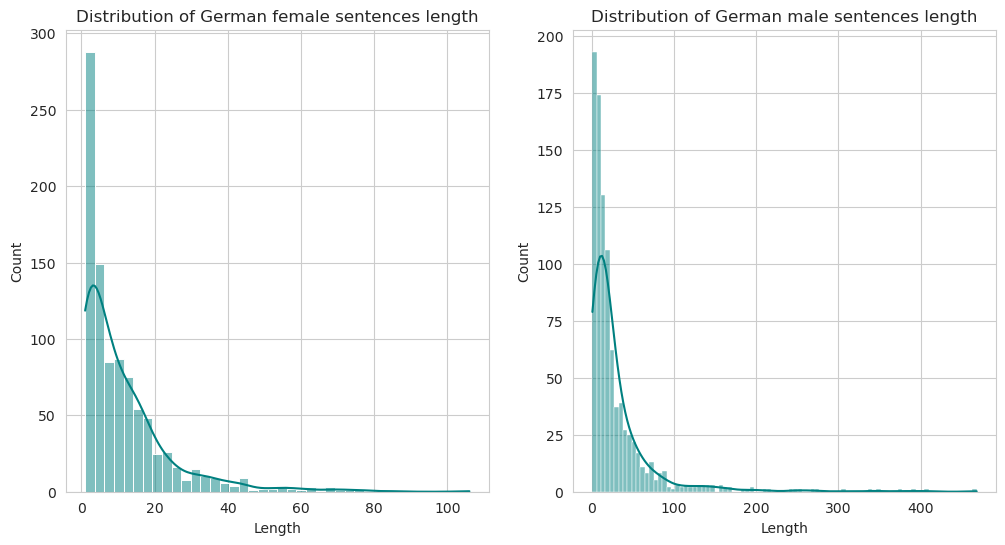

In [2]:
# Read the content from both files
with open('/kaggle/input/gender-difference/German female Coriolanus.txt', 'r', encoding='utf-8') as file:
    german_female_text = file.read()

with open('/kaggle/input/gender-difference/German male Coriolanus.txt', 'r', encoding='utf-8') as file:
    german_male_text = file.read()

# Split the content into sentences
german_female_sentences = german_female_text.split('. ')
german_male_sentences = german_male_text.split('. ')

# Equalize the lengths
min_length = min(len(german_female_sentences), len(german_male_sentences))
german_female_sentences = german_female_sentences[:min_length]
german_male_sentences = german_male_sentences[:min_length]

# Calculate sentence lengths
female_lengths = [len(sentence.split()) for sentence in german_female_sentences]
male_lengths = [len(sentence.split()) for sentence in german_male_sentences]

# Create DataFrame
data_df = pd.DataFrame({
    'female': female_lengths,
    'male': male_lengths
})

# Summary statistics
female_stats = data_df['female'].describe()
male_stats = data_df['male'].describe()

print("Female sentences statistics:")
print(female_stats)

print("\nMale sentences statistics:")
print(male_stats)

# Set the style with a white background
sns.set_style('whitegrid')

# Visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data_df['female'], kde=True, color='teal') # Color set to light blue
plt.title('Distribution of German female sentences length')
plt.xlabel('Length')

plt.subplot(1, 2, 2)
sns.histplot(data_df['male'], kde=True, color='teal') # Color set to light blue
plt.title('Distribution of German male sentences length')
plt.xlabel('Length')

plt.show()


Female sentences statistics:
count    755.000000
mean      23.094040
std       20.169452
min        1.000000
25%       10.000000
50%       17.000000
75%       30.000000
max      136.000000
Name: female, dtype: float64

Male sentences statistics:
count    755.000000
mean      14.392053
std       18.380157
min        1.000000
25%        1.000000
50%        7.000000
75%       20.000000
max      157.000000
Name: male, dtype: float64


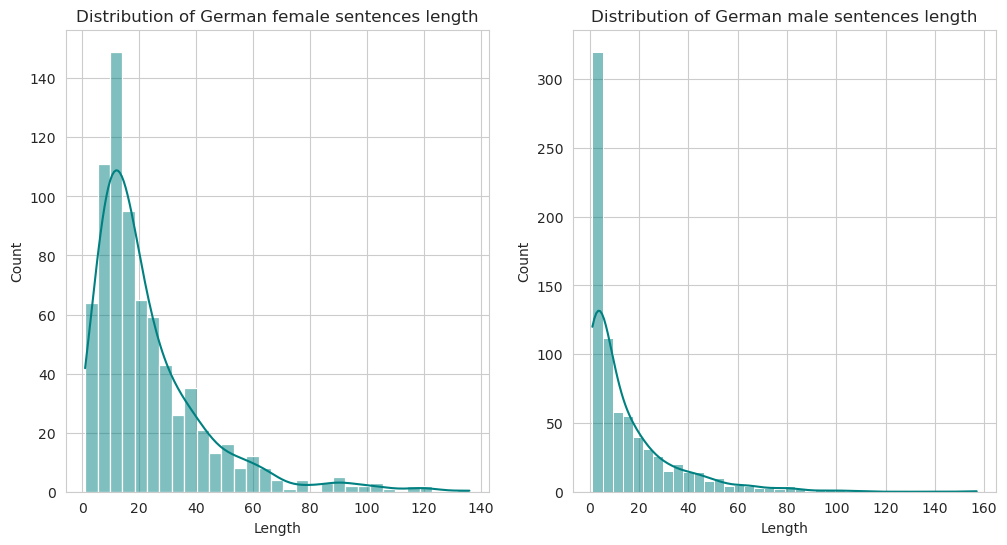

In [4]:
# Read the content from both files
with open('/kaggle/input/gender-difference/German female Macbeth.txt', 'r', encoding='utf-8') as file:
    german_female_text = file.read()

with open('/kaggle/input/gender-difference/German male Macbeth.txt', 'r', encoding='utf-8') as file:
    german_male_text = file.read()

# Split the content into sentences
german_female_sentences = german_female_text.split('. ')
german_male_sentences = german_male_text.split('. ')

# Equalize the lengths
min_length = min(len(german_female_sentences), len(german_male_sentences))
german_female_sentences = german_female_sentences[:min_length]
german_male_sentences = german_male_sentences[:min_length]

# Calculate sentence lengths
female_lengths = [len(sentence.split()) for sentence in german_female_sentences]
male_lengths = [len(sentence.split()) for sentence in german_male_sentences]

# Create DataFrame
data_df = pd.DataFrame({
    'female': female_lengths,
    'male': male_lengths
})

# Summary statistics
female_stats = data_df['female'].describe()
male_stats = data_df['male'].describe()

print("Female sentences statistics:")
print(female_stats)

print("\nMale sentences statistics:")
print(male_stats)

# Set the style with a white background
sns.set_style('whitegrid')

# Visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data_df['female'], kde=True, color='teal') # Color set to light blue
plt.title('Distribution of German female sentences length')
plt.xlabel('Length')

plt.subplot(1, 2, 2)
sns.histplot(data_df['male'], kde=True, color='teal') # Color set to light blue
plt.title('Distribution of German male sentences length')
plt.xlabel('Length')

plt.show()


# Description of dataset

In [ ]:
# List of file paths
file_paths = [
    '/kaggle/input/gender-difference/Chinese male Coriolanus.txt',
    '/kaggle/input/gender-difference/Chinese male Macbeth.txt',
    '/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Chinese male and female Coriolanus.txt',
    '/kaggle/input/gender-difference/Chinese male and female Macbeth.txt',
    '/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/English male Coriolanus.txt',
    '/kaggle/input/gender-difference/English male Macbeth.txt',
    '/kaggle/input/gender-difference/English male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/German female Coriolanus.txt',
    '/kaggle/input/gender-difference/German female Macbeth.txt',
    '/kaggle/input/gender-difference/German female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/German male Coriolanus.txt',
    '/kaggle/input/gender-difference/German male Macbeth.txt',
    '/kaggle/input/gender-difference/German male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt',
]

# A dictionary to store the statistics
statistics = {
    'file': [],
    'language': [],
    'gender': [],
    'play': [],
    'word_count': [],
    'token_count': []
}

for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        
        # Extract language, gender, and play from the file name
        parts = os.path.basename(file_path).split(' ')
        language = parts[0]
        gender = parts[1]
        play = ' '.join(parts[2:]).replace('.txt', '')

        # Count words and tokens
        words = text.split()
        word_count = len(words)
        token_count = len(text)  # Tokens can be considered as characters in this context

        # Append to the statistics
        statistics['file'].append(file_path)
        statistics['language'].append(language)
        statistics['gender'].append(gender)
        statistics['play'].append(play)
        statistics['word_count'].append(word_count)
        statistics['token_count'].append(token_count)

# You can now convert the statistics to a DataFrame for further analysis, using pandas
import pandas as pd

statistics_df = pd.DataFrame(statistics)
print(statistics_df)
# Save the DataFrame to a CSV file
statistics_df.to_csv('gender_difference_statistics.csv', index=False)

In [ ]:
# List of file paths
file_paths = [
    '/kaggle/input/gender-difference/Chinese male Coriolanus.txt',
    '/kaggle/input/gender-difference/Chinese male Macbeth.txt',
    '/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Chinese male and female Coriolanus.txt',
    '/kaggle/input/gender-difference/Chinese male and female Macbeth.txt',
    '/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/English male Coriolanus.txt',
    '/kaggle/input/gender-difference/English male Macbeth.txt',
    '/kaggle/input/gender-difference/English male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/German female Coriolanus.txt',
    '/kaggle/input/gender-difference/German female Macbeth.txt',
    '/kaggle/input/gender-difference/German female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/German male Coriolanus.txt',
    '/kaggle/input/gender-difference/German male Macbeth.txt',
    '/kaggle/input/gender-difference/German male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt',
]

# Initialize variables to store information
total_words = 0
total_characters = 0
unique_words = set()
word_characters = 0

# Iterate through the files and calculate the metrics
for file_path in file_paths:
    if os.path.exists(file_path):
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            words = text.split()
            total_words += len(words)
            total_characters += len(text)
            unique_words.update(words)
            word_characters += sum(len(word) for word in words)

# Calculate average word size
average_word_size = word_characters / total_words if total_words else 0

# Print the summary
print(f"Number of files: {len(file_paths)}")
print(f"Total words: {total_words}")
print(f"Total characters: {total_characters}")
print(f"Average word size: {average_word_size:.2f}")
print(f"Unique words: {len(unique_words)}")
print(f"Word characters: {word_characters}")


In [ ]:
# Define the paths to the files
file_paths = [
    '/kaggle/input/gender-difference/Chinese male Coriolanus.txt',
    '/kaggle/input/gender-difference/Chinese male Macbeth.txt',
    '/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Chinese male and female Coriolanus.txt',
    '/kaggle/input/gender-difference/Chinese male and female Macbeth.txt',
    '/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/English male Coriolanus.txt',
    '/kaggle/input/gender-difference/English male Macbeth.txt',
    '/kaggle/input/gender-difference/English male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/German female Coriolanus.txt',
    '/kaggle/input/gender-difference/German female Macbeth.txt',
    '/kaggle/input/gender-difference/German female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/German male Coriolanus.txt',
    '/kaggle/input/gender-difference/German male Macbeth.txt',
    '/kaggle/input/gender-difference/German male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt',
]

# Define a function to analyze each file
def analyze_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        words = text.split()
        num_words = len(words)
        total_characters = len(text)
        avg_word_size = sum(len(word) for word in words) / num_words if num_words > 0 else 0
        unique_words = len(set(words))
        word_characters = sum(len(word) for word in words)
        
        return {
            'File Name': os.path.basename(file_path),
            'Number of Words': num_words,
            'Total Characters': total_characters,
            'Average Word Size': avg_word_size,
            'Unique Words': unique_words,
            'Word Characters': word_characters,
        }

# Analyze each file and collect the results
results = [analyze_file(file_path) for file_path in file_paths]

# Convert the results to a Pandas DataFrame
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
csv_path = '/kaggle/working/gender_difference_analysis.csv'
df.to_csv(csv_path, index=False)

print(f"Analysis saved to {csv_path}")


In [ ]:
# Define the dataset as a dictionary
data = {
    'Play': ['Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet', 'Coriolanus', 'Coriolanus', 'Coriolanus', 'Coriolanus', 'Coriolanus', 'Macbeth', 'Macbeth', 'Macbeth', 'Macbeth', 'Macbeth'],
    'Gender': ['M', 'M&F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'M&F', 'M', 'F', 'M', 'M', 'M&F', 'M', 'F', 'M'],
    'Language': ['Chinese', 'Chinese', 'English', 'German', 'German', 'Italian', 'Italian', 'Spanish', 'Spanish', 'Chinese', 'Chinese', 'English', 'German', 'German', 'Chinese', 'Chinese', 'English', 'German', 'German'],
    'Words': [3231, 1727, 25448, 10477, 24387, 30787, 30520, 42390, 23934, 3079, 2338, 29016, 27358, 28021, 1973, 1482, 18089, 17436, 19483],
    'Characters': [53231, 50499, 145195, 64935, 148006, 179421, 186264, 246705, 141970, 56887, 62022, 160309, 175116, 170291, 34056, 37816, 106176, 111864, 125299],
    'Average Word Size': [15.4549675, 28.15460336, 4.477562087, 5.014985206, 4.933776192, 4.82713483, 4.835648755, 4.706322246, 4.672975683, 17.4543683, 25.49914457, 4.523056245, 5.135243804, 5.074658292, 16.26001014, 24.48178138, 4.526286694, 4.997992659, 5.241184622],
    'Unique Words': [2563, 989, 6618, 2941, 7731, 8662, 9025, 12034, 7219, 2806, 1277, 6880, 8149, 7968, 1735, 839, 5349, 6096, 6407],
}

# Convert to a Pandas DataFrame
df = pd.DataFrame(data)

# Bar plot for the number of words in each play
plt.figure(figsize=(10, 6))
sns.barplot(x='Play', y='Words', hue='Language', data=df)
plt.title('Number of Words in Each Play')
plt.show()

# Scatter plot to compare average word size and unique words
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Word Size', y='Unique Words', hue='Language', data=df)
plt.title('Average Word Size vs Unique Words')
plt.show()

# Pie chart for the distribution of genders
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Genders')
plt.show()

# Add more visualizations as needed


In [ ]:
# Set style
sns.set(style="whitegrid")

# Create a barplot for Words by Gender and Play
plt.figure(figsize=(10, 6))
sns.barplot(x='Play', y='Words', hue='Gender', data=df)
plt.title('Number of Words by Gender and Play')
plt.show()

# Create a barplot for Characters by Gender and Play
plt.figure(figsize=(10, 6))
sns.barplot(x='Play', y='Characters', hue='Gender', data=df)
plt.title('Number of Characters by Gender and Play')
plt.show()


In [ ]:
# Create a barplot for Average Word Size by Language and Play
plt.figure(figsize=(10, 6))
sns.barplot(x='Play', y='Average Word Size', hue='Language', data=df)
plt.title('Average Word Size by Language and Play')
plt.show()


In [ ]:
# Create a barplot for Unique Words by Play
plt.figure(figsize=(10, 6))
sns.barplot(x='Play', y='Unique Words', data=df)
plt.title('Number of Unique Words by Play')
plt.show()


In [ ]:
# Create a pairplot for all numeric features
sns.pairplot(df, hue='Play')
plt.show()


In [ ]:
# Calculate correlations
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Define the dataset as a dictionary
data = {
    'Play': ['Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet', 'Coriolanus', 'Coriolanus', 'Coriolanus', 'Coriolanus', 'Coriolanus', 'Macbeth', 'Macbeth', 'Macbeth', 'Macbeth', 'Macbeth'],
    'Gender': ['M', 'M&F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'M&F', 'M', 'F', 'M', 'M', 'M&F', 'M', 'F', 'M'],
    'Language': ['Chinese', 'Chinese', 'English', 'German', 'German', 'Italian', 'Italian', 'Spanish', 'Spanish', 'Chinese', 'Chinese', 'English', 'German', 'German', 'Chinese', 'Chinese', 'English', 'German', 'German'],
    'Words': [3231, 1727, 25448, 10477, 24387, 30787, 30520, 42390, 23934, 3079, 2338, 29016, 27358, 28021, 1973, 1482, 18089, 17436, 19483],
    'Characters': [53231, 50499, 145195, 64935, 148006, 179421, 186264, 246705, 141970, 56887, 62022, 160309, 175116, 170291, 34056, 37816, 106176, 111864, 125299],
    'Average Word Size': [15.4549675, 28.15460336, 4.477562087, 5.014985206, 4.933776192, 4.82713483, 4.835648755, 4.706322246, 4.672975683, 17.4543683, 25.49914457, 4.523056245, 5.135243804, 5.074658292, 16.26001014, 24.48178138, 4.526286694, 4.997992659, 5.241184622],
    'Unique Words': [2563, 989, 6618, 2941, 7731, 8662, 9025, 12034, 7219, 2806, 1277, 6880, 8149, 7968, 1735, 839, 5349, 6096, 6407],
}

# Convert to a Pandas DataFrame
df = pd.DataFrame(data)

# Create a pairplot for all numeric features, differentiated by Gender
sns.pairplot(df, hue='Gender')
plt.show()


In [ ]:
# List of file paths
file_paths = [
    '/kaggle/input/gender-difference/Chinese male Coriolanus.txt',
    '/kaggle/input/gender-difference/Chinese male Macbeth.txt',
    '/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Chinese male and female Coriolanus.txt',
    '/kaggle/input/gender-difference/Chinese male and female Macbeth.txt',
    '/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/English male Coriolanus.txt',
    '/kaggle/input/gender-difference/English male Macbeth.txt',
    '/kaggle/input/gender-difference/English male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/German female Coriolanus.txt',
    '/kaggle/input/gender-difference/German female Macbeth.txt',
    '/kaggle/input/gender-difference/German female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/German male Coriolanus.txt',
    '/kaggle/input/gender-difference/German male Macbeth.txt',
    '/kaggle/input/gender-difference/German male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt',
]

# Read files and store in a list
documents = []
for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as file:
        documents.append(file.read())

# Preprocessing using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Perform hierarchical clustering
Z = linkage(X.toarray(), method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z)
plt.show()


In [ ]:
# File paths as provided
file_paths = [
    '/kaggle/input/gender-difference/Chinese male Coriolanus.txt',
    '/kaggle/input/gender-difference/Chinese male Macbeth.txt',
    '/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Chinese male and female Coriolanus.txt',
    '/kaggle/input/gender-difference/Chinese male and female Macbeth.txt',
    '/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/English male Coriolanus.txt',
    '/kaggle/input/gender-difference/English male Macbeth.txt',
    '/kaggle/input/gender-difference/English male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/German female Coriolanus.txt',
    '/kaggle/input/gender-difference/German female Macbeth.txt',
    '/kaggle/input/gender-difference/German female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/German male Coriolanus.txt',
    '/kaggle/input/gender-difference/German male Macbeth.txt',
    '/kaggle/input/gender-difference/German male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt',
]

# Extract labels from file paths
languages_and_genders = [path.split('/')[-1].replace('.txt', '') for path in file_paths]

# Assuming you've read the texts into a list called 'texts'
texts = [open(file, 'r').read() for file in file_paths]

# Vectorize the texts using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

# Perform hierarchical clustering
linkage_matrix = linkage(tfidf_matrix.toarray(), method='ward')

# Plot the hierarchical clustering as a dendrogram
plt.figure(figsize=(20, 10)) # Increase the figure size
dendrogram(linkage_matrix, labels=languages_and_genders, orientation='left', leaf_font_size=19) # Increase the font size
plt.title('Hierarchical Clustering of 19 Texts', fontsize=20) # Increase the title font size
plt.show()


In [ ]:
# Plot the hierarchical clustering as a dendrogram
plt.figure(figsize=(20, 10))
dendrogram(linkage_matrix, labels=languages_and_genders, orientation='right', leaf_font_size=20)
plt.title('Hierarchical Clustering of 19 Texts')
plt.show()


In [ ]:
# Plot the hierarchical clustering as a dendrogram
plt.figure(figsize=(20, 10)) # Increase the figure size
dendrogram(linkage_matrix, labels=languages_and_genders, orientation='left', leaf_font_size=19) # Increase the font size
plt.title('Hierarchical Clustering of 19 Texts', fontsize=20) # Increase the title font size
plt.show()


In [ ]:
# Plot the hierarchical clustering as a dendrogram
plt.figure(figsize=(20, 10)) # Increase the figure size
dendrogram(linkage_matrix, labels=languages_and_genders, orientation='left', leaf_font_size=19) # Increase the font size

# Modify plot to remove grids and keep only one outline
plt.grid(False)
plt.box(on=None)

plt.title('Hierarchical Clustering of 19 Texts', fontsize=20) # Increase the title font size
plt.show()

# Lexical richness

In [ ]:
# Define file path
file_path = '/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt'

# Read the file
with open(file_path, 'r', encoding='utf-8') as file: # added encoding='utf-8' for handling special characters
    text = file.read()

# Tokenize the text into words
words = word_tokenize(text)

# Find the number of unique words (types) and total words (tokens)
types = len(set(words))
tokens = len(words)

# Calculate the Type-Token Ratio (TTR)
ttr = types / tokens if tokens > 0 else 0

print(f"Type-Token Ratio (TTR) for {file_path}: {ttr}")



In [ ]:
# Define file path for Chinese text
file_path = '/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt'

# Read the file
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# Tokenize the text into words using jieba
words = list(jieba.cut(text))

# Find the number of unique words (types) and total words (tokens)
types = len(set(words))
tokens = len(words)

# Calculate the Type-Token Ratio (TTR)
ttr = types / tokens if tokens > 0 else 0

print(f"Type-Token Ratio (TTR) for {file_path}: {ttr}")


# Character n-gram

# Distance

# MALE VS. FEMALE

In [ ]:
# Update the file paths to point to the Spanish male and female text files
files = {
    'English Shakespeare Male': "/kaggle/input/gender-difference/English male Coriolanus.txt",
    'Female': "/kaggle/input/gender-difference/German male Coriolanus.txt",
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation but retain spaces
    return text

all_points = []  # To store all points for distance calculation
labels = []  # To store labels corresponding to each point

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn with character 5-grams
    vectorizer = CountVectorizer(analyzer='char', ngram_range=(5, 5))
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 100 most frequent 5-grams
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_100_indices = np.argsort(freqs)[-100:]

    # Get the 100-MFW frequency matrix
    tdm_100mfw = tdm[:, top_100_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_100mfw.toarray())

    all_points.extend(tdm_reduced)
    labels.extend([label] * tdm_reduced.shape[0])

# Calculate pairwise Euclidean distances
distances = euclidean_distances(all_points)

# Save distances to a file
with open("/kaggle/working/pairwise_distances.txt", "w") as f:
    for i in range(len(all_points)):
        for j in range(i+1, len(all_points)):
            label_i, label_j = labels[i], labels[j]
            # Only calculate and save the distance if one point is 'Male' and the other is 'Female'
            if label_i != label_j:
                distance = distances[i, j]
                f.write(f"Distance between {label_i} point {i} and {label_j} point {j}: {distance:.2f}\n")


In [ ]:
# Read the text file into a DataFrame
with open('/kaggle/working/pairwise_distances.txt', 'r') as f:
    lines = f.readlines()

# Initialize lists to store male points, female points, and distances
male_points = []
female_points = []
distances = []

# Parse each line to extract the relevant information
for line in lines:
    parts = line.split(": ")
    distance = float(parts[1].strip())
    points_info = parts[0].split(" and ")
    male_point = int(points_info[0].split(" ")[-1])
    female_point = int(points_info[1].split(" ")[-1])
    
    male_points.append(male_point)
    female_points.append(female_point)
    distances.append(distance)

# Create a DataFrame
df = pd.DataFrame({
    'Male_Point': male_points,
    'Female_Point': female_points,
    'Distance': distances
})

# Perform some basic statistical analyses
mean_distance = df['Distance'].mean()
min_distance = df['Distance'].min()
max_distance = df['Distance'].max()
std_distance = df['Distance'].std()  # Calculate standard deviation

print(f"Mean Distance: {mean_distance}")
print(f"Min Distance: {min_distance}")
print(f"Max Distance: {max_distance}")
print(f"Standard Deviation of Distance: {std_distance}")  # Print standard deviation

# MALE VS. MALE

In [ ]:
# Update the file paths to point to the Spanish male text files
files = {
    'Male1': "/kaggle/input/gender-difference/English male Coriolanus.txt",
    'Male2': "/kaggle/input/gender-difference/German male Coriolanus.txt",
    # Add more male files if needed
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation but retain spaces
    return text

all_points = []  # To store all points for distance calculation
labels = []  # To store labels corresponding to each point

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn with character 5-grams
    vectorizer = CountVectorizer(analyzer='char', ngram_range=(5, 5))
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 100 most frequent 5-grams
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_100_indices = np.argsort(freqs)[-100:]

    # Get the 100-MFW frequency matrix
    tdm_100mfw = tdm[:, top_100_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_100mfw.toarray())

    all_points.extend(tdm_reduced)
    labels.extend([label] * tdm_reduced.shape[0])

# Calculate pairwise Euclidean distances
distances = euclidean_distances(all_points)

# Save distances to a file
with open("/kaggle/working/pairwise_distances.txt", "w") as f:
    for i in range(len(all_points)):
        for j in range(i+1, len(all_points)):
            label_i, label_j = labels[i], labels[j]
            # Only calculate and save the distance if both points are 'Male'
            if "Male" in label_i and "Male" in label_j:
                distance = distances[i, j]
                f.write(f"Distance between {label_i} point {i} and {label_j} point {j}: {distance:.2f}\n")


In [ ]:
# Read the text file into a DataFrame
with open('/kaggle/working/pairwise_distances.txt', 'r') as f:
    lines = f.readlines()

# Initialize lists to store the two sets of male points and distances
male_points_1 = []
male_points_2 = []
distances = []

# Parse each line to extract the relevant information
for line in lines:
    parts = line.split(": ")
    distance = float(parts[1].strip())
    points_info = parts[0].split(" and ")
    male_point_1 = int(points_info[0].split(" ")[-1])
    male_point_2 = int(points_info[1].split(" ")[-1])
    
    male_points_1.append(male_point_1)
    male_points_2.append(male_point_2)
    distances.append(distance)

# Create a DataFrame
df = pd.DataFrame({
    'Male_Point_1': male_points_1,
    'Male_Point_2': male_points_2,
    'Distance': distances
})

# Perform some basic statistical analyses
mean_distance = df['Distance'].mean()
min_distance = df['Distance'].min()
max_distance = df['Distance'].max()
std_distance = df['Distance'].std()  # Calculate standard deviation

print(f"Mean Distance: {mean_distance}")
print(f"Min Distance: {min_distance}")
print(f"Max Distance: {max_distance}")
print(f"Standard Deviation of Distance: {std_distance}")


In [ ]:
# File paths as provided
file_paths = [
    '/kaggle/input/gender-difference/Chinese male Coriolanus.txt',
    '/kaggle/input/gender-difference/Chinese male Macbeth.txt',
    '/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Chinese male and female Coriolanus.txt',
    '/kaggle/input/gender-difference/Chinese male and female Macbeth.txt',
    '/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/English male Coriolanus.txt',
    '/kaggle/input/gender-difference/English male Macbeth.txt',
    '/kaggle/input/gender-difference/English male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/German female Coriolanus.txt',
    '/kaggle/input/gender-difference/German female Macbeth.txt',
    '/kaggle/input/gender-difference/German female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/German male Coriolanus.txt',
    '/kaggle/input/gender-difference/German male Macbeth.txt',
    '/kaggle/input/gender-difference/German male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt',
]

# All files

# Spanish

# Top 10

In [ ]:
# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

# Function to extract top 10 character 5-grams
def top_5grams(file_path, label):
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    clean_corpus = [clean_text(line) for line in raw_corpus]

    vectorizer = CountVectorizer(analyzer='char', ngram_range=(5, 5))
    tdm = vectorizer.fit_transform(clean_corpus)
    ngrams = vectorizer.get_feature_names_out()
    counts = tdm.sum(axis=0).A1
    sorted_ngrams = sorted([(ngram, count) for ngram, count in zip(ngrams, counts)], key=lambda x: x[1], reverse=True)[:10]

    print(f"Top 10 Character 5-Grams for {label}:")
    for i, (ngram, count) in enumerate(sorted_ngrams, 1):
        print(f"{i}. {ngram}: {count}")
    print("\n")

# File paths
files = {
    'English Shakespeare Male': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt",
    'Spanish Male': "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
    'Spanish Female': "/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt"
}

# Extract and print top 10 character 5-grams for each file
for label, file_path in files.items():
    top_5grams(file_path, label)


In [ ]:
# File paths reordered to show Shakespeare Male first
files = {
    'Shakespeare Male': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt",
    'Spanish Male': "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
    'Spanish Female': "/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt"
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

all_points = []  # To store all points for distance calculation
labels = []  # To store labels corresponding to each point

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn for character 5-grams
    vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(5, 5))
    tdm = vectorizer.fit_transform(clean_corpus)

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm.toarray())

    all_points.extend(tdm_reduced)
    labels.extend([label] * tdm_reduced.shape[0])

# Visualization
plt.figure(figsize=(10, 6))
palette = sns.color_palette("husl", 3)  # 3 distinct colors
markers = ['o', 'x', '^']  # Different markers for each file

for idx, label in enumerate(files.keys()):
    filtered_points = [point for point, l in zip(all_points, labels) if l == label]
    sns.scatterplot(x=[point[0] for point in filtered_points], 
                    y=[point[1] for point in filtered_points], 
                    label=label, 
                    color=palette[idx], 
                    marker=markers[idx])

plt.title('PCA of Character 5-grams (Shakespeare vs. Spanish Male and Female Translations)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Gender')
plt.grid(True, which='both', linestyle='--', linewidth=0.3)  # Very thin dashed grid lines
plt.show()


In [ ]:
# File paths reordered to show Shakespeare Male first
files = {
    'Shakespeare Male': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt",
    'Italian Male': "/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt",
    'Italian Female': "/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt"
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

all_points = []  # To store all points for distance calculation
labels = []  # To store labels corresponding to each point

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn for character 5-grams
    vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(5, 5))
    tdm = vectorizer.fit_transform(clean_corpus)

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm.toarray())

    all_points.extend(tdm_reduced)
    labels.extend([label] * tdm_reduced.shape[0])

# Visualization
plt.figure(figsize=(10, 6))
palette = sns.color_palette("husl", 3)  # 3 distinct colors
markers = ['o', 'x', '^']  # Different markers for each file

for idx, label in enumerate(files.keys()):
    filtered_points = [point for point, l in zip(all_points, labels) if l == label]
    sns.scatterplot(x=[point[0] for point in filtered_points], 
                    y=[point[1] for point in filtered_points], 
                    label=label, 
                    color=palette[idx], 
                    marker=markers[idx])

plt.title('PCA of Character 5-grams (Shakespeare vs. Italian Male and Female Translations)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Gender')
plt.grid(True, which='both', linestyle='--', linewidth=0.3)  # Very thin dashed grid lines
plt.show()

In [ ]:
# File paths reordered to show Shakespeare Male first
files = {
    'Shakespeare Male': [
        "/kaggle/input/gender-difference/English male Coriolanus.txt",
        "/kaggle/input/gender-difference/English male Macbeth.txt",
        "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
    ],
    'Male': [
        "/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt",
        "/kaggle/input/gender-difference/Chinese male Coriolanus.txt",
        "/kaggle/input/gender-difference/Chinese male Macbeth.txt"
    ],
    'Female': [
        "/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt",
        "/kaggle/input/gender-difference/Chinese male and female Coriolanus.txt",
        "/kaggle/input/gender-difference/Chinese male and female Macbeth.txt"
    ]
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

all_points = []  # To store all points for distance calculation
labels = []  # To store labels corresponding to each point

for label, file_paths in files.items():
    for file_path in file_paths:
        # Load the text file
        with open(file_path, 'r', encoding='utf-8') as f:
            raw_corpus = f.readlines()

        # Clean the corpus
        clean_corpus = [clean_text(line) for line in raw_corpus]

        # Create a term-document matrix using Scikit-learn for character 5-grams
        vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(5, 5))
        tdm = vectorizer.fit_transform(clean_corpus)

        # Perform PCA to reduce dimensions
        pca = PCA(n_components=2)  # Reduce to 2 components for visualization
        tdm_reduced = pca.fit_transform(tdm.toarray())

        all_points.extend(tdm_reduced)
        labels.extend([label] * tdm_reduced.shape[0])

# Visualization
plt.figure(figsize=(10, 6))
palette = sns.color_palette("husl", 3)  # 3 distinct colors
markers = ['o', 'x', '^']  # Different markers for each file

for idx, label in enumerate(files.keys()):
    filtered_points = [point for point, l in zip(all_points, labels) if l == label]
    sns.scatterplot(x=[point[0] for point in filtered_points], 
                    y=[point[1] for point in filtered_points], 
                    label=label, 
                    color=palette[idx], 
                    marker=markers[idx])

plt.title('PCA of Character 5-grams (Shakespeare vs. Chinese Male and Male & Female Translations)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Gender')
plt.grid(True, which='both', linestyle='--', linewidth=0.3)  # Very thin dashed grid lines
plt.show()


In [ ]:
# File paths reordered to show Shakespeare Male first
files = {
    'Shakespeare Male': [
        "/kaggle/input/gender-difference/English male Coriolanus.txt",
        "/kaggle/input/gender-difference/English male Macbeth.txt",
        "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
    ],
    'Male': [
        "/kaggle/input/gender-difference/German male Coriolanus.txt",
        "/kaggle/input/gender-difference/German male Macbeth.txt",
        "/kaggle/input/gender-difference/German male Romeo and Juliet.txt"
    ],
    'Female': [
        "/kaggle/input/gender-difference/German female Coriolanus.txt",
        "/kaggle/input/gender-difference/German female Macbeth.txt",
        "/kaggle/input/gender-difference/German female Romeo and Juliet.txt"
    ]
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

all_points = []  # To store all points for distance calculation
labels = []  # To store labels corresponding to each point

for label, file_paths in files.items():
    for file_path in file_paths:
        # Load the text file
        with open(file_path, 'r', encoding='utf-8') as f:
            raw_corpus = f.readlines()

        # Clean the corpus
        clean_corpus = [clean_text(line) for line in raw_corpus]

        # Create a term-document matrix using Scikit-learn for character 5-grams
        vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(5, 5))
        tdm = vectorizer.fit_transform(clean_corpus)

        # Perform PCA to reduce dimensions
        pca = PCA(n_components=2)  # Reduce to 2 components for visualization
        tdm_reduced = pca.fit_transform(tdm.toarray())

        all_points.extend(tdm_reduced)
        labels.extend([label] * tdm_reduced.shape[0])

# Visualization
plt.figure(figsize=(10, 6))
palette = sns.color_palette("husl", 3)  # 3 distinct colors
markers = ['o', 'x', '^']  # Different markers for each file

for idx, label in enumerate(files.keys()):
    filtered_points = [point for point, l in zip(all_points, labels) if l == label]
    sns.scatterplot(x=[point[0] for point in filtered_points], 
                    y=[point[1] for point in filtered_points], 
                    label=label, 
                    color=palette[idx], 
                    marker=markers[idx])

plt.title('PCA of Character 5-grams (Shakespeare vs. German Male and Male & Female Translations)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Gender')
plt.grid(True, which='both', linestyle='--', linewidth=0.3)  # Very thin dashed grid lines
plt.show()


In [ ]:
# List of dictionaries containing file paths
file_sets = [
    {
        'Shakespeare Male': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt",
        'Spanish Male': "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
        'Spanish Female': "/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt"
    },
    {
        'Shakespeare Male': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt",
        'Italian Male': "/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt",
        'Italian Female': "/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt"
    },
    {
        'Shakespeare Male': [
            "/kaggle/input/gender-difference/English male Coriolanus.txt",
            "/kaggle/input/gender-difference/English male Macbeth.txt",
            "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
        ],
        'Chinese Male': [
            "/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt",
            "/kaggle/input/gender-difference/Chinese male Coriolanus.txt",
            "/kaggle/input/gender-difference/Chinese male Macbeth.txt"
        ],
        'Chinese Female': [
            "/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt",
            "/kaggle/input/gender-difference/Chinese male and female Coriolanus.txt",
            "/kaggle/input/gender-difference/Chinese male and female Macbeth.txt"
        ]
    },
    {
        'Shakespeare Male': [
            "/kaggle/input/gender-difference/English male Coriolanus.txt",
            "/kaggle/input/gender-difference/English male Macbeth.txt",
            "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
        ],
        'German Male': [
            "/kaggle/input/gender-difference/German male Coriolanus.txt",
            "/kaggle/input/gender-difference/German male Macbeth.txt",
            "/kaggle/input/gender-difference/German male Romeo and Juliet.txt"
        ],
        'German Female': [
            "/kaggle/input/gender-difference/German female Coriolanus.txt",
            "/kaggle/input/gender-difference/German female Macbeth.txt",
            "/kaggle/input/gender-difference/German female Romeo and Juliet.txt"
        ]
    }
]

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

# Visualization
plt.figure(figsize=(20, 10))  # Adjusted the figure size to accommodate 2x2 grid

for idx, files in enumerate(file_sets):
    all_points = []  # To store all points for distance calculation
    labels = []  # To store labels corresponding to each point

    for label, file_paths in files.items():
        if not isinstance(file_paths, list):
            file_paths = [file_paths]
        for file_path in file_paths:
            # Load the text file
            with open(file_path, 'r', encoding='utf-8') as f:
                raw_corpus = f.readlines()

            # Clean the corpus
            clean_corpus = [clean_text(line) for line in raw_corpus]

            # Create a term-document matrix using Scikit-learn for character 5-grams
            vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(5, 5))
            tdm = vectorizer.fit_transform(clean_corpus)

            # Perform PCA to reduce dimensions
            pca = PCA(n_components=2)  # Reduce to 2 components for visualization
            tdm_reduced = pca.fit_transform(tdm.toarray())

            all_points.extend(tdm_reduced)
            labels.extend([label] * tdm_reduced.shape[0])

    # Subplot in a 2x2 grid
    plt.subplot(2, 2, idx+1)  # Adjusted to 2x2 grid
    palette = sns.color_palette("husl", len(files.keys()))  # Adjusted to accommodate dynamic number of files
    markers = ['o', 'x', '^', 's']  # Added one more marker for potential fourth file

    for idx_label, label in enumerate(files.keys()):
        filtered_points = [point for point, l in zip(all_points, labels) if l == label]
        sns.scatterplot(x=[point[0] for point in filtered_points], 
                        y=[point[1] for point in filtered_points], 
                        label=label, 
                        color=palette[idx_label], 
                        marker=markers[idx_label])

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Gender')
    plt.grid(True, which='both', linestyle='--', linewidth=0.3)  # Very thin dashed grid lines

plt.tight_layout()
plt.show()


# Sentence pos

In [ ]:
# List of dictionaries containing file paths
file_sets = [
    {
        'Shakespeare Male':"/kaggle/input/gender-difference/English male Romeo and Juliet.txt",
        'Spanish Male': "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
        'Spanish Female': "/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt"
    },
    {
        'Shakespeare Male':"/kaggle/input/gender-difference/English male Romeo and Juliet.txt",
        'Italian Male': "/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt",
        'Italian Female': "/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt"
    },   
]
# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

# Visualization
plt.figure(figsize=(20, 10))

for idx, files in enumerate(file_sets):
    all_points = []
    labels = []

    for label, file_paths in files.items():
        if not isinstance(file_paths, list):
            file_paths = [file_paths]
        for file_path in file_paths:
            # Load the text file
            with open(file_path, 'r', encoding='utf-8') as f:
                raw_corpus = f.readlines()

            # Clean and tokenize the corpus
            clean_corpus = [clean_text(line) for line in raw_corpus]
            tokenized_corpus = [word_tokenize(sentence) for sentence in clean_corpus]

            # POS Tagging
            pos_tagged_corpus = [pos_tag(tokens) for tokens in tokenized_corpus]
            pos_tags = [[tag for word, tag in sent] for sent in pos_tagged_corpus]
            pos_tags_flat = [' '.join(tags) for tags in pos_tags]

            # Create a term-document matrix of POS tags using Scikit-learn
            vectorizer = CountVectorizer(tokenizer=lambda x: x.split(), token_pattern=None)  # Set token_pattern to None
            tdm = vectorizer.fit_transform(pos_tags_flat)

            # Perform PCA to reduce dimensions
            pca = PCA(n_components=2)
            tdm_reduced = pca.fit_transform(tdm.toarray())

            all_points.extend(tdm_reduced)
            labels.extend([label] * tdm_reduced.shape[0])

    # Subplot in a 1x2 grid for side-by-side plots
    plt.subplot(1, 2, idx+1)
    palette = sns.color_palette("husl", len(files.keys()))
    markers = ['*', 'o', 'x', '^', 's']

    for idx_label, label in enumerate(files.keys()):
        filtered_points = [point for point, l in zip(all_points, labels) if l == label]
        sns.scatterplot(x=[point[0] for point in filtered_points], 
                        y=[point[1] for point in filtered_points], 
                        label=label, 
                        color=palette[idx_label], 
                        marker=markers[idx_label])

    plt.xlabel('Principal Component 1', fontsize=14)
    plt.ylabel('Principal Component 2', fontsize=14)
    plt.legend(title='Gender', title_fontsize='14', fontsize='12')
    plt.grid(True, which='both', linestyle='--', linewidth=0.3)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
# List of dictionaries containing file paths
file_sets = [
    {
        'Spanish Male': "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
        'Spanish Female': "/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt"
    },
    {
        'Italian Male': "/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt",
        'Italian Female': "/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt"
    },   
]

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text


# Visualization
plt.figure(figsize=(20, 10))

for idx, files in enumerate(file_sets):
    all_points = []
    labels = []

    for label, file_paths in files.items():
        if not isinstance(file_paths, list):
            file_paths = [file_paths]
        for file_path in file_paths:
            # Load the text file
            with open(file_path, 'r', encoding='utf-8') as f:
                raw_corpus = f.readlines()

            # Clean and tokenize the corpus
            clean_corpus = [clean_text(line) for line in raw_corpus]
            tokenized_corpus = [nltk.word_tokenize(sentence) for sentence in clean_corpus]

            # POS Tagging
            pos_tagged_corpus = [nltk.pos_tag(tokens) for tokens in tokenized_corpus]
            pos_tags = [[tag for word, tag in sent] for sent in pos_tagged_corpus]
            pos_tags_flat = [' '.join(tags) for tags in pos_tags]

            # Create a term-document matrix of POS tags using Scikit-learn
            vectorizer = CountVectorizer(tokenizer=lambda x: x.split(), token_pattern=None)  # Set token_pattern to None
            tdm = vectorizer.fit_transform(pos_tags_flat)

            # Perform PCA to reduce dimensions
            pca = PCA(n_components=2)
            tdm_reduced = pca.fit_transform(tdm.toarray())

            all_points.extend(tdm_reduced)
            labels.extend([label] * tdm_reduced.shape[0])

    # Subplot in a 1x2 grid
    plt.subplot(1, 2, idx+1)
    palette = sns.color_palette("husl", len(files.keys()))
    markers = ['o', 'x', '^', 's']

    for idx_label, label in enumerate(files.keys()):
        filtered_points = [point for point, l in zip(all_points, labels) if l == label]
        sns.scatterplot(x=[point[0] for point in filtered_points], 
                        y=[point[1] for point in filtered_points], 
                        label=label, 
                        color=palette[idx_label], 
                        marker=markers[idx_label])

    plt.xlabel('Principal Component 1', fontsize=14)
    plt.ylabel('Principal Component 2', fontsize=14)
    plt.legend(title='Gender', title_fontsize='14', fontsize='12')
    plt.grid(True, which='both', linestyle='--', linewidth=0.3)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
# List of dictionaries containing file paths
file_sets = [
    {
        'Spanish Male': "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
        'Spanish Female': "/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt"
    },
    {
        'Italian Male': "/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt",
        'Italian Female': "/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt"
    },
    {
        'Chinese Male': [
            "/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt",
            "/kaggle/input/gender-difference/Chinese male Coriolanus.txt",
            "/kaggle/input/gender-difference/Chinese male Macbeth.txt"
        ],
        'Chinese Male and Female': [
            "/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt",
            "/kaggle/input/gender-difference/Chinese male and female Coriolanus.txt",
            "/kaggle/input/gender-difference/Chinese male and female Macbeth.txt"
        ]
    },
    {
        'German Male': [
            "/kaggle/input/gender-difference/German male Coriolanus.txt",
            "/kaggle/input/gender-difference/German male Macbeth.txt",
            "/kaggle/input/gender-difference/German male Romeo and Juliet.txt"
        ],
        'German Female': [
            "/kaggle/input/gender-difference/German female Coriolanus.txt",
            "/kaggle/input/gender-difference/German female Macbeth.txt",
            "/kaggle/input/gender-difference/German female Romeo and Juliet.txt"
        ]
    }
    
]

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text


# Visualization
plt.figure(figsize=(20, 10))

for idx, files in enumerate(file_sets):
    all_points = []
    labels = []

    for label, file_paths in files.items():
        if not isinstance(file_paths, list):
            file_paths = [file_paths]
        for file_path in file_paths:
            # Load the text file
            with open(file_path, 'r', encoding='utf-8') as f:
                raw_corpus = f.readlines()

            # Clean and tokenize the corpus
            clean_corpus = [clean_text(line) for line in raw_corpus]
            tokenized_corpus = [nltk.word_tokenize(sentence) for sentence in clean_corpus]

            # POS Tagging
            pos_tagged_corpus = [nltk.pos_tag(tokens) for tokens in tokenized_corpus]
            pos_tags = [[tag for word, tag in sent] for sent in pos_tagged_corpus]
            pos_tags_flat = [' '.join(tags) for tags in pos_tags]

            # Create a term-document matrix of POS tags using Scikit-learn
            vectorizer = CountVectorizer(tokenizer=lambda x: x.split(), token_pattern=None)  # Set token_pattern to None
            tdm = vectorizer.fit_transform(pos_tags_flat)

            # Perform PCA to reduce dimensions
            pca = PCA(n_components=2)
            tdm_reduced = pca.fit_transform(tdm.toarray())

            all_points.extend(tdm_reduced)
            labels.extend([label] * tdm_reduced.shape[0])

    # Subplot in a 2x2 grid
    plt.subplot(2, 2, idx+1)
    palette = sns.color_palette("husl", len(files.keys()))
    markers = ['o', 'x', '^', 's']

    for idx_label, label in enumerate(files.keys()):
        filtered_points = [point for point, l in zip(all_points, labels) if l == label]
        sns.scatterplot(x=[point[0] for point in filtered_points], 
                        y=[point[1] for point in filtered_points], 
                        label=label, 
                        color=palette[idx_label], 
                        marker=markers[idx_label])

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Gender')
    plt.grid(True, which='both', linestyle='--', linewidth=0.3)

plt.tight_layout()
plt.show()

In [ ]:
file_sets = [
    {
        'Shakespeare Male': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt",
        'Spanish Male': "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
        'Spanish Female': "/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt"
    },
    {
        'Shakespeare Male': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt",
        'Italian Male': "/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt",
        'Italian Female': "/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt"
    },
    {
        'Shakespeare Male': [
            "/kaggle/input/gender-difference/English male Coriolanus.txt",
            "/kaggle/input/gender-difference/English male Macbeth.txt",
            "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
        ],
        'Chinese Male': [
            "/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt",
            "/kaggle/input/gender-difference/Chinese male Coriolanus.txt",
            "/kaggle/input/gender-difference/Chinese male Macbeth.txt"
        ],
        'Chinese Female': [
            "/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt",
            "/kaggle/input/gender-difference/Chinese male and female Coriolanus.txt",
            "/kaggle/input/gender-difference/Chinese male and female Macbeth.txt"
        ]
    },
    {
        'Shakespeare Male': [
            "/kaggle/input/gender-difference/English male Coriolanus.txt",
            "/kaggle/input/gender-difference/English male Macbeth.txt",
            "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
        ],
        'German Male': [
            "/kaggle/input/gender-difference/German male Coriolanus.txt",
            "/kaggle/input/gender-difference/German male Macbeth.txt",
            "/kaggle/input/gender-difference/German male Romeo and Juliet.txt"
        ],
        'German Female': [
            "/kaggle/input/gender-difference/German female Coriolanus.txt",
            "/kaggle/input/gender-difference/German female Macbeth.txt",
            "/kaggle/input/gender-difference/German female Romeo and Juliet.txt"
        ]
    }
]

# Initialize the spaCy parser
nlp = spacy.load('en_core_web_sm')


# Function to get simplified syntactic tree shapes
def get_syntactic_shapes(doc):
    shapes = []
    for sent in doc.sents:
        shape = ' '.join([token.dep_ for token in sent])
        shapes.append(shape)
    return shapes

# Visualization
plt.figure(figsize=(20, 10))

for idx, files in enumerate(file_sets):
    all_points = []
    labels = []

    for label, file_paths in files.items():
        if not isinstance(file_paths, list):
            file_paths = [file_paths]
        for file_path in file_paths:
            # Load the text file
            with open(file_path, 'r', encoding='utf-8') as f:
                raw_corpus = f.read()

            # Parse the corpus to get syntactic tree shapes
            doc = nlp(raw_corpus)
            shapes = get_syntactic_shapes(doc)

            # Vectorize the shapes
            vectorizer = CountVectorizer()
            X = vectorizer.fit_transform(shapes)

            # Perform PCA on the vectorized shapes
            pca = PCA(n_components=2)
            X_pca = pca.fit_transform(X.toarray())

            all_points.extend(X_pca)
            labels.extend([label] * X_pca.shape[0])

    # Subplot in a 2x2 grid
    plt.subplot(2, 2, idx+1)
    palette = sns.color_palette("husl", len(files.keys()))
    markers = ['x', '.', '1', '^', 'o']

    for idx_label, label in enumerate(files.keys()):
        filtered_points = [point for point, l in zip(all_points, labels) if l == label]
        sns.scatterplot(x=[point[0] for point in filtered_points], 
                        y=[point[1] for point in filtered_points], 
                        label=label, 
                        color=palette[idx_label], 
                        marker=markers[idx_label])

    plt.xlabel('Principal Component 1', fontsize=14)
    plt.ylabel('Principal Component 2', fontsize=14)
    plt.legend(title='File', title_fontsize='14', fontsize='12')
    plt.grid(True, which='both', linestyle='--', linewidth=0.3)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
file_sets = [
    {
        'Shakespeare Male': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt",
        'Spanish Male': "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
        'Spanish Female': "/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt"
    },
    {
        'Shakespeare Male': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt",
        'Italian Male': "/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt",
        'Italian Female': "/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt"
    },
   
    {
        'Shakespeare Male': [
            "/kaggle/input/gender-difference/English male Coriolanus.txt",
            "/kaggle/input/gender-difference/English male Macbeth.txt",
            "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
        ],
        'German Male': [
            "/kaggle/input/gender-difference/German male Coriolanus.txt",
            "/kaggle/input/gender-difference/German male Macbeth.txt",
            "/kaggle/input/gender-difference/German male Romeo and Juliet.txt"
        ],
        'German Female': [
            "/kaggle/input/gender-difference/German female Coriolanus.txt",
            "/kaggle/input/gender-difference/German female Macbeth.txt",
            "/kaggle/input/gender-difference/German female Romeo and Juliet.txt"
        ]
    },
     {
        'Shakespeare Male': [
            "/kaggle/input/gender-difference/English male Coriolanus.txt",
            "/kaggle/input/gender-difference/English male Macbeth.txt",
            "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
        ],
        'Chinese Male': [
            "/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt",
            "/kaggle/input/gender-difference/Chinese male Coriolanus.txt",
            "/kaggle/input/gender-difference/Chinese male Macbeth.txt"
        ],
        'Chinese Female': [
            "/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt",
            "/kaggle/input/gender-difference/Chinese male and female Coriolanus.txt",
            "/kaggle/input/gender-difference/Chinese male and female Macbeth.txt"
        ]
    }
]

# Initialize the spaCy parser
nlp = spacy.load('en_core_web_sm')


# Function to get simplified syntactic tree shapes
def get_syntactic_shapes(doc):
    shapes = []
    for sent in doc.sents:
        shape = ' '.join([token.dep_ for token in sent])
        shapes.append(shape)
    return shapes

# Visualization
plt.figure(figsize=(20, 10))

for idx, files in enumerate(file_sets):
    all_points = []
    labels = []

    for label, file_paths in files.items():
        if not isinstance(file_paths, list):
            file_paths = [file_paths]
        for file_path in file_paths:
            # Load the text file
            with open(file_path, 'r', encoding='utf-8') as f:
                raw_corpus = f.read()

            # Parse the corpus to get syntactic tree shapes
            doc = nlp(raw_corpus)
            shapes = get_syntactic_shapes(doc)

            # Vectorize the shapes
            vectorizer = CountVectorizer()
            X = vectorizer.fit_transform(shapes)

            # Perform PCA on the vectorized shapes
            pca = PCA(n_components=2)
            X_pca = pca.fit_transform(X.toarray())

            all_points.extend(X_pca)
            labels.extend([label] * X_pca.shape[0])

    # Subplot in a 2x2 grid
    plt.subplot(2, 2, idx+1)
    palette = sns.color_palette("husl", len(files.keys()))
    markers = ['x', '.', '1', '^', 'o']

    for idx_label, label in enumerate(files.keys()):
        filtered_points = [point for point, l in zip(all_points, labels) if l == label]
        sns.scatterplot(x=[point[0] for point in filtered_points], 
                        y=[point[1] for point in filtered_points], 
                        label=label, 
                        color=palette[idx_label], 
                        marker=markers[idx_label])

    plt.xlabel('Principal Component 1', fontsize=14)
    plt.ylabel('Principal Component 2', fontsize=14)
    plt.legend(title='File', title_fontsize='14', fontsize='12')
    plt.grid(True, which='both', linestyle='--', linewidth=0.3)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
# Ensure you have the necessary NLTK data downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

file_sets = [
    {
        'Shakespeare Male': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt",
        'Spanish Male': "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
        'Spanish Female': "/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt"
    },
    {
        'Shakespeare Male': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt",
        'Italian Male': "/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt",
        'Italian Female': "/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt"
    },
   
    {
        'Shakespeare Male': [
            "/kaggle/input/gender-difference/English male Coriolanus.txt",
            "/kaggle/input/gender-difference/English male Macbeth.txt",
            "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
        ],
        'German Male': [
            "/kaggle/input/gender-difference/German male Coriolanus.txt",
            "/kaggle/input/gender-difference/German male Macbeth.txt",
            "/kaggle/input/gender-difference/German male Romeo and Juliet.txt"
        ],
        'German Female': [
            "/kaggle/input/gender-difference/German female Coriolanus.txt",
            "/kaggle/input/gender-difference/German female Macbeth.txt",
            "/kaggle/input/gender-difference/German female Romeo and Juliet.txt"
        ]
    },
     {
        'Shakespeare Male': [
            "/kaggle/input/gender-difference/English male Coriolanus.txt",
            "/kaggle/input/gender-difference/English male Macbeth.txt",
            "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
        ],
        'Chinese Male': [
            "/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt",
            "/kaggle/input/gender-difference/Chinese male Coriolanus.txt",
            "/kaggle/input/gender-difference/Chinese male Macbeth.txt"
        ],
        'Chinese Female': [
            "/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt",
            "/kaggle/input/gender-difference/Chinese male and female Coriolanus.txt",
            "/kaggle/input/gender-difference/Chinese male and female Macbeth.txt"
        ]
    }
]

# Function to get simplified syntactic tree shapes using nltk
def get_syntactic_shapes(text):
    sentences = nltk.sent_tokenize(text)
    shapes = []
    for sent in sentences:
        tokens = word_tokenize(sent)
        tags = pos_tag(tokens)
        shape = ' '.join([tag for word, tag in tags])
        shapes.append(shape)
    return shapes

# Visualization
plt.figure(figsize=(20, 10))

for idx, files in enumerate(file_sets):
    all_points = []
    labels = []

    for label, file_paths in files.items():
        if not isinstance(file_paths, list):
            file_paths = [file_paths]
        for file_path in file_paths:
            # Load the text file
            with open(file_path, 'r', encoding='utf-8') as f:
                raw_corpus = f.read()

            # Get syntactic tree shapes using nltk
            shapes = get_syntactic_shapes(raw_corpus)

            # Vectorize the shapes
            vectorizer = CountVectorizer()
            X = vectorizer.fit_transform(shapes)

            # Perform PCA on the vectorized shapes
            pca = PCA(n_components=2)
            X_pca = pca.fit_transform(X.toarray())

            all_points.extend(X_pca)
            labels.extend([label] * X_pca.shape[0])

    # Subplot in a 2x2 grid
    plt.subplot(2, 2, idx+1)
    palette = sns.color_palette("husl", len(files.keys()))
    markers = ['x', '.', '1', '^', 'o']

    for idx_label, label in enumerate(files.keys()):
        filtered_points = [point for point, l in zip(all_points, labels) if l == label]
        sns.scatterplot(x=[point[0] for point in filtered_points], 
                        y=[point[1] for point in filtered_points], 
                        label=label, 
                        color=palette[idx_label], 
                        marker=markers[idx_label])

    plt.xlabel('Principal Component 1', fontsize=14)
    plt.ylabel('Principal Component 2', fontsize=14)
    plt.legend(title='File', title_fontsize='14', fontsize='12')
    plt.grid(True, which='both', linestyle='--', linewidth=0.3)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

# Syntactic tree

In [ ]:
# Organize the data into a structured format
data = {
    'Shakespeare Male Coriolanus': [429, 67.64, 92.07, 1, 16, 34, 81, 739],
    'Shakespeare Male Macbeth': [789, 22.93, 20.94, 1, 8, 17, 30, 149],
    'Shakespeare Male Romeo and Juliet': [1604, 15.87, 23.46, 1, 1, 9, 19, 355],
    'German Female Coriolanus': [938, 11.20, 12.84, 1, 2, 7, 15, 106],
    'German Male Coriolanus': [938, 29.87, 46.86, 1, 7, 15, 33, 468],
    'German Female Macbeth': [755, 23.09, 20.17, 1, 10, 17, 30, 136],
    'German Male Macbeth': [755, 14.39, 18.38, 1, 1, 7, 20, 157],
    'German Female Romeo and Juliet': [1290, 8.12, 4.04, 1, 6, 7, 9, 36],
    'German Male Romeo and Juliet': [1290, 11.28, 11.76, 1, 2, 8, 16, 105],
    'Italian Female Romeo and Juliet': [822, 37.45, 36.00, 1, 14, 26, 45, 250],
    'Italian Male Romeo and Juliet': [822, 20.38, 18.06, 1, 8, 15, 27, 161],
    'Spanish Female Romeo and Juliet': [1115, 21.32, 18.55, 1, 9, 16, 27, 201],
    'Spanish Male Romeo and Juliet': [1115, 21.47, 22.79, 1, 8, 15, 27, 176]
}

df = pd.DataFrame(data, index=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']).T

# Plot the data using box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[['mean', '25%', '50%', '75%']], orient='h')
plt.title('Sentence Statistics Comparison', fontsize=16)
plt.xlabel('Sentence Length', fontsize=14)
plt.ylabel('Play and Gender', fontsize=14)
plt.show()


In [ ]:
# File paths
files = {
    'Male': "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
    'Female': "/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt",
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

all_points = []  # To store all points for distance calculation
labels = []  # To store labels corresponding to each point

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn for character 5-grams
    vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(5, 5))
    tdm = vectorizer.fit_transform(clean_corpus)

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm.toarray())

    all_points.extend(tdm_reduced)
    labels.extend([label] * tdm_reduced.shape[0])

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=[point[0] for point in all_points], y=[point[1] for point in all_points], hue=labels)
plt.title('PCA of Character 5-grams for Male and Female Translations in Spanish')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Gender')
plt.show()


# Italian

In [ ]:
# File paths reordered to show Shakespeare Male first
files = {
    'Shakespeare Male': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt",
    'Spanish Male': "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
    'Spanish Female': "/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt"
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

all_points = []  # To store all points for distance calculation
labels = []  # To store labels corresponding to each point

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn for character 5-grams
    vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(5, 5))
    tdm = vectorizer.fit_transform(clean_corpus)

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm.toarray())

    all_points.extend(tdm_reduced)
    labels.extend([label] * tdm_reduced.shape[0])

# Visualization
plt.figure(figsize=(10, 6))
palette = sns.color_palette("husl", 3)  # 3 distinct colors
markers = ['o', 'x', '^']  # Different markers for each file

for idx, label in enumerate(files.keys()):
    filtered_points = [point for point, l in zip(all_points, labels) if l == label]
    sns.scatterplot(x=[point[0] for point in filtered_points], 
                    y=[point[1] for point in filtered_points], 
                    label=label, 
                    color=palette[idx], 
                    marker=markers[idx])

plt.title('PCA of Character 5-grams (Spanish Male vs. Female in Romeo and Juliet)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Gender')
plt.grid(True, which='both', linestyle='--', linewidth=0.3)  # Very thin dashed grid lines
plt.show()

In [ ]:
# File paths
files = {
    'Male': "/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt",
    'Female': "/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt",
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

all_points = []  # To store all points for distance calculation
labels = []  # To store labels corresponding to each point

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn for character 5-grams
    vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(5, 5))
    tdm = vectorizer.fit_transform(clean_corpus)

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm.toarray())

    all_points.extend(tdm_reduced)
    labels.extend([label] * tdm_reduced.shape[0])

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=[point[0] for point in all_points], y=[point[1] for point in all_points], hue=labels)
plt.title('PCA of Character 5-grams for Male and Female Translations')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Gender')
plt.show()


# German

In [ ]:
# File paths reordered to show Shakespeare Male first
files = {
    'Shakespeare Male': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt",
    'Spanish Male': "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
    'Spanish Female': "/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt"
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

all_points = []  # To store all points for distance calculation
labels = []  # To store labels corresponding to each point

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn for character 5-grams
    vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(5, 5))
    tdm = vectorizer.fit_transform(clean_corpus)

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm.toarray())

    all_points.extend(tdm_reduced)
    labels.extend([label] * tdm_reduced.shape[0])

# Visualization
plt.figure(figsize=(10, 6))
palette = sns.color_palette("husl", 3)  # 3 distinct colors
markers = ['o', 'x', '^']  # Different markers for each file

for idx, label in enumerate(files.keys()):
    filtered_points = [point for point, l in zip(all_points, labels) if l == label]
    sns.scatterplot(x=[point[0] for point in filtered_points], 
                    y=[point[1] for point in filtered_points], 
                    label=label, 
                    color=palette[idx], 
                    marker=markers[idx])

plt.title('PCA of Character 5-grams (Spanish Male vs. Female in Romeo and Juliet)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Gender')
plt.grid(True, which='both', linestyle='--', linewidth=0.3)  # Very thin dashed grid lines
plt.show()

# Chinese

In [ ]:
# Same file paths as in your code
file_paths = {
   'Male and Female': [
    '/kaggle/input/gender-difference/Chinese male and female Coriolanus.txt',
    '/kaggle/input/gender-difference/Chinese male and female Macbeth.txt',
    '/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt',
   
    ],

}
ngram_range = (5, 5)  # for character 5-grams
top_n = 10  # number of top n-grams to visualize

# Function to check if a string contains Chinese characters
def is_chinese(string):
    for character in string:
        if '\u4e00' <= character <= '\u9fff':
            return True
    return False

# Iterate over each gender category (Male, Female, Male and Female)
for gender, paths in file_paths.items():
    text = ""
    for file_path in paths:
        with open(file_path, 'r') as file:
            text += file.read()

    # Using CountVectorizer to get character n-grams
    vectorizer = CountVectorizer(analyzer='char', ngram_range=ngram_range)
    X = vectorizer.fit_transform([text])
    ngrams = vectorizer.get_feature_names_out()
    counts = X.toarray().sum(axis=0)

    # Filter only Chinese n-grams
    chinese_ngrams = [(ngrams[i], counts[i]) for i in range(len(ngrams)) if is_chinese(ngrams[i])]
    chinese_ngrams = sorted(chinese_ngrams, key=lambda x: x[1], reverse=True)[:top_n]
    top_ngrams, top_counts = zip(*chinese_ngrams)

    # Plotting individual bar chart
    plt.figure(figsize=(12, 8))
    plt.bar(top_ngrams, top_counts)
    plt.xlabel('Chinese Character 5-Grams')
    plt.ylabel('Frequency')
    plt.title(f'Chinese Character 5-Grams in {gender} Texts')
    plt.xticks(rotation=90)
    plt.show()


In [ ]:
ngram_range = (5, 5) # for character 5-grams
top_n = 10 # number of top n-grams to visualize

plt.figure(figsize=(12, 8))

for gender, paths in file_paths.items():
    text = ""
    for file_path in paths:
        with open(file_path, 'r') as file:
            text += file.read()

    # Using CountVectorizer to get character n-grams
    vectorizer = CountVectorizer(analyzer='char', ngram_range=ngram_range)
    X = vectorizer.fit_transform([text])
    ngrams = vectorizer.get_feature_names_out()
    counts = X.toarray().sum(axis=0)

    # Getting the top n n-grams
    top_ngrams = [ngrams[i] for i in counts.argsort()[-top_n:][::-1]]
    top_counts = counts[counts.argsort()[-top_n:][::-1]]

    # Remove Chinese characters from the labels
    top_ngrams_filtered = [re.sub(r'[^\x00-\x7F]+', '', ngram) for ngram in top_ngrams]

    plt.bar(top_ngrams_filtered, top_counts, label=gender)

plt.xlabel('Character 5-Grams')
plt.ylabel('Frequency')
plt.title('Comparison of Character 5-Grams across Genders')
plt.legend()
plt.xticks(rotation=90)
plt.show()


In [ ]:
ngram_range = (5, 5)  # for character 5-grams
top_n = 10  # number of top n-grams to visualize

# Iterate over each gender category (Male, Female, Male and Female)
for gender, paths in file_paths.items():
    text = ""
    for file_path in paths:
        with open(file_path, 'r') as file:
            text += file.read()

    # Using CountVectorizer to get character n-grams
    vectorizer = CountVectorizer(analyzer='char', ngram_range=ngram_range)
    X = vectorizer.fit_transform([text])
    ngrams = vectorizer.get_feature_names_out()
    counts = X.toarray().sum(axis=0)

    # Getting the top n n-grams
    top_ngrams = [ngrams[i] for i in counts.argsort()[-top_n:][::-1]]
    top_counts = counts[counts.argsort()[-top_n:][::-1]]

    # Plotting individual bar chart
    plt.figure(figsize=(12, 8))
    plt.bar(top_ngrams, top_counts)
    plt.xlabel('Character 5-Grams')
    plt.ylabel('Frequency')
    plt.title(f'Character 5-Grams in {gender} Texts')
    plt.xticks(rotation=90)
    plt.show()


In [ ]:
# Filter only Chinese n-grams
chinese_ngrams = [(ngrams[i], counts[i]) for i in range(len(ngrams)) if is_chinese(ngrams[i])]
chinese_ngrams = sorted(chinese_ngrams, key=lambda x: x[1], reverse=True)[:top_n]
top_ngrams, top_counts = zip(*chinese_ngrams)

# Print the top 10 Chinese Character 5-grams
print(f"Top 10 Chinese Character 5-Grams for {gender}:")
for i, (ngram, count) in enumerate(zip(top_ngrams, top_counts), 1):
    print(f"{i}. {ngram}: {count}")


In [ ]:
file_paths = {
    'Male': [
        '/kaggle/input/gender-difference/Chinese male Coriolanus.txt',
        '/kaggle/input/gender-difference/Chinese male Macbeth.txt',
        '/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt',
        '/kaggle/input/gender-difference/English male Coriolanus.txt',
        '/kaggle/input/gender-difference/English male Macbeth.txt',
        '/kaggle/input/gender-difference/English male Romeo and Juliet.txt',
        '/kaggle/input/gender-difference/German male Coriolanus.txt',
        '/kaggle/input/gender-difference/German male Macbeth.txt',
        '/kaggle/input/gender-difference/German male Romeo and Juliet.txt',
        '/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt',
        '/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt',
    ],
}

ngram_range = (5, 5) # for character 5-grams
top_n = 10 # number of top n-grams to visualize

plt.figure(figsize=(12, 8))

text = ""
for file_path in file_paths['Male']:
    with open(file_path, 'r') as file:
        text += file.read()

# Using CountVectorizer to get character n-grams
vectorizer = CountVectorizer(analyzer='char', ngram_range=ngram_range)
X = vectorizer.fit_transform([text])
ngrams = vectorizer.get_feature_names_out()
counts = X.toarray().sum(axis=0)

# Getting the top n n-grams
top_ngrams = [ngrams[i] for i in counts.argsort()[-top_n:][::-1]]
top_counts = counts[counts.argsort()[-top_n:][::-1]]

# Remove Chinese characters from the labels
top_ngrams_filtered = [re.sub(r'[^\x00-\x7F]+', '', ngram) for ngram in top_ngrams]

plt.plot(top_ngrams_filtered, top_counts, label='Male', marker='o') # Line plot

plt.xlabel('Character 5-Grams')
plt.ylabel('Frequency')
plt.title('Top 10 Male Character 5-Grams')
plt.legend()
plt.grid(True, linewidth=0.5, linestyle='--') # Thinner and slimmer grid lines
plt.xticks(rotation=90)
plt.show()


In [ ]:
file_paths = {
      'Male': [
        '/kaggle/input/gender-difference/Chinese male Coriolanus.txt',
        '/kaggle/input/gender-difference/Chinese male Macbeth.txt',
        '/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt',
        '/kaggle/input/gender-difference/German male Coriolanus.txt',
        '/kaggle/input/gender-difference/German male Macbeth.txt',
        '/kaggle/input/gender-difference/German male Romeo and Juliet.txt',
        '/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt',
        '/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt',
    ],
    'Female': [
    '/kaggle/input/gender-difference/German female Coriolanus.txt',
    '/kaggle/input/gender-difference/German female Macbeth.txt',
    '/kaggle/input/gender-difference/German female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt',
    ],
}

ngram_range = (5, 5)  # for character 5-grams
top_n = 10  # number of top n-grams to visualize

plt.figure(figsize=(24, 8))  # Adjusted for two subplots

for idx, gender in enumerate(['Male', 'Female']):
    text = ""
    for file_path in file_paths[gender]:
        with open(file_path, 'r') as file:
            text += file.read()

    # Using CountVectorizer to get character n-grams
    vectorizer = CountVectorizer(analyzer='char', ngram_range=ngram_range)
    X = vectorizer.fit_transform([text])
    ngrams = vectorizer.get_feature_names_out()
    counts = X.toarray().sum(axis=0)

    # Getting the top n n-grams
    top_ngrams = [ngrams[i] for i in counts.argsort()[-top_n:][::-1]]
    top_counts = counts[counts.argsort()[-top_n:][::-1]]

    # Remove Chinese characters from the labels
    top_ngrams_filtered = [re.sub(r'[^\x00-\x7F]+', '', ngram) for ngram in top_ngrams]

    plt.subplot(1, 2, idx + 1)  # 1 row, 2 columns, index (1 or 2)
    color = 'blue' if gender == 'Male' else 'red'
    plt.plot(top_ngrams_filtered, top_counts, label=gender, marker='o', color=color)
    plt.xlabel('Character 5-Grams')
    plt.ylabel('Frequency')
    plt.title(f'Top 10 {gender} Character 5-Grams')
    plt.legend()
    plt.grid(True, linewidth=0.5, linestyle='--')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [ ]:
file_paths = {
      'Male': [
        '/kaggle/input/gender-difference/Chinese male Coriolanus.txt',
        '/kaggle/input/gender-difference/Chinese male Macbeth.txt',
        '/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt',
        '/kaggle/input/gender-difference/German male Coriolanus.txt',
        '/kaggle/input/gender-difference/German male Macbeth.txt',
        '/kaggle/input/gender-difference/German male Romeo and Juliet.txt',
        '/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt',
        '/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt',
    ],
    'Female': [
    '/kaggle/input/gender-difference/German female Coriolanus.txt',
    '/kaggle/input/gender-difference/German female Macbeth.txt',
    '/kaggle/input/gender-difference/German female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt',
    ],
}

ngram_range = (5, 5)  # for character 5-grams
top_n = 10  # number of top n-grams to visualize

plt.figure(figsize=(12, 8))

for gender in ['Male', 'Female']:
    text = ""
    for file_path in file_paths[gender]:
        with open(file_path, 'r') as file:
            text += file.read()

    # Using CountVectorizer to get character n-grams
    vectorizer = CountVectorizer(analyzer='char', ngram_range=ngram_range)
    X = vectorizer.fit_transform([text])
    ngrams = vectorizer.get_feature_names_out()
    counts = X.toarray().sum(axis=0)

    # Getting the top n n-grams
    top_ngrams = [ngrams[i] for i in counts.argsort()[-top_n:][::-1]]
    top_counts = counts[counts.argsort()[-top_n:][::-1]]

    # Remove Chinese characters from the labels
    top_ngrams_filtered = [re.sub(r'[^\x00-\x7F]+', '', ngram) for ngram in top_ngrams]

    color = 'blue' if gender == 'Male' else 'red'
    plt.plot(top_ngrams_filtered, top_counts, label=gender, marker='o', color=color)

plt.xlabel('Character 5-Grams')
plt.ylabel('Frequency')
plt.title('Top 10 Character 5-Grams by Gender')
plt.legend()
plt.grid(True, linewidth=0.5, linestyle='--')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# male

In [ ]:
file_paths = {
    'Male': [
        '/kaggle/input/gender-difference/Chinese male Coriolanus.txt',
        '/kaggle/input/gender-difference/Chinese male Macbeth.txt',
        '/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt',
        '/kaggle/input/gender-difference/German male Coriolanus.txt',
        '/kaggle/input/gender-difference/German male Macbeth.txt',
        '/kaggle/input/gender-difference/German male Romeo and Juliet.txt',
        '/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt',
        '/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt',
    ],
}

ngram_range = (5, 5) # for character 5-grams
top_n = 10 # number of top n-grams to visualize

plt.figure(figsize=(12, 8))

text = ""
for file_path in file_paths['Male']:
    with open(file_path, 'r') as file:
        text += file.read()

# Using CountVectorizer to get character n-grams
vectorizer = CountVectorizer(analyzer='char', ngram_range=ngram_range)
X = vectorizer.fit_transform([text])
ngrams = vectorizer.get_feature_names_out()
counts = X.toarray().sum(axis=0)

# Getting the top n n-grams
top_ngrams = [ngrams[i] for i in counts.argsort()[-top_n:][::-1]]
top_counts = counts[counts.argsort()[-top_n:][::-1]]

# Remove Chinese characters from the labels
top_ngrams_filtered = [re.sub(r'[^\x00-\x7F]+', '', ngram) for ngram in top_ngrams]

plt.plot(top_ngrams_filtered, top_counts, label='Male', marker='o') # Line plot

plt.xlabel('Character 5-Grams')
plt.ylabel('Frequency')
plt.title('Top 10 Male Character 5-Grams')
plt.legend()
plt.grid(True, linewidth=0.5, linestyle='--') # Thinner and slimmer grid lines
plt.xticks(rotation=90)
plt.show()

# female

In [ ]:
file_paths = {
    'Female': [
    '/kaggle/input/gender-difference/German female Coriolanus.txt',
    '/kaggle/input/gender-difference/German female Macbeth.txt',
    '/kaggle/input/gender-difference/German female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt',
    ],
}

ngram_range = (5, 5) # for character 5-grams
top_n = 10 # number of top n-grams to visualize

plt.figure(figsize=(12, 8))

text = ""
for file_path in file_paths['Female']:
    with open(file_path, 'r') as file:
        text += file.read()

# Using CountVectorizer to get character n-grams
vectorizer = CountVectorizer(analyzer='char', ngram_range=ngram_range)
X = vectorizer.fit_transform([text])
ngrams = vectorizer.get_feature_names_out()
counts = X.toarray().sum(axis=0)

# Getting the top n n-grams
top_ngrams = [ngrams[i] for i in counts.argsort()[-top_n:][::-1]]
top_counts = counts[counts.argsort()[-top_n:][::-1]]

# Remove Chinese characters from the labels
top_ngrams_filtered = [re.sub(r'[^\x00-\x7F]+', '', ngram) for ngram in top_ngrams]

plt.plot(top_ngrams_filtered, top_counts, label='Female', marker='o') # Line plot

plt.xlabel('Character 5-Grams')
plt.ylabel('Frequency')
plt.title('Top 10 Female Character 5-Grams')
plt.legend()
plt.grid(True, linewidth=0.5, linestyle='--') # Thinner and slimmer grid lines
plt.xticks(rotation=90)
plt.show()

# male and female

In [ ]:
file_paths = {
    'Male and Female': [
    '/kaggle/input/gender-difference/Chinese male and female Coriolanus.txt',
    '/kaggle/input/gender-difference/Chinese male and female Macbeth.txt',
    '/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt',
   
    ],
}

ngram_range = (5, 5) # for character 5-grams
top_n = 10 # number of top n-grams to visualize

plt.figure(figsize=(12, 8))

text = ""
for file_path in file_paths['Male and Female']:
    with open(file_path, 'r') as file:
        text += file.read()

# Using CountVectorizer to get character n-grams
vectorizer = CountVectorizer(analyzer='char', ngram_range=ngram_range)
X = vectorizer.fit_transform([text])
ngrams = vectorizer.get_feature_names_out()
counts = X.toarray().sum(axis=0)

# Getting the top n n-grams
top_ngrams = [ngrams[i] for i in counts.argsort()[-top_n:][::-1]]
top_counts = counts[counts.argsort()[-top_n:][::-1]]

# Remove Chinese characters from the labels
top_ngrams_filtered = [re.sub(r'[^\x00-\x7F]+', '', ngram) for ngram in top_ngrams]

plt.plot(top_ngrams_filtered, top_counts, label='Male and Female', marker='o') # Line plot

plt.xlabel('Character 5-Grams')
plt.ylabel('Frequency')
plt.title('Top 10 Male and Female Character 5-Grams')
plt.legend()
plt.grid(True, linewidth=0.5, linestyle='--') # Thinner and slimmer grid lines
plt.xticks(rotation=90)
plt.show()

In [ ]:
file_paths = {
    'Male': [
    '/kaggle/input/gender-difference/Chinese male Coriolanus.txt',
    '/kaggle/input/gender-difference/Chinese male Macbeth.txt',
    '/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/German male Coriolanus.txt',
    '/kaggle/input/gender-difference/German male Macbeth.txt',
    '/kaggle/input/gender-difference/German male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt',
    ],
}

ngram_range = (5, 5) # for character 5-grams
top_n = 10 # number of top n-grams to visualize

for gender, paths in file_paths.items():
    text = ""
    for file_path in paths:
        with open(file_path, 'r') as file:
            text += file.read()

    # Using CountVectorizer to get character n-grams
    vectorizer = CountVectorizer(analyzer='char', ngram_range=ngram_range)
    X = vectorizer.fit_transform([text])
    ngrams = vectorizer.get_feature_names_out()
    counts = X.toarray().sum(axis=0)

    # Get the top 10 male Character 5-grams
    top_ngrams = [ngrams[i] for i in counts.argsort()[-top_n:][::-1]]
    top_counts = counts[counts.argsort()[-top_n:][::-1]]

    # Print the top 10 male Character 5-grams
    print(f"Top 10 Character 5-Grams for {gender}:")
    for i, (ngram, count) in enumerate(zip(top_ngrams, top_counts), 1):
        print(f"{i}. {ngram}: {count}")


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

file_paths = {
    'Male': [
    '/kaggle/input/gender-difference/English male Coriolanus.txt',
    '/kaggle/input/gender-difference/English male Macbeth.txt',
    '/kaggle/input/gender-difference/English male Romeo and Juliet.txt',
    ],
}

ngram_range = (5, 5) # for character 5-grams
top_n = 10 # number of top n-grams to visualize

for gender, paths in file_paths.items():
    text = ""
    for file_path in paths:
        with open(file_path, 'r') as file:
            text += file.read()

    # Using CountVectorizer to get character n-grams
    vectorizer = CountVectorizer(analyzer='char', ngram_range=ngram_range)
    X = vectorizer.fit_transform([text])
    ngrams = vectorizer.get_feature_names_out()
    counts = X.toarray().sum(axis=0)

    # Get the top 10 male Character 5-grams
    top_ngrams = [ngrams[i] for i in counts.argsort()[-top_n:][::-1]]
    top_counts = counts[counts.argsort()[-top_n:][::-1]]

    # Print the top 10 male Character 5-grams
    print(f"Top 10 Character 5-Grams for {gender}:")
    for i, (ngram, count) in enumerate(zip(top_ngrams, top_counts), 1):
        print(f"{i}. {ngram}: {count}")

In [ ]:
file_paths = {
    'Male': [
    '/kaggle/input/gender-difference/Chinese male Coriolanus.txt',
    '/kaggle/input/gender-difference/Chinese male Macbeth.txt',
    '/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/English male Coriolanus.txt',
    '/kaggle/input/gender-difference/English male Macbeth.txt',
    '/kaggle/input/gender-difference/English male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/German male Coriolanus.txt',
    '/kaggle/input/gender-difference/German male Macbeth.txt',
    '/kaggle/input/gender-difference/German male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt',
    ],
    'Female': [
    '/kaggle/input/gender-difference/German female Coriolanus.txt',
    '/kaggle/input/gender-difference/German female Macbeth.txt',
    '/kaggle/input/gender-difference/German female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt',
    ],
    'Male and Female': [
    '/kaggle/input/gender-difference/Chinese male and female Coriolanus.txt',
    '/kaggle/input/gender-difference/Chinese male and female Macbeth.txt',
    '/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt',
   
    ],

}

ngram_range = (5, 5) # for character 3-grams
top_n = 10 # number of top n-grams to visualize

plt.figure(figsize=(12, 8))

for language, paths in file_paths.items():
    text = ""
    for file_path in paths:
        with open(file_path, 'r') as file:
            text += file.read()
            
    # Using CountVectorizer to get character n-grams
    vectorizer = CountVectorizer(analyzer='char', ngram_range=ngram_range)
    X = vectorizer.fit_transform([text])
    ngrams = vectorizer.get_feature_names_out()
    counts = X.toarray().sum(axis=0)
    
    # Getting the top n n-grams
    top_ngrams = [ngrams[i] for i in counts.argsort()[-top_n:][::-1]]
    top_counts = counts[counts.argsort()[-top_n:][::-1]]
    import re

ngram_range = (5, 5) # for character 5-grams
top_n = 10 # number of top n-grams to visualize

plt.figure(figsize=(12, 8))

for gender, paths in file_paths.items():
    text = ""
    for file_path in paths:
        with open(file_path, 'r') as file:
            text += file.read()

    # Using CountVectorizer to get character n-grams
    vectorizer = CountVectorizer(analyzer='char', ngram_range=ngram_range)
    X = vectorizer.fit_transform([text])
    ngrams = vectorizer.get_feature_names_out()
    counts = X.toarray().sum(axis=0)

    # Getting the top n n-grams
    top_ngrams = [ngrams[i] for i in counts.argsort()[-top_n:][::-1]]
    top_counts = counts[counts.argsort()[-top_n:][::-1]]

    # Remove Chinese characters from the labels
    top_ngrams_filtered = [re.sub(r'[^\x00-\x7F]+', '', ngram) for ngram in top_ngrams]

    plt.bar(top_ngrams_filtered, top_counts, label=gender)

plt.xlabel('Character 5-Grams')
plt.ylabel('Frequency')
plt.title('Comparison of Character 5-Grams across Genders')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [ ]:
file_paths = {
    'Male': [
    '/kaggle/input/gender-difference/Chinese male Coriolanus.txt',
    '/kaggle/input/gender-difference/Chinese male Macbeth.txt',
    '/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/German male Coriolanus.txt',
    '/kaggle/input/gender-difference/German male Macbeth.txt',
    '/kaggle/input/gender-difference/German male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt',
    ],
    'Female': [
    '/kaggle/input/gender-difference/German female Coriolanus.txt',
    '/kaggle/input/gender-difference/German female Macbeth.txt',
    '/kaggle/input/gender-difference/German female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt',
    ],
    'Male and Female': [
    '/kaggle/input/gender-difference/Chinese male and female Coriolanus.txt',
    '/kaggle/input/gender-difference/Chinese male and female Macbeth.txt',
    '/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt',
   
    ],

}

ngram_range = (5, 5) # for character 5-grams
top_n = 10 # number of top n-grams to visualize

plt.figure(figsize=(12, 8))

for gender, paths in file_paths.items():
    text = ""
    for file_path in paths:
        with open(file_path, 'r') as file:
            text += file.read()

    # Using CountVectorizer to get character n-grams
    vectorizer = CountVectorizer(analyzer='char', ngram_range=ngram_range)
    X = vectorizer.fit_transform([text])
    ngrams = vectorizer.get_feature_names_out()
    counts = X.toarray().sum(axis=0)

    # Getting the top n n-grams
    top_ngrams = [ngrams[i] for i in counts.argsort()[-top_n:][::-1]]
    top_counts = counts[counts.argsort()[-top_n:][::-1]]

    # Remove Chinese characters from the labels
    top_ngrams_filtered = [re.sub(r'[^\x00-\x7F]+', '', ngram) for ngram in top_ngrams]

    plt.plot(top_ngrams_filtered, top_counts, label=gender, marker='o') # Line plot

plt.xlabel('Character 5-Grams')
plt.ylabel('Frequency')
plt.title('Comparison of Character 5-Grams across Genders')
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--') # Thinner and slimmer grid lines
plt.xticks(rotation=90)
plt.show()

In [ ]:
file_paths = {
    'Male': [
    '/kaggle/input/gender-difference/Chinese male Coriolanus.txt',
    '/kaggle/input/gender-difference/Chinese male Macbeth.txt',
    '/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/English male Coriolanus.txt',
    '/kaggle/input/gender-difference/English male Macbeth.txt',
    '/kaggle/input/gender-difference/English male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/German male Coriolanus.txt',
    '/kaggle/input/gender-difference/German male Macbeth.txt',
    '/kaggle/input/gender-difference/German male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt',
    ],
    'Female': [
    '/kaggle/input/gender-difference/German female Coriolanus.txt',
    '/kaggle/input/gender-difference/German female Macbeth.txt',
    '/kaggle/input/gender-difference/German female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt',
    ],
    'Male and Female': [
    '/kaggle/input/gender-difference/Chinese male and female Coriolanus.txt',
    '/kaggle/input/gender-difference/Chinese male and female Macbeth.txt',
    '/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt',
   
    ],

}

ngram_range = (5, 5) # for character 5-grams
top_n = 10 # number of top n-grams to visualize

plt.figure(figsize=(12, 8))

for gender, paths in file_paths.items():
    text = ""
    for file_path in paths:
        with open(file_path, 'r') as file:
            text += file.read()

    # Using CountVectorizer to get character n-grams
    vectorizer = CountVectorizer(analyzer='char', ngram_range=ngram_range)
    X = vectorizer.fit_transform([text])
    ngrams = vectorizer.get_feature_names_out()
    counts = X.toarray().sum(axis=0)

    # Getting the top n n-grams
    top_ngrams = [ngrams[i] for i in counts.argsort()[-top_n:][::-1]]
    top_counts = counts[counts.argsort()[-top_n:][::-1]]

    # Remove Chinese characters from the labels
    top_ngrams_filtered = [re.sub(r'[^\x00-\x7F]+', '', ngram) for ngram in top_ngrams]

    plt.plot(top_ngrams_filtered, top_counts, label=gender, marker='o') # Line plot

plt.xlabel('Character 5-Grams')
plt.ylabel('Frequency')
plt.title('Comparison of Character 5-Grams across Genders')
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--') # Thinner and slimmer grid lines
plt.xticks(rotation=90)
plt.show()


In [ ]:
file_paths = {
    'Male': [
    '/kaggle/input/gender-difference/Chinese male Coriolanus.txt',
    '/kaggle/input/gender-difference/Chinese male Macbeth.txt',
    '/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/English male Coriolanus.txt',
    '/kaggle/input/gender-difference/English male Macbeth.txt',
    '/kaggle/input/gender-difference/English male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/German male Coriolanus.txt',
    '/kaggle/input/gender-difference/German male Macbeth.txt',
    '/kaggle/input/gender-difference/German male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt',
    ],
    'Female': [
    '/kaggle/input/gender-difference/German female Coriolanus.txt',
    '/kaggle/input/gender-difference/German female Macbeth.txt',
    '/kaggle/input/gender-difference/German female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt',
    '/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt',
    ],
    'Male and Female': [
    '/kaggle/input/gender-difference/Chinese male and female Coriolanus.txt',
    '/kaggle/input/gender-difference/Chinese male and female Macbeth.txt',
    '/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt',
   
    ],

}

ngram_range = (5, 5)  # for character 5-grams
top_n = 10  # number of top n-grams to visualize
gender_markers = {'Male': 'o', 'Female': '^', 'Male and Female': 's'}  # symbols for different genders

plt.figure(figsize=(12, 8))

for gender, paths in file_paths.items():
    text = ""
    for file_path in paths:
        with open(file_path, 'r') as file:
            text += file.read()

    # Using CountVectorizer to get character n-grams
    vectorizer = CountVectorizer(analyzer='char', ngram_range=ngram_range)
    X = vectorizer.fit_transform([text])
    ngrams = vectorizer.get_feature_names_out()
    counts = X.toarray().sum(axis=0)

    # Getting the top n n-grams
    top_ngrams = [ngrams[i] for i in counts.argsort()[-top_n:][::-1]]
    top_counts = counts[counts.argsort()[-top_n:][::-1]]

    # Remove Chinese characters from the labels
    top_ngrams_filtered = [re.sub(r'[^\x00-\x7F]+', '', ngram) for ngram in top_ngrams]

    plt.plot(top_ngrams_filtered, top_counts, label=gender, marker=gender_markers[gender])  # Line plot with specific marker

plt.xlabel('Character 5-Grams')
plt.ylabel('Frequency')
plt.title('Comparison of Character 5-Grams across Genders')
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer grid lines
plt.xticks(rotation=90)
plt.show()


In [ ]:
file_paths = {
    'Chinese': [
        '/kaggle/input/gender-difference/Chinese male Coriolanus.txt',
        '/kaggle/input/gender-difference/Chinese male Macbeth.txt',
        '/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt',
    ],
    'English': [
        '/kaggle/input/gender-difference/English male Coriolanus.txt',
        '/kaggle/input/gender-difference/English male Macbeth.txt',
        '/kaggle/input/gender-difference/English male Romeo and Juliet.txt',
    ],
    'German': [
        '/kaggle/input/gender-difference/German female Coriolanus.txt',
        '/kaggle/input/gender-difference/German female Macbeth.txt',
        '/kaggle/input/gender-difference/German female Romeo and Juliet.txt',
    ],
    'Italian': [
        '/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt',
        '/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt',
    ],
    'Spanish': [
        '/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt',
        '/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt',
    ],
}



# Analyzing the features
for language, paths in file_paths.items():
    text = ""
    for file_path in paths:
        with open(file_path, 'r') as file:
            text += file.read()
    
    sentences = sent_tokenize(text)
    words = word_tokenize(text)
    char_vectorizer = CountVectorizer(analyzer='char', ngram_range=(5,5))
    char_ngrams = char_vectorizer.fit_transform([text])
    
    stop_words = set(stopwords.words(language.lower()))
    stop_word_frequency = sum(word.lower() in stop_words for word in words)
    
    punctuation_frequency = sum(char in string.punctuation for char in text)
    
    # Visualizing the features (continue as before)

    
    # Visualizing the features
    plt.figure(figsize=(15,10))
    
    plt.subplot(2,3,1)
    plt.hist([len(word) for word in words], bins=10, edgecolor='black')
    plt.title('Word Length Distribution')
    plt.xlabel('Word Length')
    plt.ylabel('Frequency')
    
    plt.subplot(2,3,2)
    plt.hist([len(sent.split()) for sent in sentences], bins=10, edgecolor='black')
    plt.title('Sentence Length Distribution')
    plt.xlabel('Sentence Length')
    plt.ylabel('Frequency')
    
    plt.subplot(2,3,3)
    top_ngrams = char_ngrams.toarray().sum(axis=0).argsort()[-10:][::-1]
    plt.bar(range(10), [char_ngrams.toarray().sum(axis=0)[i] for i in top_ngrams], edgecolor='black')
    plt.title('Character 5-Gram Frequency')
    plt.xlabel('5-Grams')
    plt.ylabel('Frequency')
    
    plt.subplot(2,3,4)
    plt.bar(['Stop Words', 'Others'], [stop_word_frequency, len(words) - stop_word_frequency], edgecolor='black')
    plt.title('Stop Word Frequency')
    plt.ylabel('Frequency')
    
    plt.subplot(2,3,5)
    plt.bar(['Punctuation', 'Others'], [punctuation_frequency, len(text) - punctuation_frequency], edgecolor='black')
    plt.title('Punctuation Usage')
    plt.ylabel('Frequency')
    
    plt.suptitle(f'Stylometric Analysis - {language} Translation')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [ ]:
file_paths = {
    'Chinese': [
        '/kaggle/input/gender-difference/Chinese male Coriolanus.txt',
        '/kaggle/input/gender-difference/Chinese male Macbeth.txt',
        '/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt',
    ],
    
    'English': [
        '/kaggle/input/gender-difference/English male Coriolanus.txt',
        '/kaggle/input/gender-difference/English male Macbeth.txt',
        '/kaggle/input/gender-difference/English male Romeo and Juliet.txt',
    ],
    'German': [
        '/kaggle/input/gender-difference/German female Coriolanus.txt',
        '/kaggle/input/gender-difference/German female Macbeth.txt',
        '/kaggle/input/gender-difference/German female Romeo and Juliet.txt',
    ],
    'Italian': [
        '/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt',
        '/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt',
    ],
    'Spanish': [
        '/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt',
        '/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt',
    ],
}

ngram_range = (5, 5)  # for character 5-grams
top_n = 10  # number of top n-grams to visualize

fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()

for idx, (language, paths) in enumerate(file_paths.items()):
    text = ""
    for file_path in paths:
        with open(file_path, 'r') as file:
            text += file.read()

    # Using CountVectorizer to get character n-grams
    vectorizer = CountVectorizer(analyzer='char', ngram_range=ngram_range)
    X = vectorizer.fit_transform([text])
    ngrams = vectorizer.get_feature_names_out()
    counts = X.toarray().sum(axis=0)

    # Getting the top n n-grams
    top_ngrams = [ngrams[i] for i in counts.argsort()[-top_n:][::-1]]
    top_counts = counts[counts.argsort()[-top_n:][::-1]]

    axes[idx].bar(top_ngrams, top_counts)
    axes[idx].set_title(language)
    axes[idx].set_xlabel('Character 5-Grams')
    axes[idx].set_ylabel('Frequency')
    axes[idx].tick_params(axis='x', rotation=90)

# Removing any extra subplots
for idx in range(len(file_paths), len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Comparison of Character 5-Grams across Languages')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Metrical pattern

In [ ]:
!pip install syllables
!pip install matplotlib

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


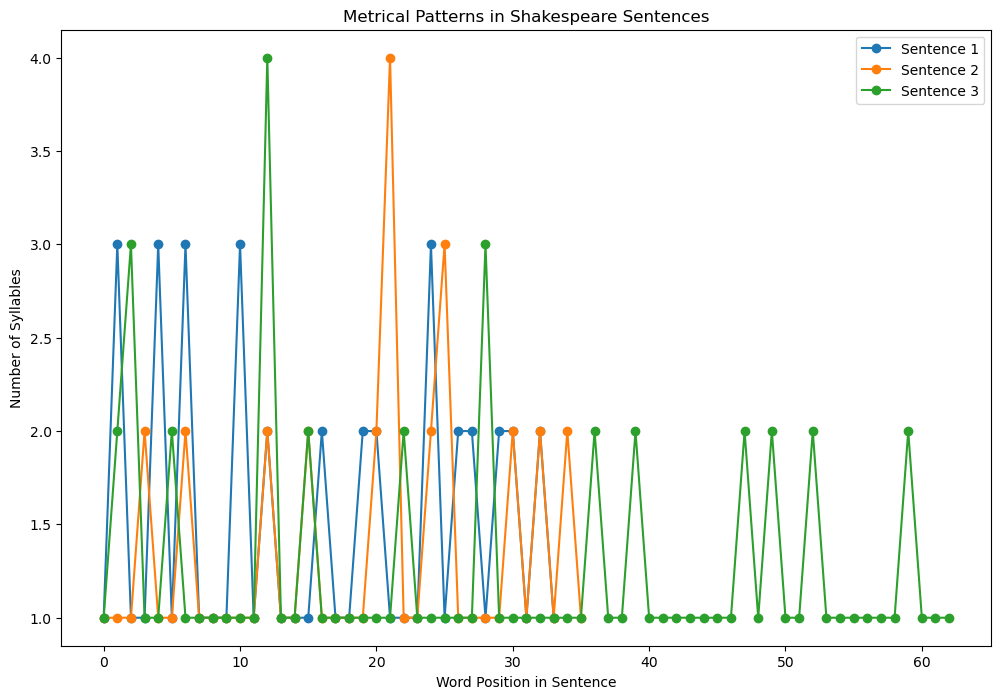

No rhymes detected.


In [8]:
nltk.download('punkt')  # Download the necessary NLTK data for tokenization

# Read the file
file_path = '/kaggle/input/romeo-and-juliet-chor/Shakespeare chor.txt'
with open(file_path, 'r') as file:
    text = file.read()

# Tokenize the text into sentences and words
sentences = sent_tokenize(text)
words = [word_tokenize(sent) for sent in sentences]

# Function to identify rhyme
def is_rhyme(word1, word2):
    return word1[-2:] == word2[-2:] if word1 and word2 else False

# Function to get metrical patterns (syllable counts) for sentences
def get_metrical_patterns(tokenized_sentences):
    return [[syllables.estimate(word) for word in sent] for sent in tokenized_sentences]

# Metrical patterns for each sentence
metrical_patterns = get_metrical_patterns(words)

# Take a sample of sentences to avoid overcrowding the plot
sample_size = 10
sample_sentences = metrical_patterns[:sample_size]

plt.figure(figsize=(12, 8))
for i, pattern in enumerate(sample_sentences, 1):
    plt.plot(pattern, label=f'Sentence {i}', marker='o')
plt.xlabel('Word Position in Sentence')
plt.ylabel('Number of Syllables')
plt.title('Metrical Patterns in Shakespeare Sentences')
plt.legend()
plt.show()

# Check for rhyme
rhyme_scheme = []
for sent in words:
    if len(sent) >= 2 and is_rhyme(sent[-1], sent[-2]):
        rhyme_scheme.append((sent[-1], sent[-2]))

# Visualizing rhyme scheme
rhyme_words = [word for pair in rhyme_scheme for word in pair]
rhyme_counts = nltk.FreqDist(rhyme_words)

if rhyme_counts:  # Check if there are any rhymes
    words, counts = zip(*rhyme_counts.items())

    plt.figure(figsize=(12, 8))
    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Rhyme Frequency')
    plt.title('Rhyme Scheme')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("No rhymes detected.")


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


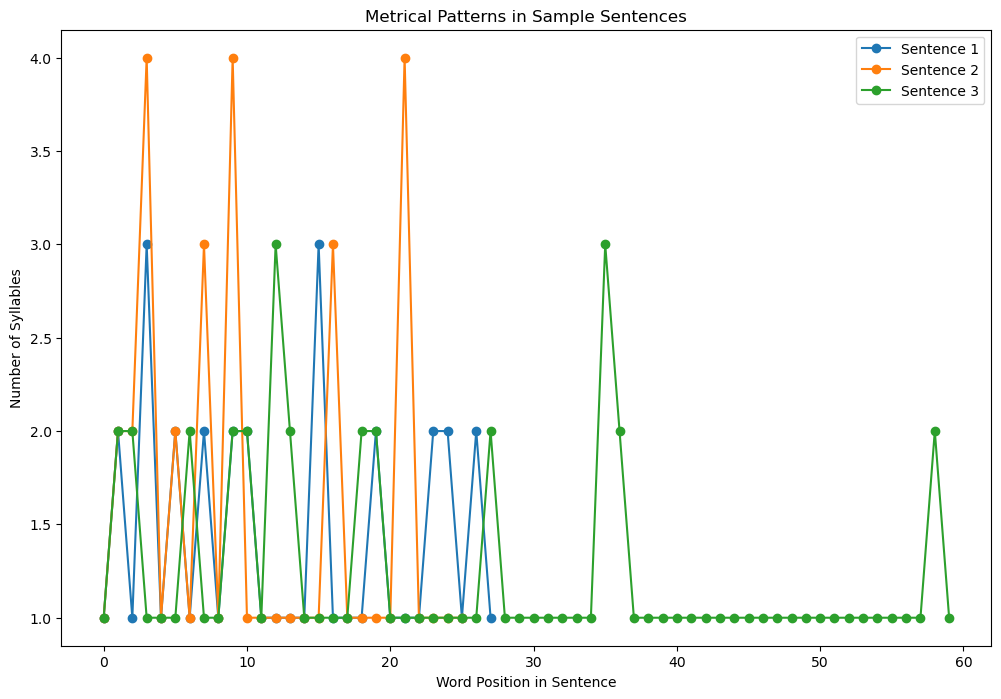

No rhymes detected.


In [4]:
nltk.download('punkt')  # Download the necessary NLTK data for tokenization

# Read the file
file_path = '/kaggle/input/romeo-and-juliet-chor/German Male.txt'
with open(file_path, 'r') as file:
    text = file.read()

# Tokenize the text into sentences and words
sentences = sent_tokenize(text, language='german')
words = [word_tokenize(sent, language='german') for sent in sentences]

# Function to identify rhyme
def is_rhyme(word1, word2):
    return word1[-2:] == word2[-2:] if word1 and word2 else False

# Function to get metrical patterns (syllable counts) for sentences
def get_metrical_patterns(tokenized_sentences):
    return [[syllables.estimate(word) for word in sent] for sent in tokenized_sentences]

# Metrical patterns for each sentence
metrical_patterns = get_metrical_patterns(words)

# Take a sample of sentences to avoid overcrowding the plot
sample_size = 10
sample_sentences = metrical_patterns[:sample_size]

plt.figure(figsize=(12, 8))
for i, pattern in enumerate(sample_sentences, 1):
    plt.plot(pattern, label=f'Sentence {i}', marker='o')
plt.xlabel('Word Position in Sentence')
plt.ylabel('Number of Syllables')
plt.title('Metrical Patterns in Sample Sentences')
plt.legend()
plt.show()

# Check for rhyme
rhyme_scheme = []
for sent in words:
    if len(sent) >= 2 and is_rhyme(sent[-1], sent[-2]):
        rhyme_scheme.append((sent[-1], sent[-2]))

# Visualizing rhyme scheme
rhyme_words = [word for pair in rhyme_scheme for word in pair]
rhyme_counts = nltk.FreqDist(rhyme_words)

if rhyme_counts:  # Check if there are any rhymes
    words, counts = zip(*rhyme_counts.items())

    plt.figure(figsize=(12, 8))
    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Rhyme Frequency')
    plt.title('Rhyme Scheme')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("No rhymes detected.")


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


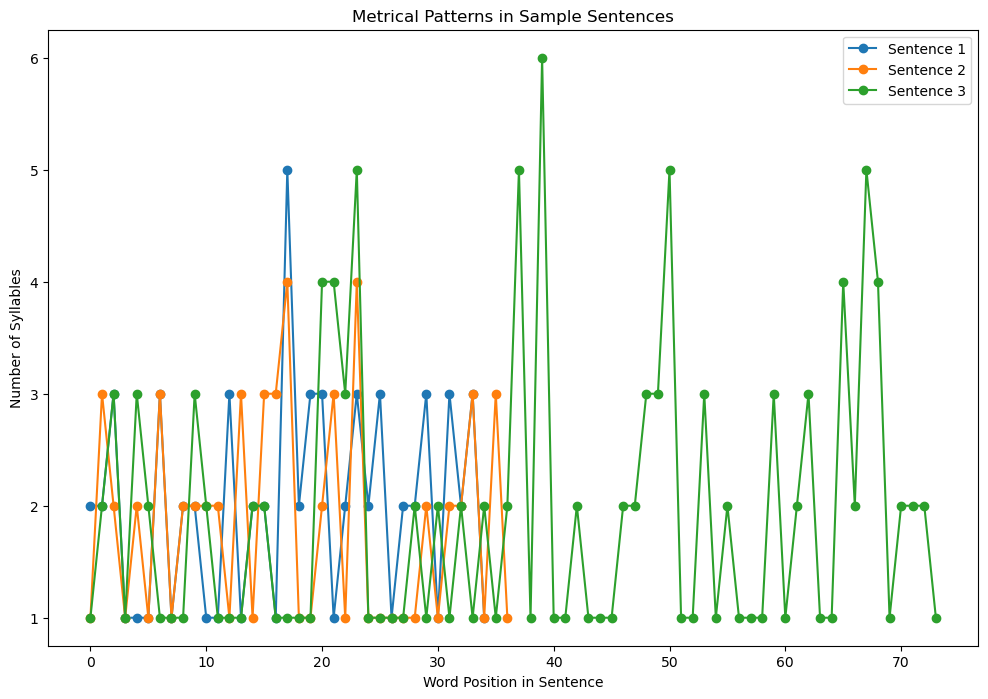

No rhymes detected.


In [5]:
nltk.download('punkt')  # Download the necessary NLTK data for tokenization

# Read the file
file_path = '/kaggle/input/romeo-and-juliet-chor/Italian Male.txt'
with open(file_path, 'r') as file:
    text = file.read()

# Tokenize the text into sentences and words
sentences = sent_tokenize(text)
words = [word_tokenize(sent) for sent in sentences]

# Function to identify rhyme
def is_rhyme(word1, word2):
    return word1[-2:] == word2[-2:] if word1 and word2 else False

# Function to get metrical patterns (syllable counts) for sentences
def get_metrical_patterns(tokenized_sentences):
    return [[syllables.estimate(word) for word in sent] for sent in tokenized_sentences]

# Metrical patterns for each sentence
metrical_patterns = get_metrical_patterns(words)

# Take a sample of sentences to avoid overcrowding the plot
sample_size = 10
sample_sentences = metrical_patterns[:sample_size]

plt.figure(figsize=(12, 8))
for i, pattern in enumerate(sample_sentences, 1):
    plt.plot(pattern, label=f'Sentence {i}', marker='o')
plt.xlabel('Word Position in Sentence')
plt.ylabel('Number of Syllables')
plt.title('Metrical Patterns in Sample Sentences')
plt.legend()
plt.show()

# Check for rhyme
rhyme_scheme = []
for sent in words:
    if len(sent) >= 2 and is_rhyme(sent[-1], sent[-2]):
        rhyme_scheme.append((sent[-1], sent[-2]))

# Visualizing rhyme scheme
rhyme_words = [word for pair in rhyme_scheme for word in pair]
rhyme_counts = nltk.FreqDist(rhyme_words)

if rhyme_counts:  # Check if there are any rhymes
    words, counts = zip(*rhyme_counts.items())

    plt.figure(figsize=(12, 8))
    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Rhyme Frequency')
    plt.title('Rhyme Scheme')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("No rhymes detected.")

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


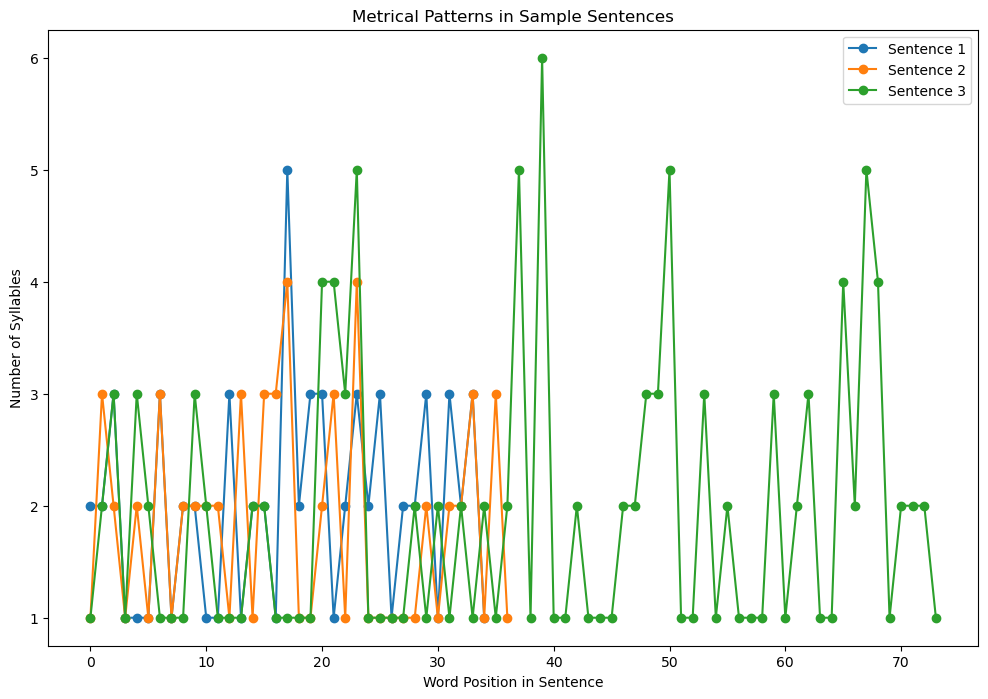

No rhymes detected.


In [6]:
nltk.download('punkt')  # Download the necessary NLTK data for tokenization

# Read the file
file_path = '/kaggle/input/romeo-and-juliet-chor/Italian Male.txt'
with open(file_path, 'r') as file:
    text = file.read()

# Tokenize the text into sentences and words
sentences = sent_tokenize(text)
words = [word_tokenize(sent) for sent in sentences]

# Function to identify rhyme
def is_rhyme(word1, word2):
    return word1[-2:] == word2[-2:] if word1 and word2 else False

# Function to get metrical patterns (syllable counts) for sentences
def get_metrical_patterns(tokenized_sentences):
    return [[syllables.estimate(word) for word in sent] for sent in tokenized_sentences]

# Metrical patterns for each sentence
metrical_patterns = get_metrical_patterns(words)

# Take a sample of sentences to avoid overcrowding the plot
sample_size = 10
sample_sentences = metrical_patterns[:sample_size]

plt.figure(figsize=(12, 8))
for i, pattern in enumerate(sample_sentences, 1):
    plt.plot(pattern, label=f'Sentence {i}', marker='o')
plt.xlabel('Word Position in Sentence')
plt.ylabel('Number of Syllables')
plt.title('Metrical Patterns in Sample Sentences')
plt.legend()
plt.show()

# Check for rhyme
rhyme_scheme = []
for sent in words:
    if len(sent) >= 2 and is_rhyme(sent[-1], sent[-2]):
        rhyme_scheme.append((sent[-1], sent[-2]))

# Visualizing rhyme scheme
rhyme_words = [word for pair in rhyme_scheme for word in pair]
rhyme_counts = nltk.FreqDist(rhyme_words)

if rhyme_counts:  # Check if there are any rhymes
    words, counts = zip(*rhyme_counts.items())

    plt.figure(figsize=(12, 8))
    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Rhyme Frequency')
    plt.title('Rhyme Scheme')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("No rhymes detected.")


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


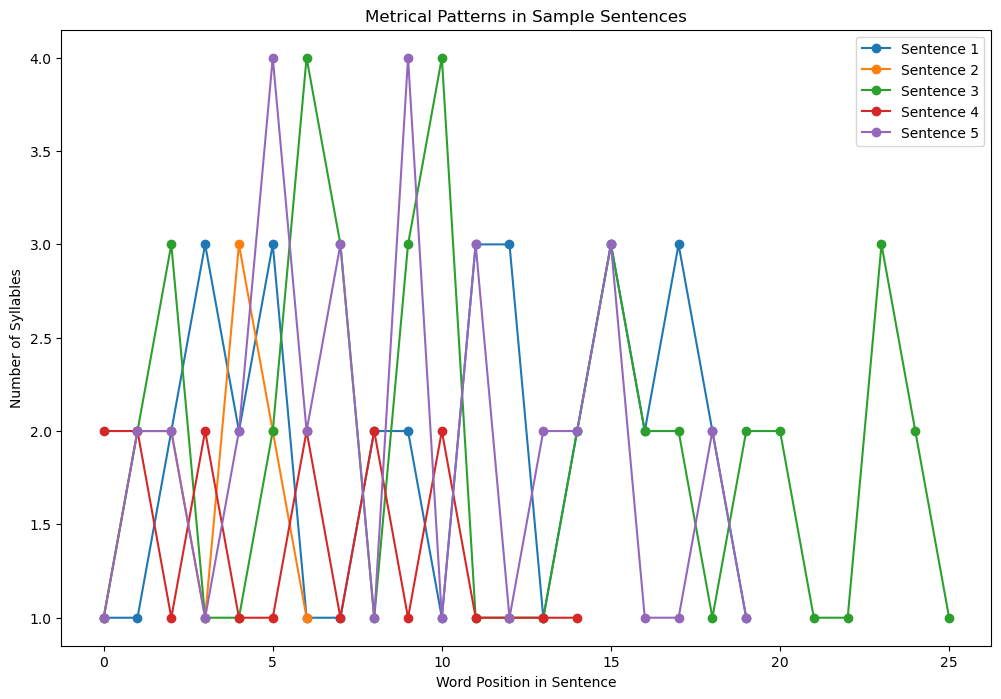

No rhymes detected.


In [7]:
nltk.download('punkt')  # Download the necessary NLTK data for tokenization

# Read the file
file_path = '/kaggle/input/spanish-male/Spanish Male.txt'
with open(file_path, 'r') as file:
    text = file.read()

# Tokenize the text into sentences and words
sentences = sent_tokenize(text)
words = [word_tokenize(sent) for sent in sentences]

# Function to identify rhyme
def is_rhyme(word1, word2):
    return word1[-2:] == word2[-2:] if word1 and word2 else False

# Function to get metrical patterns (syllable counts) for sentences
def get_metrical_patterns(tokenized_sentences):
    return [[syllables.estimate(word) for word in sent] for sent in tokenized_sentences]

# Metrical patterns for each sentence
metrical_patterns = get_metrical_patterns(words)

# Take a sample of sentences to avoid overcrowding the plot
sample_size = 10
sample_sentences = metrical_patterns[:sample_size]

plt.figure(figsize=(12, 8))
for i, pattern in enumerate(sample_sentences, 1):
    plt.plot(pattern, label=f'Sentence {i}', marker='o')
plt.xlabel('Word Position in Sentence')
plt.ylabel('Number of Syllables')
plt.title('Metrical Patterns in Sample Sentences')
plt.legend()
plt.show()

# Check for rhyme
rhyme_scheme = []
for sent in words:
    if len(sent) >= 2 and is_rhyme(sent[-1], sent[-2]):
        rhyme_scheme.append((sent[-1], sent[-2]))

# Visualizing rhyme scheme
rhyme_words = [word for pair in rhyme_scheme for word in pair]
rhyme_counts = nltk.FreqDist(rhyme_words)

if rhyme_counts:  # Check if there are any rhymes
    words, counts = zip(*rhyme_counts.items())

    plt.figure(figsize=(12, 8))
    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Rhyme Frequency')
    plt.title('Rhyme Scheme')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("No rhymes detected.")


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


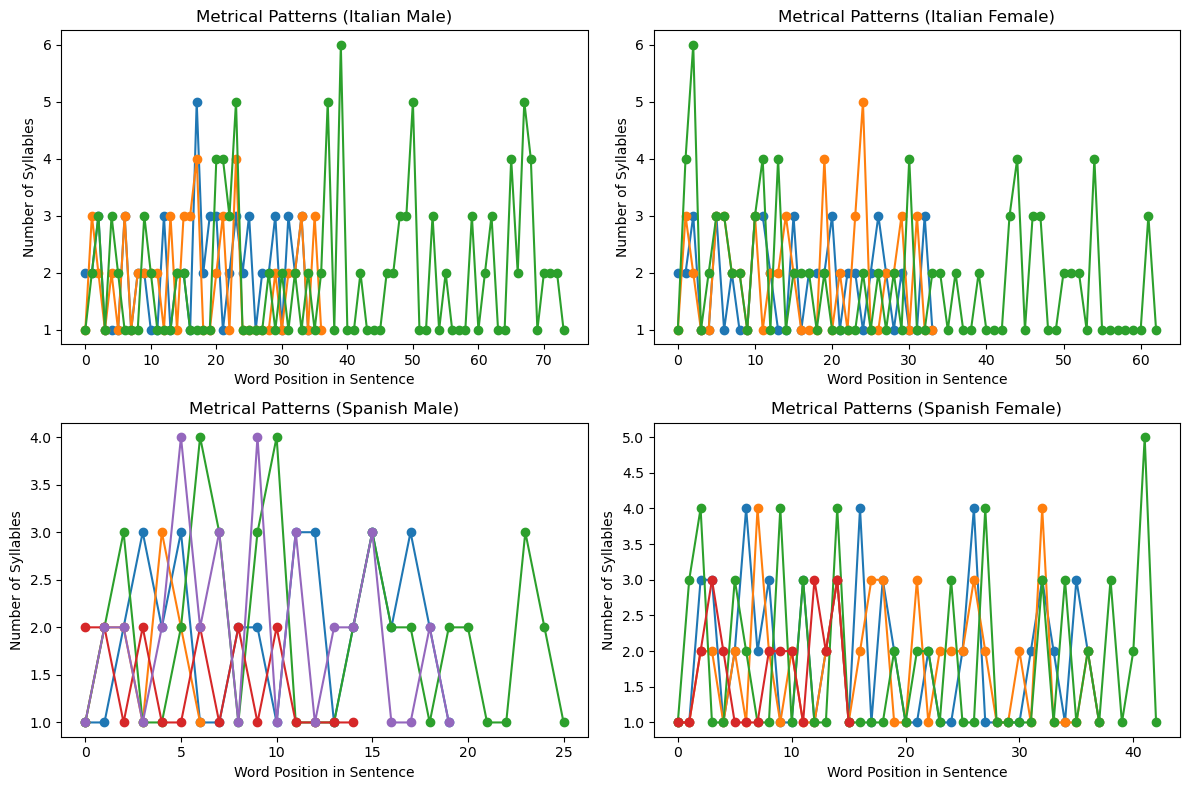

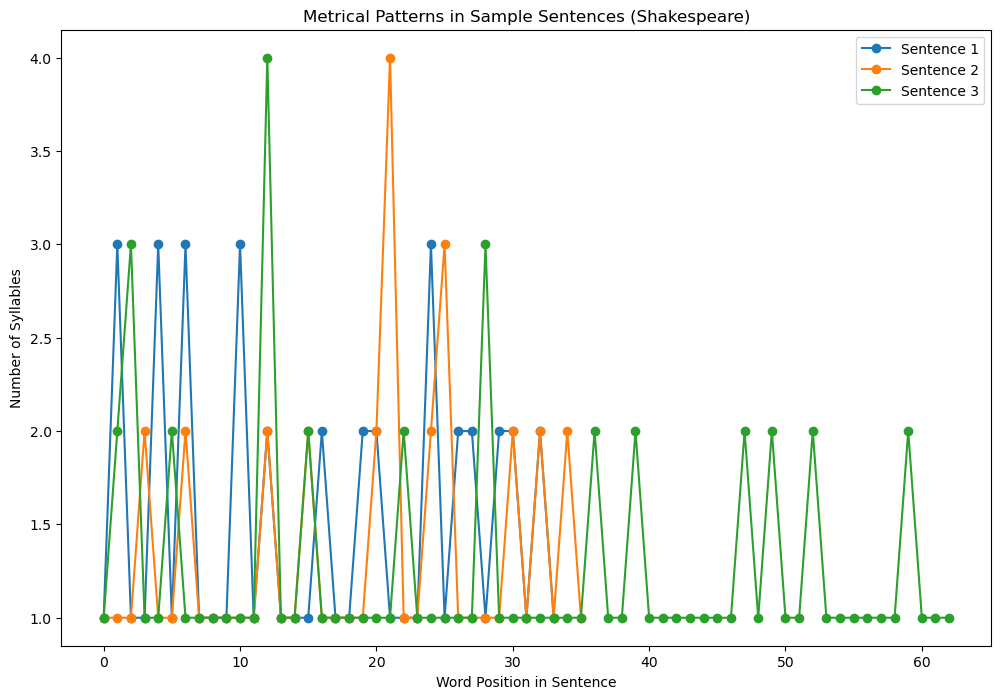

In [11]:
nltk.download('punkt')  # Download the necessary NLTK data for tokenization

# Define file paths
file_paths = {
    'English Shakespeare': '/kaggle/input/romeo-and-juliet-chor/Shakespeare chor.txt',
    'Italian Male': '/kaggle/input/romeo-and-juliet-chor/Italian Male.txt',
    'Italian Female': '/kaggle/input/romeo-and-juliet-chor/Italian female.txt',
    'Spanish Male': '/kaggle/input/spanish-male/Spanish Male.txt',
    'Spanish Female': '/kaggle/input/romeo-and-juliet-chor/Spanish Female.txt',
}

# Function to identify rhyme
def is_rhyme(word1, word2):
    return word1[-2:] == word2[-2:] if word1 and word2 else False

# Function to get metrical patterns (syllable counts) for sentences
def get_metrical_patterns(tokenized_sentences):
    return [[syllables.estimate(word) for word in sent] for sent in tokenized_sentences]

# Create subplot for non-English languages
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
subplots = iter(axs.flatten())

# Loop through each file, analyze metrical patterns, and plot results
for label, file_path in file_paths.items():
    if label == 'English Shakespeare':
        continue  # Skip this iteration

    with open(file_path, 'r') as file:
        text = file.read()

    # Tokenize the text into sentences and words
    sentences = sent_tokenize(text)
    words = [word_tokenize(sent) for sent in sentences]

    # Metrical patterns for each sentence
    metrical_patterns = get_metrical_patterns(words)

    # Take a sample of sentences to avoid overcrowding the plot
    sample_size = 10
    sample_sentences = metrical_patterns[:sample_size]

    ax = next(subplots)
    for i, pattern in enumerate(sample_sentences, 1):
        ax.plot(pattern, marker='o')
    ax.set_title(f'Metrical Patterns ({label})')
    ax.set_xlabel('Word Position in Sentence')
    ax.set_ylabel('Number of Syllables')

plt.tight_layout()
plt.show()

# Plot English Shakespeare separately
with open(file_paths['English Shakespeare'], 'r') as file:
    text = file.read()

sentences = sent_tokenize(text)
words = [word_tokenize(sent) for sent in sentences]
metrical_patterns = get_metrical_patterns(words)
sample_size = 10
sample_sentences = metrical_patterns[:sample_size]

plt.figure(figsize=(12, 8))
for i, pattern in enumerate(sample_sentences, 1):
    plt.plot(pattern, label=f'Sentence {i}', marker='o')
plt.xlabel('Word Position in Sentence')
plt.ylabel('Number of Syllables')
plt.title(f'Metrical Patterns in Sample Sentences (Shakespeare)')
plt.legend()
plt.show()

# Rhyme scheme analysis and plots remain the same as in the previous code snippet


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


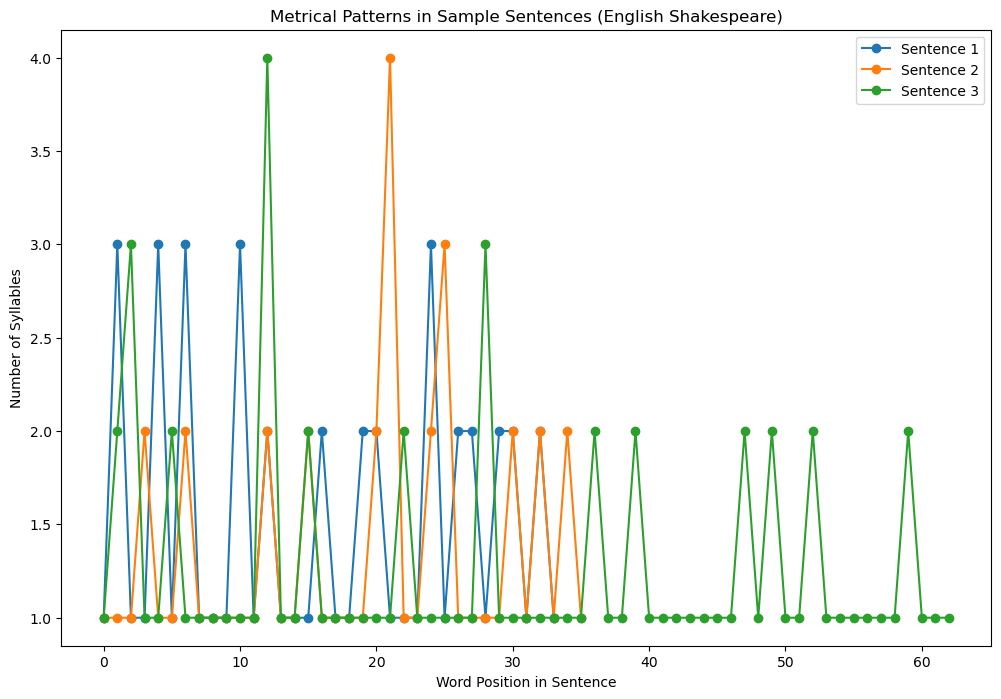

No rhymes detected for English Shakespeare.


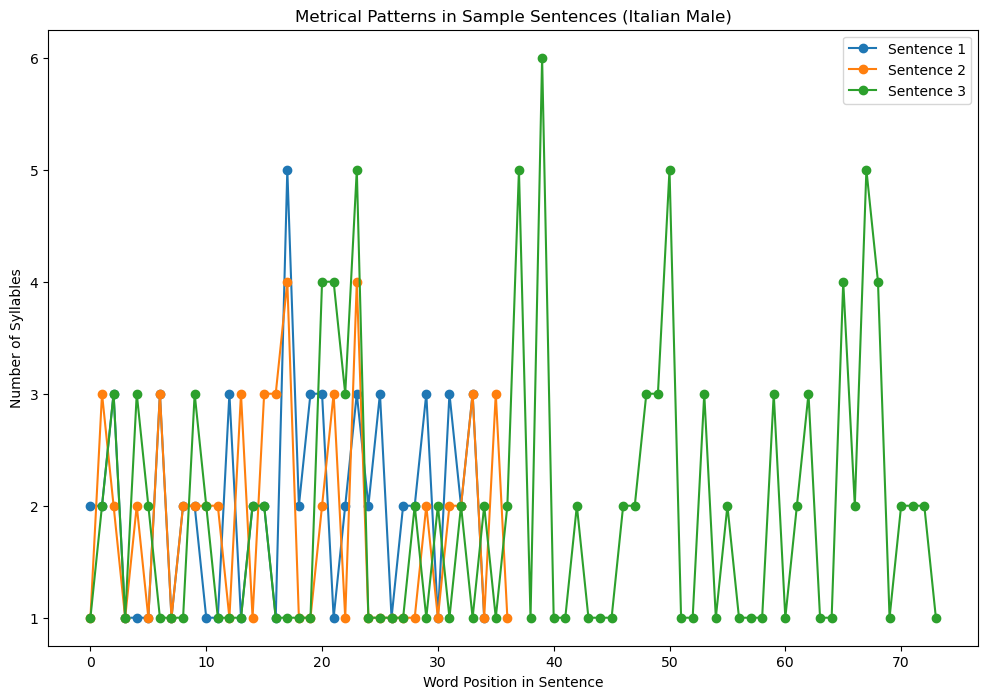

No rhymes detected for Italian Male.


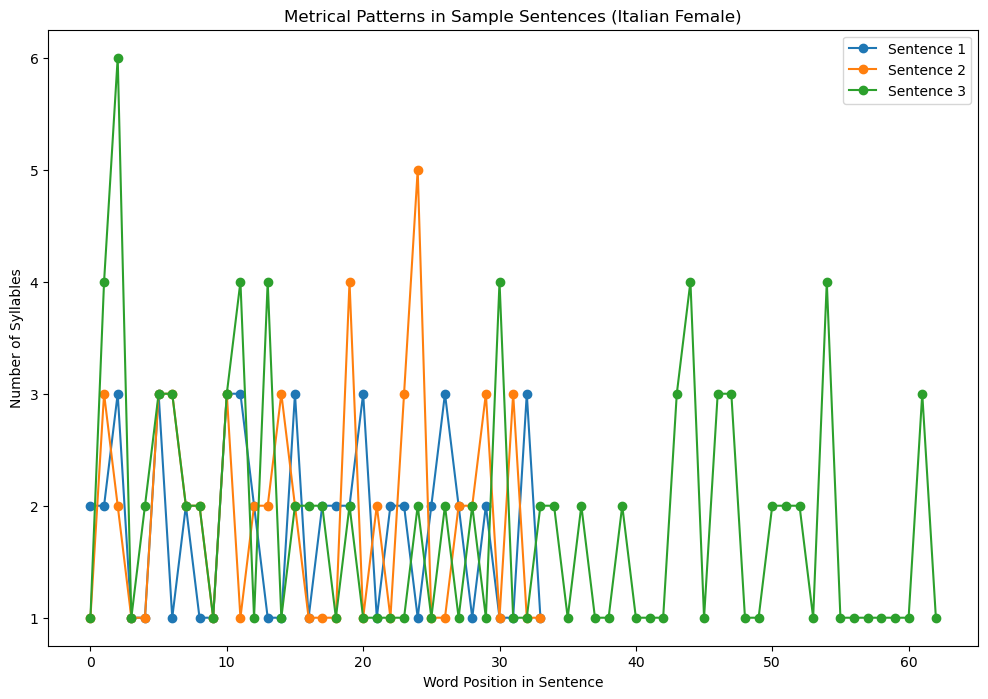

No rhymes detected for Italian Female.


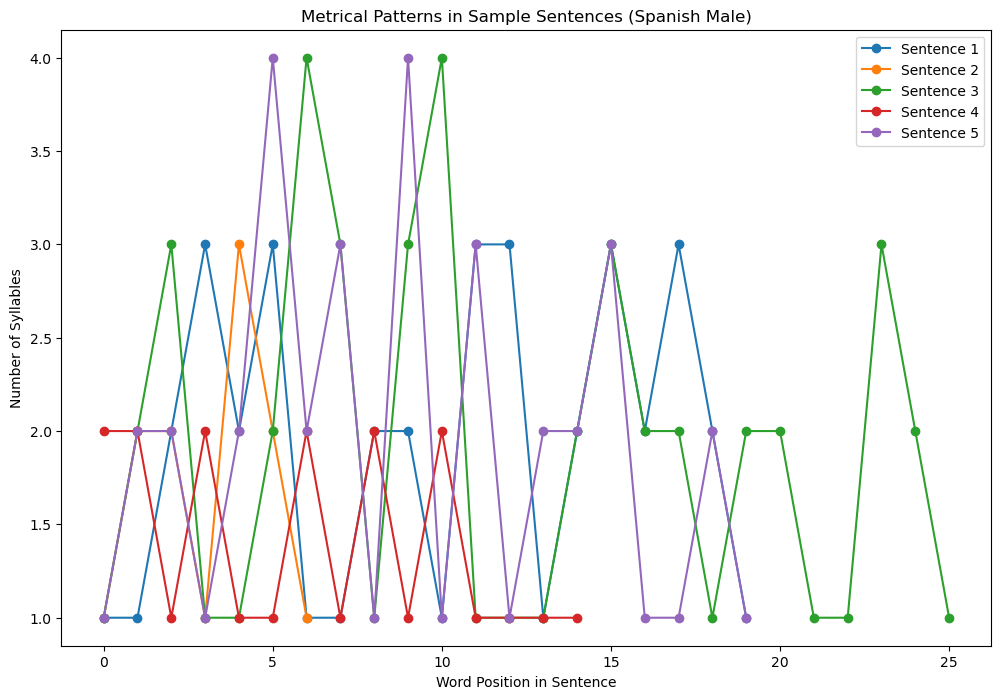

No rhymes detected for Spanish Male.


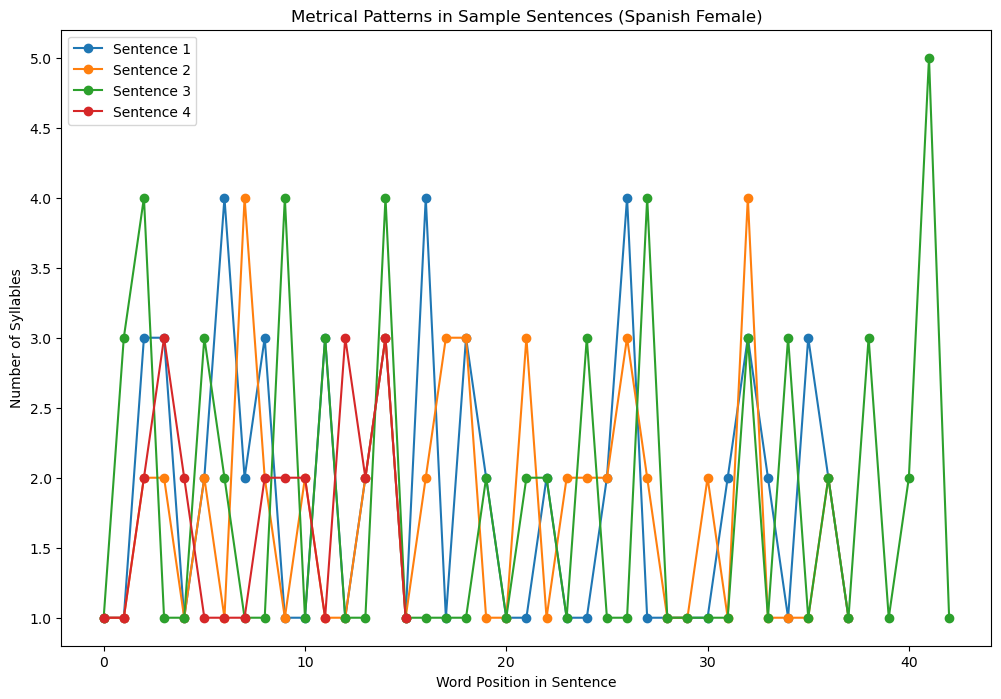

No rhymes detected for Spanish Female.


In [12]:
nltk.download('punkt')  # Download the necessary NLTK data for tokenization

# Define file paths
file_paths = {
    'English Shakespeare': '/kaggle/input/romeo-and-juliet-chor/Shakespeare chor.txt',
    'Italian Male': '/kaggle/input/romeo-and-juliet-chor/Italian Male.txt',
    'Italian Female': '/kaggle/input/romeo-and-juliet-chor/Italian female.txt',
    'Spanish Male': '/kaggle/input/spanish-male/Spanish Male.txt',
    'Spanish Female': '/kaggle/input/romeo-and-juliet-chor/Spanish Female.txt',
}

# Function to identify rhyme
def is_rhyme(word1, word2):
    return word1[-2:] == word2[-2:] if word1 and word2 else False

# Function to get metrical patterns (syllable counts) for sentences
def get_metrical_patterns(tokenized_sentences):
    return [[syllables.estimate(word) for word in sent] for sent in tokenized_sentences]

# Loop through each file, analyze metrical patterns and rhyme schemes, and plot results
for label, file_path in file_paths.items():
    with open(file_path, 'r') as file:
        text = file.read()

    # Tokenize the text into sentences and words
    sentences = sent_tokenize(text)
    words = [word_tokenize(sent) for sent in sentences]

    # Metrical patterns for each sentence
    metrical_patterns = get_metrical_patterns(words)

    # Take a sample of sentences to avoid overcrowding the plot
    sample_size = 10
    sample_sentences = metrical_patterns[:sample_size]

    plt.figure(figsize=(12, 8))
    for i, pattern in enumerate(sample_sentences, 1):
        plt.plot(pattern, label=f'Sentence {i}', marker='o')
    plt.xlabel('Word Position in Sentence')
    plt.ylabel('Number of Syllables')
    plt.title(f'Metrical Patterns in Sample Sentences ({label})')
    plt.legend()
    plt.show()

    # Check for rhyme
    rhyme_scheme = []
    for sent in words:
        if len(sent) >= 2 and is_rhyme(sent[-1], sent[-2]):
            rhyme_scheme.append((sent[-1], sent[-2]))

    # Visualizing rhyme scheme
    rhyme_words = [word for pair in rhyme_scheme for word in pair]
    rhyme_counts = nltk.FreqDist(rhyme_words)

    if rhyme_counts:  # Check if there are any rhymes
        words, counts = zip(*rhyme_counts.items())

        plt.figure(figsize=(12, 8))
        plt.bar(words, counts)
        plt.xlabel('Words')
        plt.ylabel('Rhyme Frequency')
        plt.title(f'Rhyme Scheme ({label})')
        plt.xticks(rotation=90)
        plt.show()
    else:
        print(f"No rhymes detected for {label}.")


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


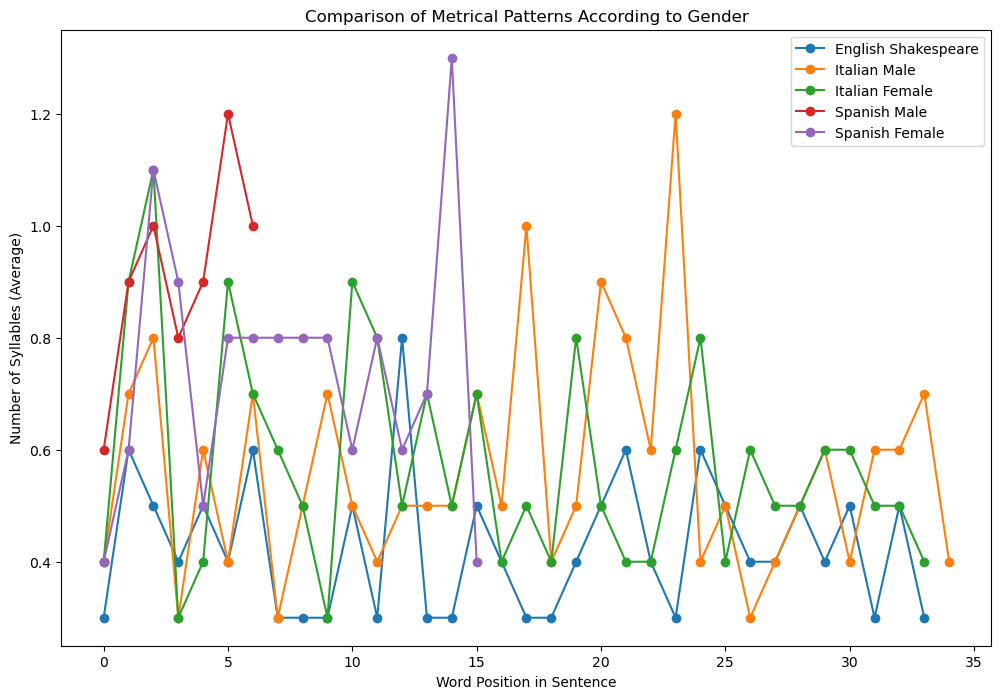

In [13]:
nltk.download('punkt')  # Download the necessary NLTK data for tokenization

# Define file paths
file_paths = {
    'English Shakespeare': '/kaggle/input/romeo-and-juliet-chor/Shakespeare chor.txt',
    'Italian Male': '/kaggle/input/romeo-and-juliet-chor/Italian Male.txt',
    'Italian Female': '/kaggle/input/romeo-and-juliet-chor/Italian female.txt',
    'Spanish Male': '/kaggle/input/spanish-male/Spanish Male.txt',
    'Spanish Female': '/kaggle/input/romeo-and-juliet-chor/Spanish Female.txt',
}

# Function to identify rhyme
def is_rhyme(word1, word2):
    return word1[-2:] == word2[-2:] if word1 and word2 else False

# Function to get metrical patterns (syllable counts) for sentences
def get_metrical_patterns(tokenized_sentences):
    return [[syllables.estimate(word) for word in sent] for sent in tokenized_sentences]

# Set up the plot for metrical patterns
plt.figure(figsize=(12, 8))

# Loop through each file, analyze metrical patterns, and plot results
for label, file_path in file_paths.items():
    with open(file_path, 'r') as file:
        text = file.read()

    # Tokenize the text into sentences and words
    sentences = sent_tokenize(text)
    words = [word_tokenize(sent) for sent in sentences]

    # Metrical patterns for each sentence
    metrical_patterns = get_metrical_patterns(words)

    # Take a sample of sentences to avoid overcrowding the plot
    sample_size = 10
    sample_sentences = metrical_patterns[:sample_size]

    # Average metrical pattern for the sample
    avg_pattern = [sum(col) / sample_size for col in zip(*sample_sentences)]

    plt.plot(avg_pattern, label=label, marker='o')

plt.xlabel('Word Position in Sentence')
plt.ylabel('Number of Syllables (Average)')
plt.title('Comparison of Metrical Patterns According to Gender')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import nltk
import syllables
import seaborn as sns
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('punkt')  # Download the necessary NLTK data for tokenization

# Define file paths
file_paths = {
    'Spanish Male': '/kaggle/input/spanish-male/Spanish Male.txt',
    'Spanish Female': '/kaggle/input/romeo-and-juliet-chor/Spanish Female.txt',
}

# Function to identify rhyme
def is_rhyme(word1, word2):
    return word1[-2:] == word2[-2:] if word1 and word2 else False

# Function to get metrical patterns (syllable counts) for sentences
def get_metrical_patterns(tokenized_sentences):
    return [[syllables.estimate(word) for word in sent] for sent in tokenized_sentences]

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplot for non-English languages
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
subplots = iter(axs.flatten())

# Loop through each file, analyze metrical patterns, and plot results
for label, file_path in file_paths.items():
    if label == 'English Shakespeare':
        continue  # Skip this iteration

    with open(file_path, 'r') as file:
        text = file.read()

    # Tokenize the text into sentences and words
    sentences = sent_tokenize(text)
    words = [word_tokenize(sent) for sent in sentences]

    # Metrical patterns for each sentence
    metrical_patterns = get_metrical_patterns(words)

    # Take a sample of sentences to avoid overcrowding the plot
    sample_size = 10
    sample_sentences = metrical_patterns[:sample_size]

    ax = next(subplots)
    for i, pattern in enumerate(sample_sentences, 1):
        sns.lineplot(x=range(len(pattern)), y=pattern, marker='o', ax=ax)
    ax.set_title(f'Metrical Patterns ({label})')
    ax.set_xlabel('Word Position in Sentence')
    ax.set_ylabel('Number of Syllables')

plt.tight_layout()
plt.show()

# Plot English Shakespeare separately
with open(file_paths['English Shakespeare'], 'r') as file:
    text = file.read()

sentences = sent_tokenize(text)
words = [word_tokenize(sent) for sent in sentences]
metrical_patterns = get_metrical_patterns(words)
sample_size = 10
sample_sentences = metrical_patterns[:sample_size]

plt.figure(figsize=(12, 8))
for i, pattern in enumerate(sample_sentences, 1):
    sns.lineplot(x=range(len(pattern)), y=pattern, label=f'Sentence {i}', marker='o')
plt.xlabel('Word Position in Sentence')
plt.ylabel('Number of Syllables')
plt.title(f'Metrical Patterns in Spanish Sentences')
plt.legend()
plt.show()

# Rhyme scheme analysis and plots remain the same as in the previous code snippet


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


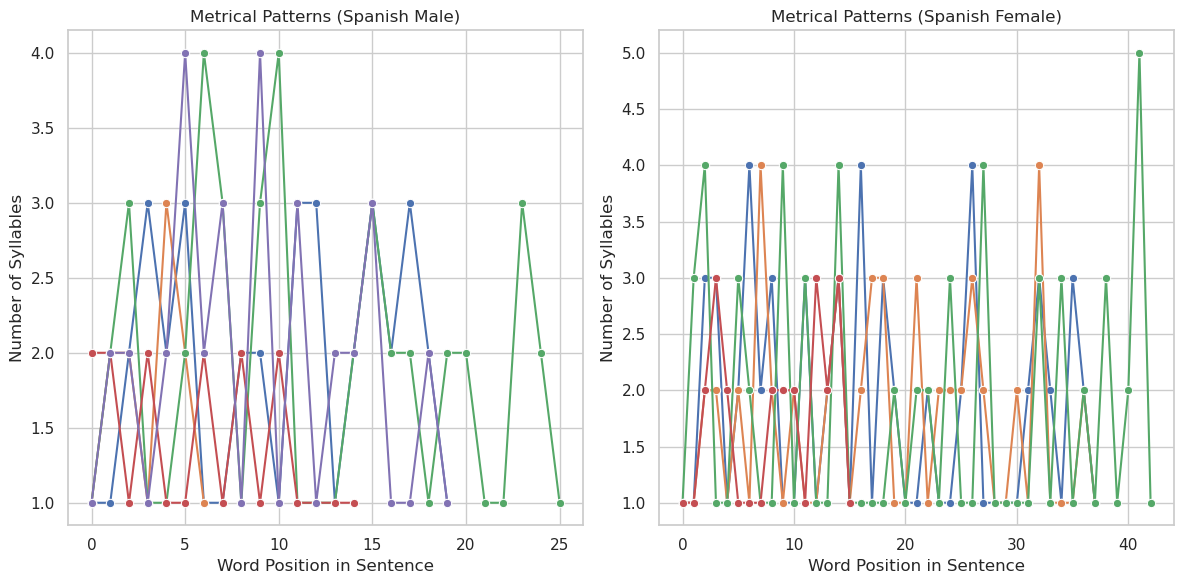

In [46]:
nltk.download('punkt')  # Download the necessary NLTK data for tokenization

# Define file paths
file_paths = {
    'Spanish Male': '/kaggle/input/spanish-male/Spanish Male.txt',
    'Spanish Female': '/kaggle/input/romeo-and-juliet-chor/Spanish Female.txt',
}

# Function to identify rhyme
def is_rhyme(word1, word2):
    return word1[-2:] == word2[-2:] if word1 and word2 else False

# Function to get metrical patterns (syllable counts) for sentences
def get_metrical_patterns(tokenized_sentences):
    return [[syllables.estimate(word) for word in sent] for sent in tokenized_sentences]

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplot for Spanish Male and Female
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Loop through each file, analyze metrical patterns, and plot results
for ax, (label, file_path) in zip(axs, file_paths.items()):
    with open(file_path, 'r') as file:
        text = file.read()

    # Tokenize the text into sentences and words
    sentences = sent_tokenize(text)
    words = [word_tokenize(sent) for sent in sentences]

    # Metrical patterns for each sentence
    metrical_patterns = get_metrical_patterns(words)

    # Take a sample of sentences to avoid overcrowding the plot
    sample_size = 10
    sample_sentences = metrical_patterns[:sample_size]

    for i, pattern in enumerate(sample_sentences, 1):
        sns.lineplot(x=range(len(pattern)), y=pattern, marker='o', ax=ax)
    ax.set_title(f'Metrical Patterns ({label})')
    ax.set_xlabel('Word Position in Sentence')
    ax.set_ylabel('Number of Syllables')

plt.tight_layout()
plt.show()


# Rhyme

In [45]:
# Tokenize the text
english_text = """
Two households, both alike in dignity,            
What here shall miss, our toil shall strive to mend.
"""

sentences = sent_tokenize(english_text)
words = word_tokenize(english_text)

# Rhyme
rhymes = {}
for word in words:
    rhymes[word] = pronouncing.rhymes(word)

# Syllables
syllable_count = {}
for word in words:
    syllable_count[word] = syllables.estimate(word)

# For metrical pattern, we'd typically look at stressed and unstressed syllables.
# This requires a more complex analysis and tools like the CMU Pronouncing Dictionary.

print(rhymes)
print(syllable_count)


{'Two': ['abou', 'abreu', 'accrue', 'achoo', 'adieu', 'ado', 'aeroperu', 'anew', 'anew', 'askew', 'babu', 'badu', 'baku', 'ballou', 'ballyhoo', 'bamboo', 'beaucoup', 'bellew', 'belyeu', 'benhamou', 'beu', 'bleu', 'blew', 'blue', 'boo', 'breaux', 'brew', 'brue', 'byu', 'canoe', 'carilou', 'cebu', 'chaloux', 'champoux', 'chengdu', 'chew', 'chiu', 'choo', 'chou', 'chu', 'clue', 'cmu', 'construe', 'coo', 'corbu', 'cou', 'coup', 'coups', 'coutu', 'cpu', 'crew', 'crewe', 'cue', 'deblois', 'debut', 'decou', 'depardieu', 'depew', 'depue', 'deux', 'dew', 'dfw', 'dfw', 'do', 'doo', 'douwe', 'drew', 'drive-thru', 'dru', 'du', 'due', 'due', 'edu', 'egnew', 'ensue', 'eschew', 'ewe', 'fauroux', 'few', 'fitzhugh', 'flew', 'flu', 'flue', 'fondue', 'foo', 'fourtou', 'frew', 'frueh', 'fu', 'geroux', 'gignoux', 'giroux', 'glew', 'glue', 'gnu', 'goo', 'graue', 'grew', 'grewe', 'grue', 'gu', 'gue', 'heroux', 'herscu', 'hew', 'hewe', 'hitherto', 'hoo', 'hou', 'houx', 'hsu', 'hu', 'hue', 'hugh', 'hugh', 'hul

In [44]:
# Ensure necessary NLTK data is downloaded
nltk.download('punkt')

def count_rhymes_in_text(text):
    # Tokenize the text using NLTK
    words = word_tokenize(text)
    
    # Filter out non-alphabetic tokens
    words = [word for word in words if word.isalpha()]
    
    rhyme_count = 0
    checked_pairs = set()  # To ensure we don't double count rhymes

    for i, word1 in enumerate(words):
        for j, word2 in enumerate(words):
            if i != j and (i, j) not in checked_pairs and (j, i) not in checked_pairs:
                if word2 in pronouncing.rhymes(word1):
                    rhyme_count += 1
                    checked_pairs.add((i, j))
                    checked_pairs.add((j, i))

    return rhyme_count

text = """Zwei Häuser in Verona, würdevoll, 
Wohin als Szene unser Spiel euch bannt, 
Erwecken neuen Streit aus altem Groll, 
Und Bürgerblut befleckt die Bürgerhand. 
Aus beider Feinde unheilvollem Schoß 
Entspringt ein Liebespaar, unsternbedroht, 
Und es begräbt — ein jämmerliches Los — 
Der Väter langgehegten Streit ihr Tod. 
Wie diese Liebe nun dem Tod verfiel, 
Der Eltern Eifern, immerfort erneut, 
Erst in der Kinder Ende fand sein Ziel, 
Das lehrt zwei Stunden euch die Bühne heut; 
Wollt ihr geduldig euer Ohr dem leih’n, 
Woll’n wir’s von Mängeln, wo’s noch not, befrei’n."""

rhyme_count = count_rhymes_in_text(text)
print(f"Number of rhymes in the text: {rhyme_count}")


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Number of rhymes in the text: 7


In [42]:
# Ensure CMU Pronouncing Dictionary is downloaded
nltk.download('cmudict')

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Load CMU Pronouncing Dictionary
pron_dict = cmudict.dict()

def does_rhyme(word1, word2):
    """Check if two words rhyme based on their phonetic ending."""
    if word1.lower() not in pron_dict or word2.lower() not in pron_dict:
        return False
    return pron_dict[word1.lower()][-1] == pron_dict[word2.lower()][-1]

def count_rhymes_in_text(text):
    # Tokenize the text using spaCy
    doc = nlp(text)
    
    # Extract words from the text
    words = [token.text for token in doc if token.is_alpha]
    
    rhyme_count = 0
    checked_pairs = set()  # To ensure we don't double count rhymes

    for i, word1 in enumerate(words):
        for j, word2 in enumerate(words):
            if i != j and (i, j) not in checked_pairs and (j, i) not in checked_pairs:
                if does_rhyme(word1, word2):
                    rhyme_count += 1
                    checked_pairs.add((i, j))
                    checked_pairs.add((j, i))

    return rhyme_count

text = """Two households, both alike in dignity,            
    In fair Verona, where we lay our scene,
    From ancient grudge break to new mutiny,           
    Where civil blood makes civil hands unclean.       
    From forth the fatal loins of these two foes
    A pair of star-cross’d lovers take their life;     
    Whose misadventur’d piteous overthrows
    Doth with their death bury their parents’ strife.  
    The fearful passage of their death-mark’d love,    
    And the continuance of their parents’ rage,        
    Which but their children’s end naught could remove,
    Is now the two hours’ traffic of our stage;        
    The which, if you with patient ears attend,        
    What here shall miss, our toil shall strive to mend."""

rhyme_count = count_rhymes_in_text(text)
print(f"Number of rhymes in the text: {rhyme_count}")


[nltk_data] Downloading package cmudict to /usr/share/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
Number of rhymes in the text: 51


In [43]:
# Ensure necessary NLTK data is downloaded
nltk.download('punkt')

def count_rhymes_in_text(text):
    # Tokenize the text using NLTK
    words = word_tokenize(text)
    
    # Filter out non-alphabetic tokens
    words = [word for word in words if word.isalpha()]
    
    rhyme_count = 0
    checked_pairs = set()  # To ensure we don't double count rhymes

    for i, word1 in enumerate(words):
        for j, word2 in enumerate(words):
            if i != j and (i, j) not in checked_pairs and (j, i) not in checked_pairs:
                if word2 in pronouncing.rhymes(word1):
                    rhyme_count += 1
                    checked_pairs.add((i, j))
                    checked_pairs.add((j, i))

    return rhyme_count

text = """Two households, both alike in dignity,            
    In fair Verona, where we lay our scene,
    From ancient grudge break to new mutiny,           
    Where civil blood makes civil hands unclean.       
    From forth the fatal loins of these two foes
    A pair of star-cross’d lovers take their life;     
    Whose misadventur’d piteous overthrows
    Doth with their death bury their parents’ strife.  
    The fearful passage of their death-mark’d love,    
    And the continuance of their parents’ rage,        
    Which but their children’s end naught could remove,
    Is now the two hours’ traffic of our stage;        
    The which, if you with patient ears attend,        
    What here shall miss, our toil shall strive to mend."""

rhyme_count = count_rhymes_in_text(text)
print(f"Number of rhymes in the text: {rhyme_count}")


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Number of rhymes in the text: 73


# Syllable

In [ ]:
# Read the file
file_path = '/kaggle/input/gender-difference/English male Romeo and Juliet.txt'
with open(file_path, 'r') as file:
    text = file.read()

# Tokenize the text into sentences and words
sentences = sent_tokenize(text)
words = [word_tokenize(sent) for sent in sentences]

# Analyze metrical patterns
metrical_patterns = []
for sent in words:
    meter = []
    for word in sent:
        syllable_count = syllables.estimate(word)
        meter.append(syllable_count)
    metrical_patterns.append(meter)

# Save metrical patterns to a file
output_file_path = 'English male Romeo and Juliet metrical_patterns.txt'
with open(output_file_path, 'w') as file:
    for pattern in metrical_patterns:
        file.write(' '.join(map(str, pattern)) + '\n')

print(f"Metrical patterns have been saved to {output_file_path}")


In [ ]:
# Read the file
file_path = '/kaggle/input/gender-difference/German male Romeo and Juliet.txt'
with open(file_path, 'r') as file:
    text = file.read()

# Tokenize the text into sentences and words
sentences = sent_tokenize(text, language='german')
words = [word_tokenize(sent, language='german') for sent in sentences]

# Analyze metrical patterns
metrical_patterns = []
for sent in words:
    meter = []
    for word in sent:
        syllable_count = syllables.estimate(word)
        meter.append(syllable_count)
    metrical_patterns.append(meter)

# Save metrical patterns to a file
output_file_path = 'German male Romeo and Juliet metrical_patterns.txt'
with open(output_file_path, 'w') as file:
    for pattern in metrical_patterns:
        file.write(' '.join(map(str, pattern)) + '\n')

print(f"Metrical patterns have been saved to {output_file_path}")


In [ ]:
# Read the file
file_path = '/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt'
with open(file_path, 'r') as file:
    text = file.read()

# Tokenize the text into sentences and words
sentences = sent_tokenize(text, language='italian')
words = [word_tokenize(sent, language='italian') for sent in sentences]

# Analyze metrical patterns
metrical_patterns = []
for sent in words:
    meter = []
    for word in sent:
        syllable_count = syllables.estimate(word) # You might want to use or adapt a syllable counting method suitable for Italian
        meter.append(syllable_count)
    metrical_patterns.append(meter)

# Save metrical patterns to a file
output_file_path = 'Italian male Romeo and Juliet.txt'
with open(output_file_path, 'w') as file:
    for pattern in metrical_patterns:
        file.write(' '.join(map(str, pattern)) + '\n')

print(f"Metrical patterns have been saved to {output_file_path}")


In [ ]:
# Read the file
file_path = '/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt'
with open(file_path, 'r') as file:
    text = file.read()

# Tokenize the text into sentences and words
sentences = sent_tokenize(text, language='spanish')
words = [word_tokenize(sent, language='spanish') for sent in sentences]

# Analyze metrical patterns
metrical_patterns = []
for sent in words:
    meter = []
    for word in sent:
        syllable_count = syllables.estimate(word)
        meter.append(syllable_count)
    metrical_patterns.append(meter)

# Save metrical patterns to a file
output_file_path = 'Spanish male Romeo and Juliet metrical_patterns.txt'
with open(output_file_path, 'w') as file:
    for pattern in metrical_patterns:
        file.write(' '.join(map(str, pattern)) + '\n')

print(f"Metrical patterns have been saved to {output_file_path}")


In [ ]:
# Read the file
file_path = '/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt'
with open(file_path, 'r') as file:
    text = file.read()

# Split text into sentences based on common Chinese sentence delimiters
sentences = re.split(r'[。？！]', text)

# Analyze metrical patterns
metrical_patterns = []
for sent in sentences:
    meter = []
    for char in sent:
        # Assuming each Chinese character is a syllable
        if re.match(r'[\u4e00-\u9fff]', char):
            meter.append(1)
    if meter:  # Exclude empty sentences
        metrical_patterns.append(meter)

# Save metrical patterns to a file
output_file_path = 'Chinese male and female Romeo and Juliet metrical_patterns.txt'
with open(output_file_path, 'w') as file:
    for pattern in metrical_patterns:
        file.write(' '.join(map(str, pattern)) + '\n')

print(f"Metrical patterns have been saved to {output_file_path}")


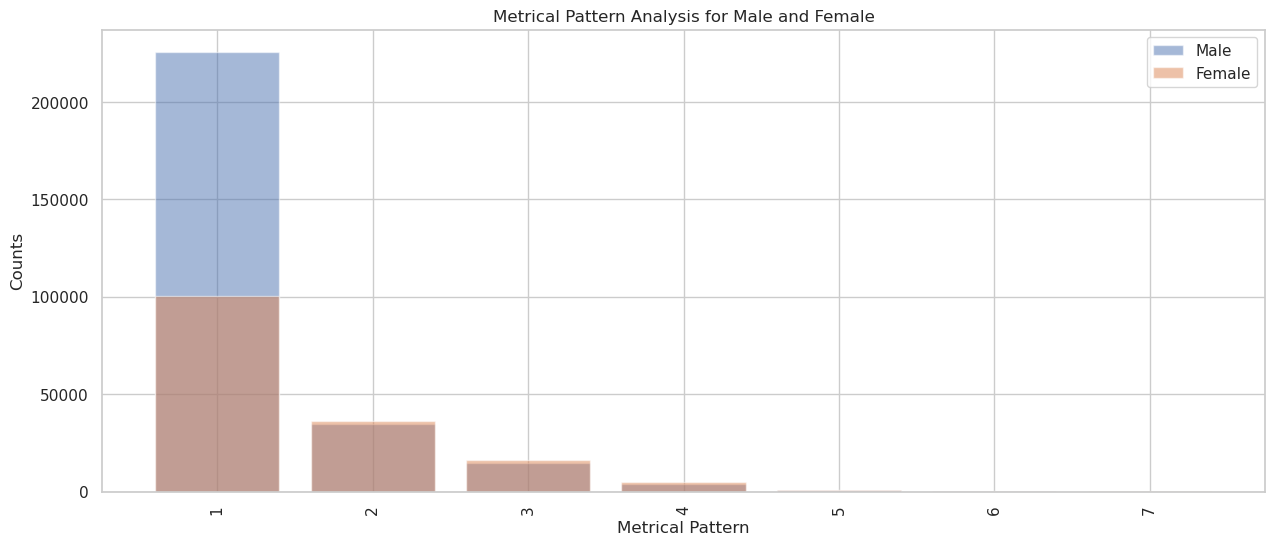

In [16]:
# Paths to the files
file_paths = {
    'Male': [
        '/kaggle/input/19-metrical-patterns/Chinese male Coriolanus metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Chinese male Macbeth metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Chinese male Romeo and Juliet metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/German male Coriolanus metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/German male Macbeth metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/German male Romeo and Juliet metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Italian male Romeo and Juliet metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Spanish male Romeo and Juliet metrical_patterns.txt',
    ],
    'Female': [
        '/kaggle/input/19-metrical-patterns/German female Coriolanus metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/German female Macbeth metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/German female Romeo and Juliet metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Italian female Romeo and Juliet metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Spanish female Romeo and Juliet metrical_patterns.txt',
    ],
}

# Add your file paths
file_paths['Male'] = [
        '/kaggle/input/19-metrical-patterns/Chinese male Coriolanus metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Chinese male Macbeth metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Chinese male Romeo and Juliet metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/German male Coriolanus metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/German male Macbeth metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/German male Romeo and Juliet metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Italian male Romeo and Juliet metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Spanish male Romeo and Juliet metrical_patterns.txt',
]
file_paths['Female'] = [
        '/kaggle/input/19-metrical-patterns/German female Coriolanus metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/German female Macbeth metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/German female Romeo and Juliet metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Italian female Romeo and Juliet metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Spanish female Romeo and Juliet metrical_patterns.txt',
]

# Pattern to extract
pattern = re.compile(r'\d+')

# Function to extract and analyze the metrical patterns
def analyze_patterns():
    results = {'Male': defaultdict(int), 'Female': defaultdict(int)}
    
    for gender, paths in file_paths.items():
        for path in paths:
            with open(path, 'r', encoding='utf-8') as file:
                lines = file.readlines()
                for line in lines:
                    matches = pattern.findall(line)
                    for match in matches:
                        results[gender][match] += 1
    return results

# Function to visualize the data
def visualize_data(data):
    plt.figure(figsize=[15,6])

    combined_labels = set(data['Male'].keys()) | set(data['Female'].keys())
    combined_labels = sorted(list(combined_labels), key=lambda x: int(x))

    for gender, counts in data.items():
        values = [counts[label] for label in combined_labels]
        plt.bar(combined_labels, values, alpha=0.5, label=gender)

    plt.xlabel('Metrical Pattern')
    plt.ylabel('Counts')
    plt.title('Metrical Pattern Analysis for Male and Female')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

# Analyze and visualize the data
data = analyze_patterns()
visualize_data(data)


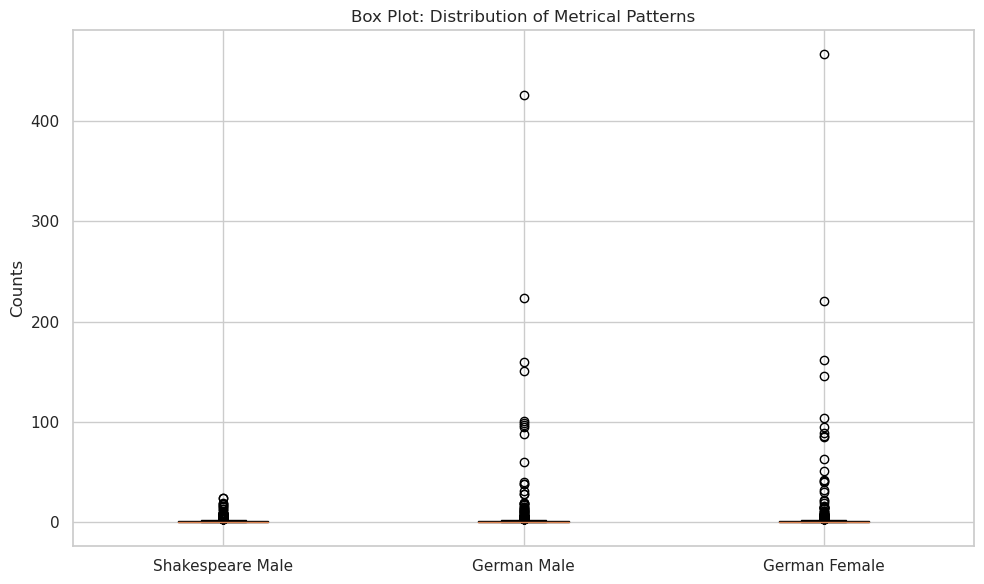

In [29]:
import matplotlib.pyplot as plt

file_paths = {}
file_paths['Shakespeare Male'] = '/kaggle/input/19-metrical-patterns/English male Coriolanus metrical_patterns.txt'
file_paths['German Male'] = '/kaggle/input/19-metrical-patterns/German male Coriolanus metrical_patterns.txt'
file_paths['German Female'] = '/kaggle/input/19-metrical-patterns/German female Coriolanus metrical_patterns.txt'

def read_file(file_path):
    with open(file_path, 'r') as file:
        return file.readlines()

def process_patterns(lines):
    patterns = {}
    for line in lines:
        line = line.strip()
        patterns[line] = patterns.get(line, 0) + 1
    return patterns

def visualize(patterns_dict):
    labels = list(combined_patterns.keys())
    male_counts = [patterns_dict['Shakespeare Male'].get(pattern, 0) for pattern in labels]
    german_male_counts = [patterns_dict['German Male'].get(pattern, 0) for pattern in labels]
    german_female_counts = [patterns_dict['German Female'].get(pattern, 0) for pattern in labels]

    x = range(len(labels))

    # Box Plot
    plt.figure(figsize=(10, 6))
    data = [male_counts, german_male_counts, german_female_counts]
    plt.boxplot(data, vert=True, patch_artist=True, labels=['Shakespeare Male', 'German Male', 'German Female'])
    plt.ylabel('Counts')
    plt.title('Box Plot: Distribution of Metrical Patterns')
    plt.tight_layout()
    plt.show()

combined_patterns = {}
patterns_dict = {}
for key, path in file_paths.items():
    lines = read_file(path)
    patterns = process_patterns(lines)
    patterns_dict[key] = patterns
    for pattern, count in patterns.items():
        combined_patterns[pattern] = combined_patterns.get(pattern, 0) + count

visualize(patterns_dict)


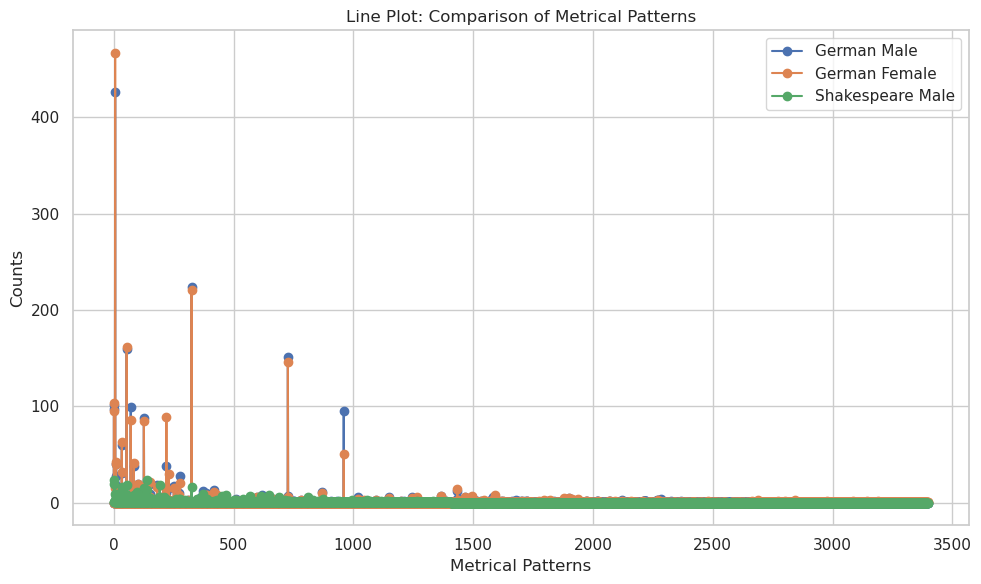

In [23]:
file_paths = {}
file_paths['Shakespeare Male'] = '/kaggle/input/19-metrical-patterns/English male Coriolanus metrical_patterns.txt'
file_paths['German Male'] = '/kaggle/input/19-metrical-patterns/German male Coriolanus metrical_patterns.txt'
file_paths['German Female'] = '/kaggle/input/19-metrical-patterns/German female Coriolanus metrical_patterns.txt'

def read_file(file_path):
    with open(file_path, 'r') as file:
        return file.readlines()

def process_patterns(lines):
    patterns = {}
    for line in lines:
        line = line.strip()
        patterns[line] = patterns.get(line, 0) + 1
    return patterns

combined_patterns = {}
for key, path in file_paths.items():
    lines = read_file(path)
    patterns = process_patterns(lines)
    for pattern, count in patterns.items():
        combined_patterns[pattern] = combined_patterns.get(pattern, 0) + count

labels = list(combined_patterns.keys())
male_counts = [patterns_dict['Shakespeare Male'].get(pattern, 0) for pattern in labels]
german_male_counts = [patterns_dict['German Male'].get(pattern, 0) for pattern in labels]
german_female_counts = [patterns_dict['German Female'].get(pattern, 0) for pattern in labels]

x = range(len(labels))

# 1. Line Plot
plt.figure(figsize=(10, 6))

# Plot German Male first
plt.plot(x, german_male_counts, marker='o', label='German Male')

# Plot German Female second
plt.plot(x, german_female_counts, marker='o', label='German Female')

# Plot Shakespeare Male third
plt.plot(x, male_counts, marker='o', label='Shakespeare Male')

plt.xlabel('Metrical Patterns')
plt.ylabel('Counts')
plt.title('Line Plot: Comparison of Metrical Patterns')
# plt.xticks(x, labels, rotation=45)  # Commented out to remove x-ticks
plt.legend()
plt.tight_layout()
plt.show()


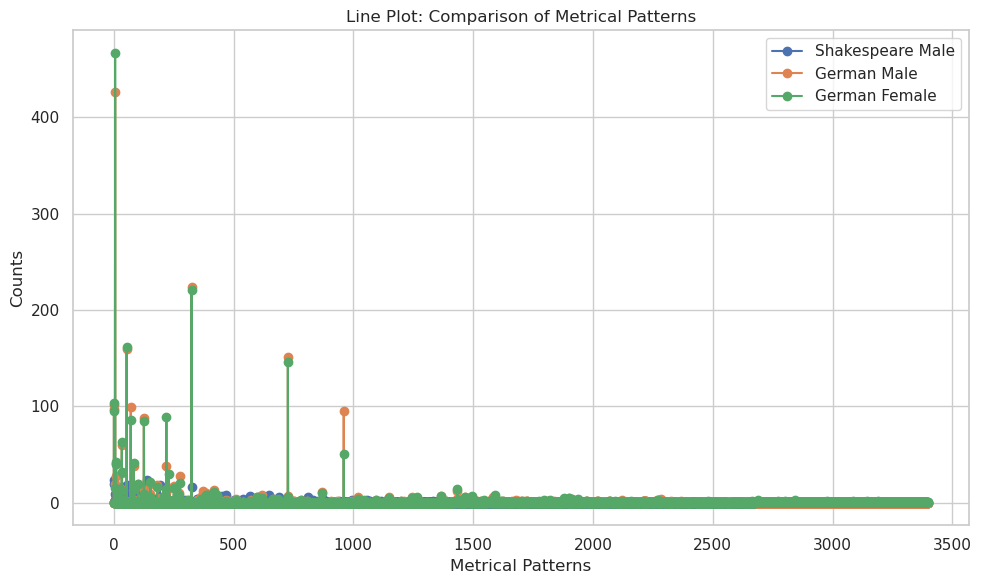

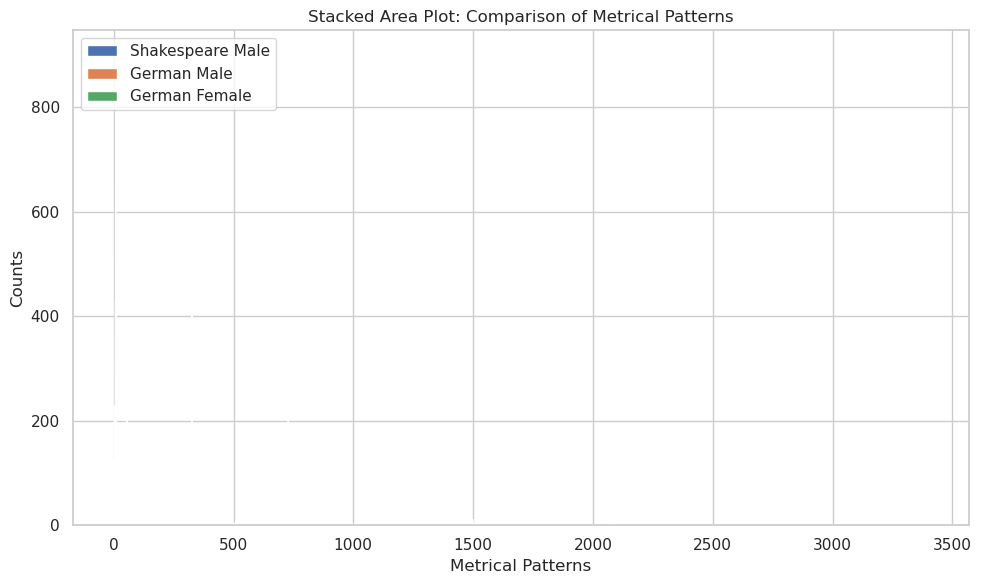

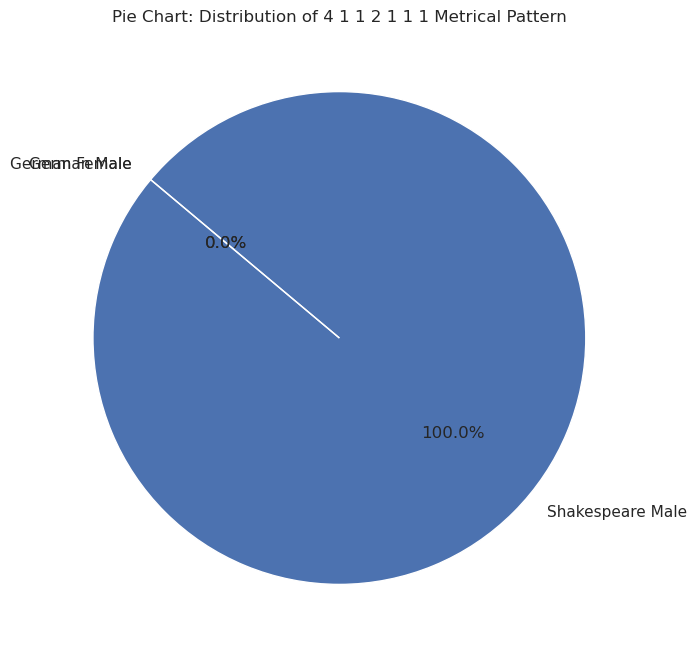

In [21]:
# 1. Line Plot
plt.figure(figsize=(10, 6))

# Plot German Male first
plt.plot(x, german_male_counts, marker='o', label='German Male')

# Plot German Female second
plt.plot(x, german_female_counts, marker='o', label='German Female')

# Plot Shakespeare Male third
plt.plot(x, male_counts, marker='o', label='Shakespeare Male')

plt.xlabel('Metrical Patterns')
plt.ylabel('Counts')
plt.title('Line Plot: Comparison of Metrical Patterns')
# plt.xticks(x, labels, rotation=45)  # Commented out to remove x-ticks
plt.legend()
plt.tight_layout()
plt.show()
# 1. Line Plot
plt.figure(figsize=(10, 6))

# Plot German Male first
plt.plot(x, german_male_counts, marker='o', label='German Male')

# Plot German Female second
plt.plot(x, german_female_counts, marker='o', label='German Female')

# Plot Shakespeare Male third
plt.plot(x, male_counts, marker='o', label='Shakespeare Male')

plt.xlabel('Metrical Patterns')
plt.ylabel('Counts')
plt.title('Line Plot: Comparison of Metrical Patterns')
# plt.xticks(x, labels, rotation=45)  # Commented out to remove x-ticks
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
# Add your file paths

Shakespeare Male : /kaggle/input/19-metrical-patterns/English male Coriolanus metrical_patterns.txt

file_paths['Male'] = [
        '/kaggle/input/19-metrical-patterns/German male Coriolanus metrical_patterns.txt',
      
]
file_paths['Female'] = [
        '/kaggle/input/19-metrical-patterns/German female Coriolanus metrical_patterns.txt',
]


# Pattern to extract
pattern = re.compile(r'\d+')

# Function to extract and analyze the metrical patterns
def analyze_patterns():
    results = {'Male': defaultdict(int), 'Female': defaultdict(int)}
    
    for gender, paths in file_paths.items():
        for path in paths:
            with open(path, 'r', encoding='utf-8') as file:
                lines = file.readlines()
                for line in lines:
                    matches = pattern.findall(line)
                    for match in matches:
                        results[gender][match] += 1
    return results

Reading file: /kaggle/input/19-metrical-patterns/Chinese male Coriolanus metrical_patterns.txt
Found matches: ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']
Found matches: ['1', '1', '1']
Found matches: ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']
Found matches: ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']
Found matches: ['1', '1', '1', '1', '1', '1']
Found matches: ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']
Found matches: ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']
Found matches: ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']
Found matches: ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']
Found matches: ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']
Found matches: ['1', '1', '1',

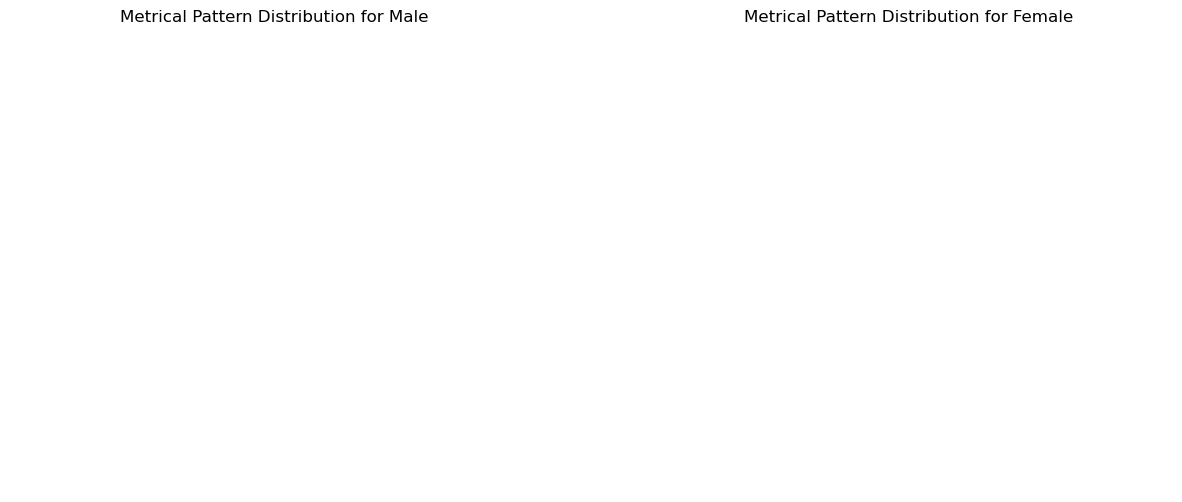

In [1]:
# Paths to the files
file_paths = {
    'Male': [
        '/kaggle/input/19-metrical-patterns/Chinese male Coriolanus metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Chinese male Macbeth metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Chinese male Romeo and Juliet metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/German male Coriolanus metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/German male Macbeth metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/German male Romeo and Juliet metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Italian male Romeo and Juliet metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Spanish male Romeo and Juliet metrical_patterns.txt',
    ],
    'Female': [
        '/kaggle/input/19-metrical-patterns/German female Coriolanus metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/German female Macbeth metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/German female Romeo and Juliet metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Italian female Romeo and Juliet metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Spanish female Romeo and Juliet metrical_patterns.txt',
    ],
}

# Pattern to extract
pattern = re.compile(r'\d+')

# Function to extract and analyze the metrical patterns
def analyze_patterns():
    results = {'Male': {}, 'Female': {}}
    
    for gender, paths in file_paths.items():
        for path in paths:
            print(f"Reading file: {path}") # Debugging print
            with open(path, 'r', encoding='utf-8') as file:
                lines = file.readlines()
                for line in lines:
                    matches = pattern.findall(line)
                    print(f"Found matches: {matches}") # Debugging print
                    for match in matches:
                        if match in results[gender]:
                            results[gender][match] = results[gender].get(match, 0) + 1
                            
            print(f"Results so far for {gender}: {results[gender]}") # Debugging print
    return results

# Function to visualize the data
def visualize_data(data):
    plt.figure(figsize=[15, 6])
    
    for idx, (gender, counts) in enumerate(data.items()):
        plt.subplot(1, 2, idx + 1) # 1 row, 2 columns, index
        labels = list(counts.keys())
        values = [counts[key] for key in labels]

        # Plotting the pie chart
        plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.title(f'Metrical Pattern Distribution for {gender}')

    plt.show() # Moved outside of the loop

# Analyze and visualize the data
data = analyze_patterns()
visualize_data(data)


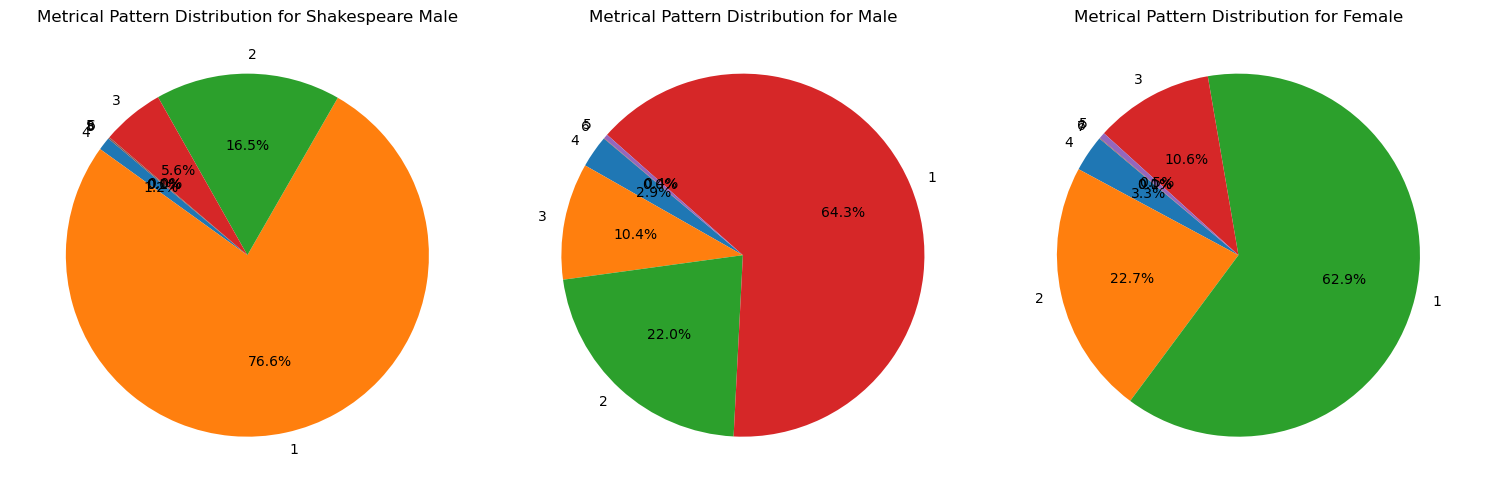

In [7]:
# Paths to the files
file_paths = {
    'Shakespeare Male': [
        '/kaggle/input/19-metrical-patterns/English male Coriolanus metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/English male Macbeth metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/English male Romeo and Juliet metrical_patterns.txt'
    ],
    'Male': [
        '/kaggle/input/19-metrical-patterns/German male Coriolanus metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/German male Macbeth metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Italian male Romeo and Juliet metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Spanish male Romeo and Juliet metrical_patterns.txt',
    ],
    'Female': [
        '/kaggle/input/19-metrical-patterns/German female Coriolanus metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/German female Macbeth metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Italian female Romeo and Juliet metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Spanish female Romeo and Juliet metrical_patterns.txt',
    ],
}

# Pattern to extract
pattern = re.compile(r'\d+')

# Function to extract and analyze the metrical patterns
def analyze_patterns():
    results = {'Shakespeare Male': {}, 'Male': {}, 'Female': {},}  # Initialize with all keys
    
    for gender, paths in file_paths.items():
        for path in paths:
            with open(path, 'r', encoding='utf-8') as file:
                lines = file.readlines()
                for line in lines:
                    matches = pattern.findall(line)
                    for match in matches:
                        if match in results[gender]:
                            results[gender][match] += 1
                        else:
                            results[gender][match] = 1
    return results

# Function to visualize the data
def visualize_data(data):
    fig, axes = plt.subplots(1, len(data), figsize=(15, 5))
    
    for idx, (gender, counts) in enumerate(data.items()):
        labels = list(counts.keys())
        values = [counts[key] for key in labels]

        # Plotting the pie chart
        axes[idx].pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
        axes[idx].set_title(f'Metrical Pattern Distribution for {gender}')
        axes[idx].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.tight_layout()
    plt.show()

# Analyze and visualize the data
data = analyze_patterns()
visualize_data(data)


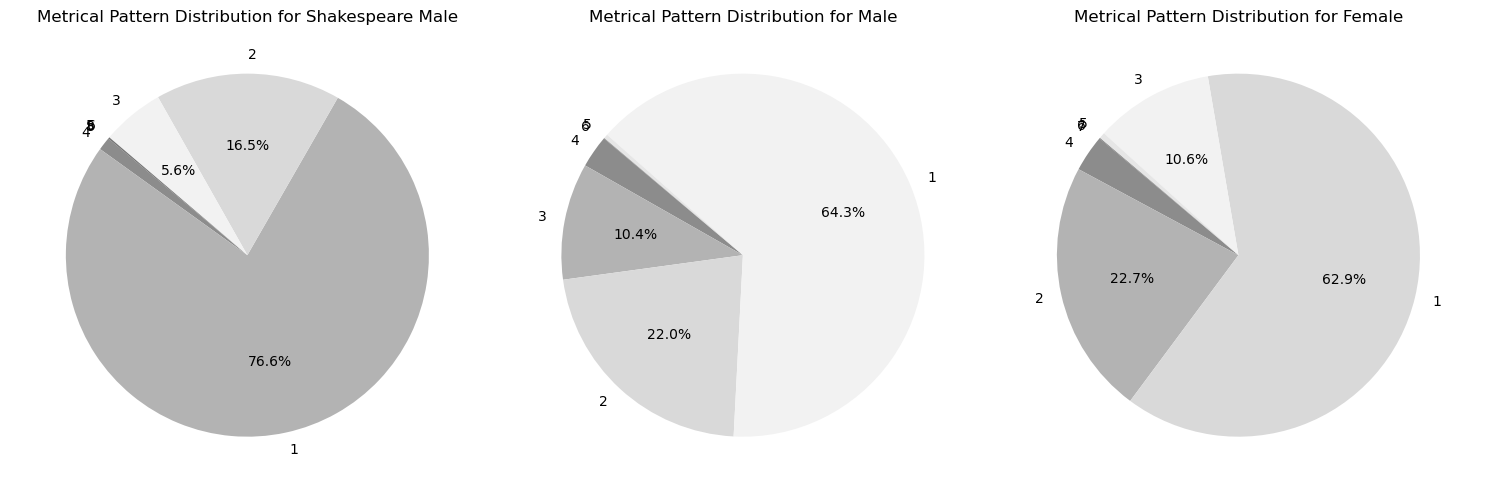

In [14]:
# Function to visualize the data with muted colors
def visualize_data(data):
    fig, axes = plt.subplots(1, len(data), figsize=(15, 5))
    
    # Muted color palette
    colors = ['#8c8c8c', '#b3b3b3', '#d9d9d9', '#f2f2f2', '#e6e6e6', '#737373', '#404040', '#262626']
    
    for idx, (gender, counts) in enumerate(data.items()):
        labels = list(counts.keys())
        values = [counts[key] for key in labels]

        # Plotting the pie chart with muted colors and bigger font size for numbers
        axes[idx].pie(values, labels=labels, autopct=lambda p: '{:.1f}%'.format(p) if p >= 5 else '', startangle=140, colors=colors)
        axes[idx].set_title(f'Metrical Pattern Distribution for {gender}')
        axes[idx].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.tight_layout()
    plt.show()

# Analyze and visualize the data
data = analyze_patterns()
visualize_data(data)


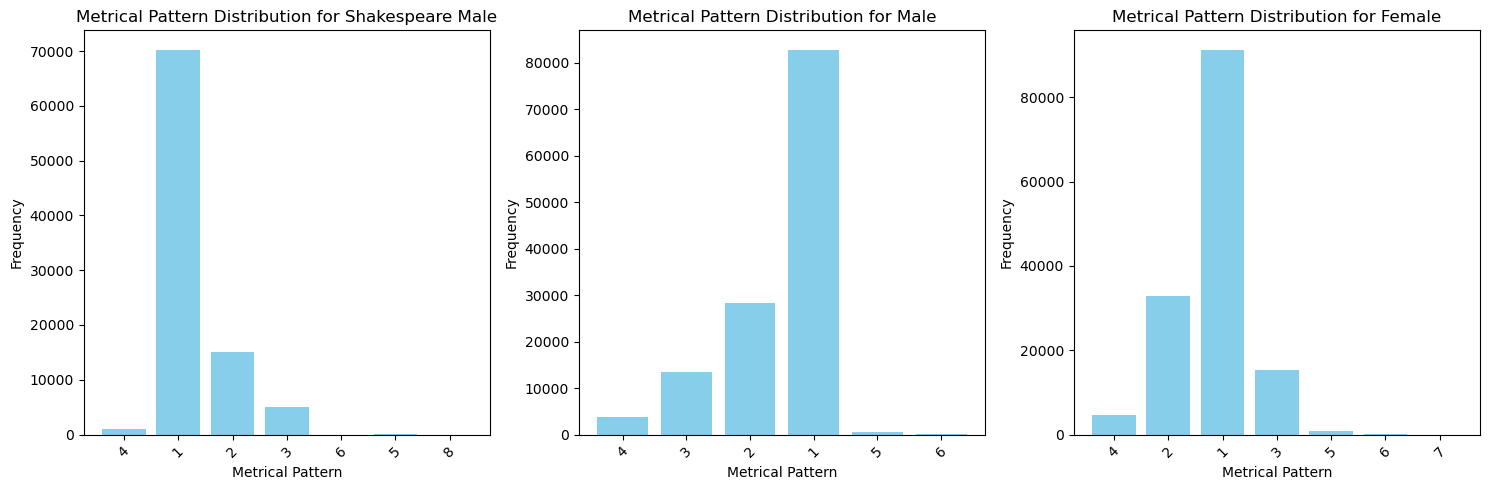

In [9]:
# Function to visualize the data using histograms
def visualize_data_histogram(data):
    fig, axes = plt.subplots(1, len(data), figsize=(15, 5))
    
    for idx, (gender, counts) in enumerate(data.items()):
        labels = list(counts.keys())
        values = [counts[key] for key in labels]

        # Plotting the histogram
        axes[idx].bar(labels, values, color='skyblue')
        axes[idx].set_title(f'Metrical Pattern Distribution for {gender}')
        axes[idx].set_xlabel('Metrical Pattern')
        axes[idx].set_ylabel('Frequency')
        axes[idx].set_xticks(labels)
        axes[idx].set_xticklabels(labels, rotation=45)

    plt.tight_layout()
    plt.show()

# Analyze and visualize the data
data = analyze_patterns()
visualize_data_histogram(data)


In [ ]:
import matplotlib.pyplot as plt
import re

# Paths to the files
file_paths = {
    'Male': [
        '/kaggle/input/19-metrical-patterns/Chinese male Coriolanus metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Chinese male Macbeth metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Chinese male Romeo and Juliet metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/German male Coriolanus metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/German male Macbeth metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/German male Romeo and Juliet metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Italian male Romeo and Juliet metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Spanish male Romeo and Juliet metrical_patterns.txt',
    ],
    'Female': [
        '/kaggle/input/19-metrical-patterns/German female Coriolanus metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/German female Macbeth metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/German female Romeo and Juliet metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Italian female Romeo and Juliet metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Spanish female Romeo and Juliet metrical_patterns.txt',
    ],
}

# Pattern to extract
pattern = re.compile(r'\d+')

# Function to extract and analyze the metrical patterns
def analyze_patterns():
    results = {'Male': {}, 'Female': {},} 
    
    for gender, paths in file_paths.items():
        for path in paths:
            with open(path, 'r', encoding='utf-8') as file:
                lines = file.readlines()
                for line in lines:
                    matches = pattern.findall(line)
                    for match in matches:
                        if match in results[gender]:
                            results[gender][match] += 1
                        else:
                            results[gender][match] = 1
    return results

# Function to visualize the data
def visualize_data(data):
    for gender, counts in data.items():
        labels = list(counts.keys())
        values = [counts[key] for key in labels]

        # Plotting the pie chart
        plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.title(f'Metrical Pattern Distribution for {gender}')
        plt.show()

# Analyze and visualize the data
data = analyze_patterns()
visualize_data(data)


In [ ]:
# Paths to the files
# Paths to the files
file_paths = {
    'Male': [
        '/kaggle/input/19-metrical-patterns/Chinese male Coriolanus metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Chinese male Macbeth metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Chinese male Romeo and Juliet metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/German male Coriolanus metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/German male Macbeth metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/German male Romeo and Juliet metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Italian male Romeo and Juliet metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Spanish male Romeo and Juliet metrical_patterns.txt',
    ],
    'Female': [
        '/kaggle/input/19-metrical-patterns/German female Coriolanus metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/German female Macbeth metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/German female Romeo and Juliet metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Italian female Romeo and Juliet metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Spanish female Romeo and Juliet metrical_patterns.txt',
    ],
    'Male and Female': [
        '/kaggle/input/19-metrical-patterns/Chinese male and female Coriolanus metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Chinese male and female Macbeth metrical_patterns.txt',
        '/kaggle/input/19-metrical-patterns/Chinese male and female Romeo and Juliet metrical_patterns.txt',
    ],
}


# Pattern to extract
pattern = re.compile(r'\d+')

# Function to extract and analyze the metrical patterns
def analyze_patterns():
    results = {'Male': {}, 'Female': {}, 'Male and Female': {}}
    
    for gender, paths in file_paths.items():
        for path in paths:
            with open(path, 'r', encoding='utf-8') as file:
                lines = file.readlines()
                for line in lines:
                    matches = pattern.findall(line)
                    for match in matches:
                        if match in results[gender]:
                            results[gender][match] += 1
                        else:
                            results[gender][match] = 1
    return results

# Function to visualize the data
def visualize_data(data):
    plt.figure(figsize=[15,6])

    for gender, counts in data.items():
        labels = list(counts.keys())
        values = [counts[key] for key in labels]
        plt.bar(labels, values, alpha=0.5, label=gender)
    
    plt.xlabel('Metrical Pattern')
    plt.ylabel('Counts')
    plt.title('Metrical Pattern Analysis')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

# Analyze and visualize the data
data = analyze_patterns()
visualize_data(data)


# 5-MFW

In [ ]:
# List of file paths
file_paths = [
    "/kaggle/input/19-files-with-frequencies/Chinese male Liang Coriolanus.csv",
    "/kaggle/input/19-files-with-frequencies/Chinese male Liang Macbeth.csv",
    "/kaggle/input/19-files-with-frequencies/Chinese male Liang Romeo and Juliet.csv",
    "/kaggle/input/19-files-with-frequencies/Chinese male Zhu Coriolanus.csv",
    "/kaggle/input/19-files-with-frequencies/Chinese male Zhu Macbeth.csv",
    "/kaggle/input/19-files-with-frequencies/Chinese male Zhu Romeo and Juliet.csv",
    "/kaggle/input/19-files-with-frequencies/English male Coriolanus.csv",
    "/kaggle/input/19-files-with-frequencies/English male Macbeth.csv",
    "/kaggle/input/19-files-with-frequencies/English male Romeo and Juliet.csv",
    "/kaggle/input/19-files-with-frequencies/German male Coriolanus.csv",
    "/kaggle/input/19-files-with-frequencies/German male Macbeth.csv",
    "/kaggle/input/19-files-with-frequencies/German male Romeo and Juliet.csv",
    "/kaggle/input/19-files-with-frequencies/Italian male Romeo and Juliet.csv",
    "/kaggle/input/19-files-with-frequencies/Spanish male Romeo and Juliet.csv",
    "/kaggle/input/19-files-with-frequencies/German female Coriolanus.csv",
    "/kaggle/input/19-files-with-frequencies/German female Macbeth.csv",
    "/kaggle/input/19-files-with-frequencies/German female Romeo and Juliet.csv",
    "/kaggle/input/19-files-with-frequencies/Italian female Romeo and Juliet.csv",
    "/kaggle/input/19-files-with-frequencies/Spanish female Romeo and Juliet.csv"
]

# Dictionary to hold top 5 most frequent words for each file
top_5_words = {}

for file in file_paths:
    # Read the CSV file
    df = pd.read_csv(file)

    # Ensure the dataframe is sorted by frequency (assuming descending order where top freq is first)
    df = df.sort_values(by='freq', ascending=False)

    # Extract top 5 words
    top_5 = df.head(5)
    
    # Save to dictionary using file name as key
    top_5_words[file] = top_5

# To access the top 5 words of a particular file, you can use:
# top_5_words["/kaggle/input/19-files-with-frequencies/Chinese male Liang Coriolanus.csv"]


# 100-MFW

In [ ]:
# List of file paths
file_paths = [
    "/kaggle/input/19-files-with-frequencies/Chinese male Liang Coriolanus.csv",
    "/kaggle/input/19-files-with-frequencies/Chinese male Liang Macbeth.csv",
    "/kaggle/input/19-files-with-frequencies/Chinese male Liang Romeo and Juliet.csv",
    "/kaggle/input/19-files-with-frequencies/Chinese male Zhu Coriolanus.csv",
    "/kaggle/input/19-files-with-frequencies/Chinese male Zhu Macbeth.csv",
    "/kaggle/input/19-files-with-frequencies/Chinese male Zhu Romeo and Juliet.csv",
    "/kaggle/input/19-files-with-frequencies/English male Coriolanus.csv",
    "/kaggle/input/19-files-with-frequencies/English male Macbeth.csv",
    "/kaggle/input/19-files-with-frequencies/English male Romeo and Juliet.csv",
    "/kaggle/input/19-files-with-frequencies/German male Coriolanus.csv",
    "/kaggle/input/19-files-with-frequencies/German male Macbeth.csv",
    "/kaggle/input/19-files-with-frequencies/German male Romeo and Juliet.csv",
    "/kaggle/input/19-files-with-frequencies/Italian male Romeo and Juliet.csv",
    "/kaggle/input/19-files-with-frequencies/Spanish male Romeo and Juliet.csv",
    "/kaggle/input/19-files-with-frequencies/German female Coriolanus.csv",
    "/kaggle/input/19-files-with-frequencies/German female Macbeth.csv",
    "/kaggle/input/19-files-with-frequencies/German female Romeo and Juliet.csv",
    "/kaggle/input/19-files-with-frequencies/Italian female Romeo and Juliet.csv",
    "/kaggle/input/19-files-with-frequencies/Spanish female Romeo and Juliet.csv"
]

# Dictionary to hold top 100 most frequent words for each file
top_100_words = {}

for file in file_paths:
    # Read the CSV file
    df = pd.read_csv(file)

    # Ensure the dataframe is sorted by frequency (assuming descending order where top freq is first)
    df = df.sort_values(by='freq', ascending=False)

    # Extract top 100 words
    top_100 = df.head(100)
    
    # Save to dictionary using file name as key
    top_100_words[file] = top_100

# To access the top 100 words of a particular file, you can use:
# top_100_words["/kaggle/input/19-files-with-frequencies/Chinese male Liang Coriolanus.csv"]


In [ ]:
# Extracting word frequencies for Spanish male files
female_romeo = top_5_words["/kaggle/input/19-files-with-frequencies/Spanish female Romeo and Juliet.csv"]

# Extracting word frequencies for Spanish female files
male_romeo = top_5_words["/kaggle/input/19-files-with-frequencies/Spanish male Romeo and Juliet.csv"]

# Download necessary NLTK data
nltk.download('punkt')

# Define the corpus directory and file name
corpus_dir = "/kaggle/input/gender-difference/"
file = "German female Coriolanus.txt"

# Load the text file
with open(corpus_dir + file, 'r', encoding='utf-8') as f:
    raw_corpus = f.readlines()



# Create a term-document matrix using Scikit-learn
vectorizer = CountVectorizer()
tdm = vectorizer.fit_transform(preprocessed_corpus)

# tdm is now a sparse matrix representing the term-document matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Number of components to keep (for example, 2 for 2D visualization)
n_components = 2

# Apply PCA to the term-document matrix
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(tdm.toarray())

# Plot the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1])

# Adding labels, title, and grid for better visualization
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of German Female Coriolanus Text')
plt.grid(True)
plt.show()

# Spanish

In [ ]:


# Assuming top_5_words is already populated

# Extracting word frequencies for Spanish male files
female_romeo = top_5_words["/kaggle/input/19-files-with-frequencies/Spanish female Romeo and Juliet.csv"]

# Extracting word frequencies for Spanish female files
male_romeo = top_5_words["/kaggle/input/19-files-with-frequencies/Spanish male Romeo and Juliet.csv"]

# Visualization
plt.figure(figsize=(15, 5))

plt.scatter(female_romeo['word'], male_romeo['freq'], marker='o', label='Female Romeo and Juliet', s=100)

plt.scatter(male_romeo['word'], female_romeo['freq'], marker='^', label='Male Romeo and Juliet', s=100)

plt.title("5-MFW Stylometric Analysis of Spanish Translations")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

In [ ]:
# Assuming top_100_words is already populated

# Extracting word frequencies for Spanish male files
female_romeo = top_100_words["/kaggle/input/19-files-with-frequencies/Spanish female Romeo and Juliet.csv"]

# Extracting word frequencies for Spanish female files
male_romeo = top_100_words["/kaggle/input/19-files-with-frequencies/Spanish male Romeo and Juliet.csv"]

# Visualization
plt.figure(figsize=(15, 5))

plt.scatter(female_romeo['word'], male_romeo['freq'], marker='o', label='Female Romeo and Juliet', s=100)

plt.scatter(male_romeo['word'], female_romeo['freq'], marker='^', label='Male Romeo and Juliet', s=100)

plt.title("100-MFW Stylometric Analysis of Spanish Translations")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

# Italian

In [ ]:
# Assuming top_5_words is already populated

# Extracting word frequencies for Italian male files
female_romeo = top_5_words["/kaggle/input/19-files-with-frequencies/Italian female Romeo and Juliet.csv"]

# Extracting word frequencies for Italian female files
male_romeo = top_5_words["/kaggle/input/19-files-with-frequencies/Italian male Romeo and Juliet.csv"]

# Visualization
plt.figure(figsize=(15, 5))

plt.scatter(female_romeo['word'], male_romeo['freq'], marker='o', label='Female Romeo and Juliet', s=100)

plt.scatter(male_romeo['word'], female_romeo['freq'], marker='^', label='Male Romeo and Juliet', s=100)

plt.title("5-MFW Stylometric Analysis of Italian Translations")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

In [ ]:
# Assuming top_100_words is already populated

# Extracting word frequencies for Italian male files
female_romeo = top_100_words["/kaggle/input/19-files-with-frequencies/Italian female Romeo and Juliet.csv"]

# Extracting word frequencies for Italian female files
male_romeo = top_100_words["/kaggle/input/19-files-with-frequencies/Italian male Romeo and Juliet.csv"]

# Visualization
plt.figure(figsize=(15, 5))

plt.scatter(female_romeo['word'], male_romeo['freq'], marker='o', label='Female Romeo and Juliet', s=100)

plt.scatter(male_romeo['word'], female_romeo['freq'], marker='^', label='Male Romeo and Juliet', s=100)

plt.title("100-MFW Stylometric Analysis of Italian Translations")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

# German

In [ ]:

# Assuming top_5_words is already populated

# Extracting word frequencies for German male files
female_coriolanus = top_5_words["/kaggle/input/19-files-with-frequencies/German female Coriolanus.csv"]
female_macbeth = top_5_words["/kaggle/input/19-files-with-frequencies/German female Macbeth.csv"]
female_romeo = top_5_words["/kaggle/input/19-files-with-frequencies/German female Romeo and Juliet.csv"]

# Extracting word frequencies for German female files

male_coriolanus = top_5_words["/kaggle/input/19-files-with-frequencies/German male Coriolanus.csv"]
male_macbeth = top_5_words["/kaggle/input/19-files-with-frequencies/German male Macbeth.csv"]
male_romeo = top_5_words["/kaggle/input/19-files-with-frequencies/German male Romeo and Juliet.csv"]

# Visualization
plt.figure(figsize=(15, 5))

plt.scatter(female_coriolanus['word'], male_coriolanus['freq'], marker='o', label='Female Coriolanus', s=100)
plt.scatter(female_macbeth['word'], male_macbeth['freq'], marker='o', label='Female Macbeth', s=100)
plt.scatter(female_romeo['word'], male_romeo['freq'], marker='o', label='Female Romeo and Juliet', s=100)

plt.scatter(male_coriolanus['word'], female_coriolanus['freq'], marker='^', label='Male Coriolanus', s=100)
plt.scatter(male_macbeth['word'], female_macbeth['freq'], marker='^', label='Male Macbeth', s=100)
plt.scatter(male_romeo['word'], female_romeo['freq'], marker='^', label='Male Romeo and Juliet', s=100)

plt.title("Stylometric Analysis of German Translations")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

In [ ]:
 male_coriolanus = top_5_words["/kaggle/input/19-files-with-frequencies/English male Coriolanus.csv"]

# Assuming top_5_words is already populated

# Extracting word frequencies for German male files
female_coriolanus = top_5_words["/kaggle/input/19-files-with-frequencies/German female Coriolanus.csv"]


# Extracting word frequencies for German female files

male_coriolanus = top_5_words["/kaggle/input/19-files-with-frequencies/German male Coriolanus.csv"]


# Visualization
plt.figure(figsize=(15, 5))

plt.scatter(female_coriolanus['word'], male_coriolanus['freq'], marker='o', label='Female Coriolanus', s=100)


plt.scatter(male_coriolanus['word'], female_coriolanus['freq'], marker='^', label='Male Coriolanus', s=100)


plt.title("5-MFW Stylometric Analysis of German Translations")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

In [ ]:
# Assuming top_5_words is already populated

# Extracting word frequencies for German male and female files
female_coriolanus = pd.read_csv("/kaggle/input/19-files-with-frequencies/German female Coriolanus.csv")
male_coriolanus = pd.read_csv("/kaggle/input/19-files-with-frequencies/German male Coriolanus.csv")

# Combine the female and male data
combined_data = pd.concat([female_coriolanus['freq'], male_coriolanus['freq']], axis=1)
combined_data.columns = ['Female', 'Male']

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(combined_data)

# Separate the principal components for female and male texts
female_components = principal_components[:5]
male_components = principal_components[5:]

# Plot the principal components for female and male texts
plt.figure(figsize=(10, 8))
plt.scatter(female_components[:, 0], female_components[:, 1], label="Female Coriolanus", marker='o')
plt.scatter(male_components[:, 0], male_components[:, 1], label="Male Coriolanus", marker='^')

# Adding labels, title, and grid for better visualization
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of German Coriolanus 5-MFW (Female and Male)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Load word frequencies for German male and female files
female_coriolanus = pd.read_csv("/kaggle/input/19-files-with-frequencies/German female Coriolanus.csv")
male_coriolanus = pd.read_csv("/kaggle/input/19-files-with-frequencies/German male Coriolanus.csv")

# Merge the female and male data on the 'word' column
combined_data = pd.merge(female_coriolanus, male_coriolanus, on='word', suffixes=('_female', '_male'))

# Select the frequencies
combined_frequencies = combined_data[['freq_female', 'freq_male']]

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(combined_frequencies)

# Separate the principal components for female and male texts
female_components = principal_components[:5]
male_components = principal_components[5:]

# Plot the principal components for female and male texts
plt.figure(figsize=(10, 8))
plt.scatter(female_components[:, 0], female_components[:, 1], label="Female Coriolanus", marker='o')
plt.scatter(male_components[:, 0], male_components[:, 1], label="Male Coriolanus", marker='^')

# Adding labels, title, and grid for better visualization
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of German Coriolanus 5-MFW (Female and Male)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Load word frequencies for German male and female files
female_coriolanus = pd.read_csv("/kaggle/input/19-files-with-frequencies/German female Coriolanus.csv")
male_coriolanus = pd.read_csv("/kaggle/input/19-files-with-frequencies/German male Coriolanus.csv")

# Merge the female and male data on the 'word' column
combined_data = pd.merge(female_coriolanus, male_coriolanus, on='word', suffixes=('_female', '_male'))

# Select the frequencies
combined_frequencies = combined_data[['freq_female', 'freq_male']]

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(combined_frequencies)

# Plot the principal components for male texts (first)
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=combined_data['freq_male'], label="Male Coriolanus", marker='^', cmap='Blues')

# Plot the principal components for female texts (next)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=combined_data['freq_female'], label="Female Coriolanus", marker='o', cmap='Reds', alpha=0.5)

# Adding labels, title, and grid for better visualization
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of German Coriolanus 5-MFW (Male and Female)')
plt.legend()
plt.grid(True)
plt.colorbar(label='Frequency')
plt.show()


In [ ]:
# Load word frequencies for German male and female files
female_coriolanus = pd.read_csv("/kaggle/input/19-files-with-frequencies/German female Coriolanus.csv")
male_coriolanus = pd.read_csv("/kaggle/input/19-files-with-frequencies/German male Coriolanus.csv")

# Selecting only the top 100 most frequent words (MFW) for both male and female data
top_100_female_coriolanus = female_coriolanus.nlargest(100, 'freq')
top_100_male_coriolanus = male_coriolanus.nlargest(100, 'freq')

# Merge the female and male data on the 'word' column
combined_data = pd.merge(top_100_female_coriolanus, top_100_male_coriolanus, on='word', suffixes=('_female', '_male'))

# Select the frequencies
combined_frequencies = combined_data[['freq_female', 'freq_male']]

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(combined_frequencies)

# Plot the principal components for male texts (first)
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c='blue', label="Male Coriolanus", marker='^', s=100)

# Plot the principal components for female texts (next)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c='gold', label="Female Coriolanus", marker='o', s=50, alpha=0.7)

# Adding labels, title, and grid for better visualization
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of German Coriolanus 100-MFW (Male and Female)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Load word frequencies for German male and female files
female_coriolanus = pd.read_csv("/kaggle/input/19-files-with-frequencies/German female Coriolanus.csv")
male_coriolanus = pd.read_csv("/kaggle/input/19-files-with-frequencies/German male Coriolanus.csv")

# Selecting only the top 100 most frequent words (MFW) for both male and female data
top_100_female_coriolanus = female_coriolanus.nlargest(100, 'freq')
top_100_male_coriolanus = male_coriolanus.nlargest(100, 'freq')

# Merge the female and male data on the 'word' column
combined_data = pd.merge(top_100_female_coriolanus, top_100_male_coriolanus, on='word', suffixes=('_female', '_male'))

# Select the frequencies
combined_frequencies = combined_data[['freq_female', 'freq_male']]

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(combined_frequencies)

# Create a color scale based on the sum of the female and male frequencies
color_scale = combined_data['freq_female'] + combined_data['freq_male']

# Plot the principal components for male texts (first)
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=color_scale, cmap='viridis', marker='o', s=50, alpha=0.7, edgecolors='w')

# Adding labels, title, and grid for better visualization
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of German Coriolanus 100-MFW')
plt.colorbar(label='Frequency')
plt.grid(True)
plt.show()


In [ ]:
# Load word frequencies for German male and female files
female_coriolanus = pd.read_csv("/kaggle/input/19-files-with-frequencies/German female Coriolanus.csv")
male_coriolanus = pd.read_csv("/kaggle/input/19-files-with-frequencies/German male Coriolanus.csv")

# Merge the female and male data on the 'word' column
combined_data = pd.merge(male_coriolanus, female_coriolanus, on='word', suffixes=('_male', '_female'))

# Select the frequencies
combined_frequencies = combined_data[['freq_male', 'freq_female']]

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(combined_frequencies)

# Plot the principal components for male and female texts
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], label="Coriolanus (Male and Female)", marker='o')

# Adding labels, title, and grid for better visualization
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of German Coriolanus (Male and Female)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Read word frequencies from the CSV files
female_coriolanus = pd.read_csv("/kaggle/input/19-files-with-frequencies/German female Coriolanus.csv")
male_coriolanus = pd.read_csv("/kaggle/input/19-files-with-frequencies/German male Coriolanus.csv")

# Selecting top 100 most frequent words
female_coriolanus = female_coriolanus.nlargest(100, 'freq')
male_coriolanus = male_coriolanus.nlargest(100, 'freq')

# Visualization
plt.figure(figsize=(15, 5))

plt.scatter(female_coriolanus['word'], female_coriolanus['freq'], marker='o', label='Female Coriolanus', s=80)
plt.scatter(male_coriolanus['word'], male_coriolanus['freq'], marker='^', label='Male Coriolanus', s=80)

plt.title("100-MFW Stylometric Analysis of German Translations")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45, fontsize=9)  # Reduce fontsize for x-axis labels
plt.legend()
plt.grid()  # Added grid to the plot
plt.tight_layout()

plt.show()


In [ ]:
# Read word frequencies from the CSV files
female_coriolanus = pd.read_csv("/kaggle/input/19-files-with-frequencies/German female Coriolanus.csv")
male_coriolanus = pd.read_csv("/kaggle/input/19-files-with-frequencies/German male Coriolanus.csv")

# Selecting top 100 most frequent words
female_coriolanus = female_coriolanus.nlargest(100, 'freq')
male_coriolanus = male_coriolanus.nlargest(100, 'freq')

# Visualization
plt.figure(figsize=(15, 5))

plt.scatter(female_coriolanus['word'], female_coriolanus['freq'], marker='o', label='Female Coriolanus', s=80)
plt.scatter(male_coriolanus['word'], male_coriolanus['freq'], marker='^', label='Male Coriolanus', s=80)

plt.title("100-MFW Stylometric Analysis of German Translations")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45, fontsize=8)  # Reduced fontsize for x-axis labels to make them smaller
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer dashed grid lines
plt.tight_layout()

plt.show()


In [ ]:
# Assuming top_5_words is already populated

# Extracting word frequencies for German female files
female_coriolanus = top_5_words["/kaggle/input/19-files-with-frequencies/German female Coriolanus.csv"]

# Extracting word frequencies for German male files
male_coriolanus_german = top_5_words["/kaggle/input/19-files-with-frequencies/German male Coriolanus.csv"]

# Extracting word frequencies for English male files
male_coriolanus_english = top_5_words["/kaggle/input/19-files-with-frequencies/English male Coriolanus.csv"]

# Visualization
plt.figure(figsize=(15, 5))

# Scatter plot for German Female vs. German Male
plt.scatter(female_coriolanus['word'], male_coriolanus_german['freq'], 
            marker='o', color='blue', label='German Female vs. German Male', s=100)

# Scatter plot for German Male vs. German Female
plt.scatter(male_coriolanus_german['word'], female_coriolanus['freq'], 
            marker='^', color='green', label='German Male vs. German Female', s=100)

# Scatter plot for English Male vs. German Female
plt.scatter(female_coriolanus['word'], male_coriolanus_english['freq'], 
            marker='^', color='red', label='English Male vs. German Female', s=100)

plt.title("Stylometric Analysis of German and English Translations")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


In [ ]:
# Assuming top_5_words is already populated

# Extracting word frequencies for German male files
female_macbeth = top_5_words["/kaggle/input/19-files-with-frequencies/German female Macbeth.csv"]

# Extracting word frequencies for German female files

male_macbeth = top_5_words["/kaggle/input/19-files-with-frequencies/German male Macbeth.csv"]


# Visualization
plt.figure(figsize=(15, 5))


plt.scatter(female_macbeth['word'], male_macbeth['freq'], marker='o', label='Female Macbeth', s=100)



plt.scatter(male_macbeth['word'], female_macbeth['freq'], marker='^', label='Male Macbeth', s=100)


plt.title("Stylometric Analysis of German Translations")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

In [ ]:
# Extracting word frequencies for German male files

female_romeo = top_5_words["/kaggle/input/19-files-with-frequencies/German female Romeo and Juliet.csv"]

# Extracting word frequencies for German female files

male_romeo = top_5_words["/kaggle/input/19-files-with-frequencies/German male Romeo and Juliet.csv"]

# Visualization
plt.figure(figsize=(15, 5))


plt.scatter(female_romeo['word'], male_romeo['freq'], marker='o', label='Female Romeo and Juliet', s=100)


plt.scatter(male_romeo['word'], female_romeo['freq'], marker='^', label='Male Romeo and Juliet', s=100)

plt.title("Stylometric Analysis of German Translations")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

# Chinese

In [ ]:
# Extracting word frequencies for Chinese female and male files
female_male_coriolanus = top_5_words["/kaggle/input/19-files-with-frequencies/Chinese male Zhu Coriolanus.csv"]
female_male_macbeth = top_5_words["/kaggle/input/19-files-with-frequencies/Chinese male Zhu Macbeth.csv"]
female_male_romeo = top_5_words["/kaggle/input/19-files-with-frequencies/Chinese male Zhu Romeo and Juliet.csv"]

# Extracting word frequencies for Chinese male files
male_coriolanus = top_5_words["/kaggle/input/19-files-with-frequencies/Chinese male Liang Coriolanus.csv"]
male_macbeth = top_5_words["/kaggle/input/19-files-with-frequencies/Chinese male Liang Macbeth.csv"]
male_romeo = top_5_words["/kaggle/input/19-files-with-frequencies/Chinese male Liang Romeo and Juliet.csv"]

# Visualization
plt.figure(figsize=(15, 5))

# Plotting scatter plots
datasets = [female_male_coriolanus, female_male_macbeth, female_male_romeo, male_coriolanus, male_macbeth, male_romeo]
labels = ['Female_Male Coriolanus', 'Female_Male Macbeth', 'Female_Male Romeo and Juliet', 'Male Coriolanus', 'Male Macbeth', 'Male Romeo and Juliet']
markers = ['o', 'o', 'o', '^', '^', '^']

for dataset, label, marker in zip(datasets, labels, markers):
    plt.scatter(dataset['word'], dataset['freq'], marker=marker, label=label, s=100)

# Adding a thin grey dotted line between male and female_male
for word in female_male_coriolanus['word']:
    if word in male_coriolanus['word'].values:
        y1 = female_male_coriolanus[female_male_coriolanus['word'] == word]['freq'].values[0]
        y2 = male_coriolanus[male_coriolanus['word'] == word]['freq'].values[0]
        plt.plot([word, word], [y1, y2], 'grey', linestyle='dotted', linewidth=0.5)

plt.title("5-MFW Stylometric Analysis of Chinese Translations")
plt.xlabel("Words", labelpad=10)
plt.ylabel("Frequency")
plt.xticks([])  # Hide x-axis labels
plt.legend()
plt.tight_layout()

plt.show()


In [ ]:
# Extracting word frequencies for Chinese female and male files
female_male_coriolanus = top_100_words["/kaggle/input/19-files-with-frequencies/Chinese male Zhu Coriolanus.csv"]
female_male_macbeth = top_100_words["/kaggle/input/19-files-with-frequencies/Chinese male Zhu Macbeth.csv"]
female_male_romeo = top_100_words["/kaggle/input/19-files-with-frequencies/Chinese male Zhu Romeo and Juliet.csv"]

# Extracting word frequencies for Chinese male files
male_coriolanus = top_100_words["/kaggle/input/19-files-with-frequencies/Chinese male Liang Coriolanus.csv"]
male_macbeth = top_100_words["/kaggle/input/19-files-with-frequencies/Chinese male Liang Macbeth.csv"]
male_romeo = top_100_words["/kaggle/input/19-files-with-frequencies/Chinese male Liang Romeo and Juliet.csv"]

# Visualization
plt.figure(figsize=(15, 5))

# Plotting scatter plots
datasets = [female_male_coriolanus, female_male_macbeth, female_male_romeo, male_coriolanus, male_macbeth, male_romeo]
labels = ['Female_Male Coriolanus', 'Female_Male Macbeth', 'Female_Male Romeo and Juliet', 'Male Coriolanus', 'Male Macbeth', 'Male Romeo and Juliet']
markers = ['o', 'o', 'o', '^', '^', '^']

for dataset, label, marker in zip(datasets, labels, markers):
    plt.scatter(dataset['word'], dataset['freq'], marker=marker, label=label, s=30)

# Adding a thin grey dotted line between male and female_male
for word in female_male_coriolanus['word']:
    if word in male_coriolanus['word'].values:
        y1 = female_male_coriolanus[female_male_coriolanus['word'] == word]['freq'].values[0]
        y2 = male_coriolanus[male_coriolanus['word'] == word]['freq'].values[0]
        plt.plot([word, word], [y1, y2], 'grey', linestyle='dotted', linewidth=0.5)

plt.title("100-MFW Stylometric Analysis of Chinese Translations")
plt.xlabel("Words", labelpad=10)
plt.ylabel("Frequency")
plt.xticks([])  # Hide x-axis labels
plt.legend()
plt.tight_layout()

plt.show()

In [ ]:
# List of files for males and females
female_files = [
"/kaggle/input/19-files-with-frequencies/Chinese male Liang Coriolanus.csv",
"/kaggle/input/19-files-with-frequencies/Chinese male Liang Macbeth.csv",
"/kaggle/input/19-files-with-frequencies/Chinese male Liang Romeo and Juliet.csv",
"/kaggle/input/19-files-with-frequencies/Chinese male Zhu Coriolanus.csv",
"/kaggle/input/19-files-with-frequencies/Chinese male Zhu Macbeth.csv",
"/kaggle/input/19-files-with-frequencies/Chinese male Zhu Romeo and Juliet.csv",
"/kaggle/input/19-files-with-frequencies/English male Coriolanus.csv",
"/kaggle/input/19-files-with-frequencies/English male Macbeth.csv",
"/kaggle/input/19-files-with-frequencies/English male Romeo and Juliet.csv",
"/kaggle/input/19-files-with-frequencies/German male Coriolanus.csv",
"/kaggle/input/19-files-with-frequencies/German male Macbeth.csv",
"/kaggle/input/19-files-with-frequencies/German male Romeo and Juliet.csv",
"/kaggle/input/19-files-with-frequencies/Italian male Romeo and Juliet.csv",
"/kaggle/input/19-files-with-frequencies/Spanish male Romeo and Juliet.csv"
]

male_files = [
"/kaggle/input/19-files-with-frequencies/German female Coriolanus.csv",
"/kaggle/input/19-files-with-frequencies/German female Macbeth.csv",
"/kaggle/input/19-files-with-frequencies/German female Romeo and Juliet.csv",
"/kaggle/input/19-files-with-frequencies/Italian female Romeo and Juliet.csv",
"/kaggle/input/19-files-with-frequencies/Spanish female Romeo and Juliet.csv"
]

# Assuming top_100_words dictionary is already populated from previous code
all_words = set()
for key, df in top_100_words.items():
    all_words.update(df['word'])

matrix = []
for key, df in top_100_words.items():
    row = [df[df['word'] == word]['freq'].values[0] if word in df['word'].values else 0 for word in all_words]
    matrix.append(row)

df_matrix = pd.DataFrame(matrix, columns=list(all_words), index=top_100_words.keys())

# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_matrix)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=top_100_words.keys())

# Visualization: Symbol by gender
symbols = []
labels = []

for index in principal_df.index:
    if index in male_files:
        symbols.append('o')
    elif index in female_files:
        symbols.append('x')

    # Abbreviating the labels
    abbreviated_label = index.split('/')[-1].replace(".csv", "")
    labels.append(abbreviated_label)

plt.figure(figsize=(10, 8))
for idx, row in principal_df.iterrows():
    label = labels.pop(0)
    plt.scatter(row['PC1'], row['PC2'], marker=symbols.pop(0), label=label)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Translators')
plt.legend(loc='best', fontsize='small', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [ ]:
# Assume top_5_words dictionary is already populated from previous code

# Constructing a frequency matrix
all_words = set()
for key, df in top_5_words.items():
    all_words.update(df['word'])
    
matrix = []
for key, df in top_5_words.items():
    row = [df[df['word'] == word]['freq'].values[0] if word in df['word'].values else 0 for word in all_words]
    matrix.append(row)

# Create a DataFrame from the matrix
df_matrix = pd.DataFrame(matrix, columns=list(all_words), index=top_5_words.keys())

# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_matrix)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=top_100_words.keys())

# Visualization: Color by language/origin, Symbol by gender
color_map = {
    "Chinese": 'blue',
    "English": 'green',
    "German": 'red',
    "Italian": 'yellow',
    "Spanish": 'purple'
}
colors = []
symbols = []
labels = []

for index in principal_df.index:
    for lang, col in color_map.items():
        if lang in index:
            colors.append(col)
            break
    else:
        colors.append('black')  # Default color for unidentified languages

    if "male" in index:
        symbols.append('o')
    elif "female" in index:
        symbols.append('x')
    else:
        symbols.append('s')  # Default symbol for unidentified genders

    # Abbreviating the labels
    abbreviated_label = index.split('/')[-1].replace(".csv", "")
    labels.append(abbreviated_label)

plt.figure(figsize=(10, 8))
for idx, row in principal_df.iterrows():
    label = labels.pop(0)
    plt.scatter(row['PC1'], row['PC2'], color=colors.pop(0), marker=symbols.pop(0), label=label)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Translators')
plt.legend(loc='best', fontsize='small', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [ ]:
# Assume top_100_words dictionary is already populated from previous code

# Constructing a frequency matrix
all_words = set()
for key, df in top_100_words.items():
    all_words.update(df['word'])
    
matrix = []
for key, df in top_100_words.items():
    row = [df[df['word'] == word]['freq'].values[0] if word in df['word'].values else 0 for word in all_words]
    matrix.append(row)

# Create a DataFrame from the matrix
df_matrix = pd.DataFrame(matrix, columns=list(all_words), index=top_100_words.keys())

# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_matrix)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=top_100_words.keys())

# Visualization: Color by language/origin, Symbol by gender
color_map = {
    "Chinese": 'blue',
    "English": 'green',
    "German": 'red',
    "Italian": 'yellow',
    "Spanish": 'purple'
}
colors = []
symbols = []
labels = []

for index in principal_df.index:
    for lang, col in color_map.items():
        if lang in index:
            colors.append(col)
            break
    else:
        colors.append('black')  # Default color for unidentified languages

    if "male" in index:
        symbols.append('o')
    elif "female" in index:
        symbols.append('x')
    else:
        symbols.append('s')  # Default symbol for unidentified genders

    # Abbreviating the labels
    abbreviated_label = index.split('/')[-1].replace(".csv", "")
    labels.append(abbreviated_label)

plt.figure(figsize=(10, 8))
for idx, row in principal_df.iterrows():
    label = labels.pop(0)
    plt.scatter(row['PC1'], row['PC2'], color=colors.pop(0), marker=symbols.pop(0), label=label)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Translators')
plt.legend(loc='best', fontsize='small', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [ ]:
# Assuming top_100_words is already populated

# Extracting word frequencies for German male files
male_coriolanus = top_100_words["/kaggle/input/19-files-with-frequencies/German male Coriolanus.csv"]
male_macbeth = top_100_words["/kaggle/input/19-files-with-frequencies/German male Macbeth.csv"]
male_romeo = top_100_words["/kaggle/input/19-files-with-frequencies/German male Romeo and Juliet.csv"]

# Extracting word frequencies for German female files
female_coriolanus = top_100_words["/kaggle/input/19-files-with-frequencies/German female Coriolanus.csv"]
female_macbeth = top_100_words["/kaggle/input/19-files-with-frequencies/German female Macbeth.csv"]
female_romeo = top_100_words["/kaggle/input/19-files-with-frequencies/German female Romeo and Juliet.csv"]

# Visualization
plt.figure(figsize=(15, 5))

plt.scatter(male_coriolanus['word'], male_coriolanus['freq'], marker='o', label='Male Coriolanus', s=100)
plt.scatter(male_macbeth['word'], male_macbeth['freq'], marker='o', label='Male Macbeth', s=100)
plt.scatter(male_romeo['word'], male_romeo['freq'], marker='o', label='Male Romeo and Juliet', s=100)

plt.scatter(female_coriolanus['word'], female_coriolanus['freq'], marker='^', label='Female Coriolanus', s=100)
plt.scatter(female_macbeth['word'], female_macbeth['freq'], marker='^', label='Female Macbeth', s=100)
plt.scatter(female_romeo['word'], female_romeo['freq'], marker='^', label='Female Romeo and Juliet', s=100)

plt.title("Stylometric Analysis of German Translations")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


In [ ]:
# Extracting word frequencies for German male files
male_coriolanus = top_100_words["/kaggle/input/19-files-with-frequencies/German male Coriolanus.csv"]
male_macbeth = top_100_words["/kaggle/input/19-files-with-frequencies/German male Macbeth.csv"]
male_romeo = top_100_words["/kaggle/input/19-files-with-frequencies/German male Romeo and Juliet.csv"]

# Extracting word frequencies for German female files
female_coriolanus = top_100_words["/kaggle/input/19-files-with-frequencies/German female Coriolanus.csv"]
female_macbeth = top_100_words["/kaggle/input/19-files-with-frequencies/German female Macbeth.csv"]
female_romeo = top_100_words["/kaggle/input/19-files-with-frequencies/German female Romeo and Juliet.csv"]

# Visualization
plt.figure(figsize=(15, 5))

# Male plots (with blue color)
plt.scatter(male_coriolanus['word'], male_coriolanus['freq'], color='blue', marker='o', label='Male Coriolanus', s=50)
plt.scatter(male_macbeth['word'], male_macbeth['freq'], color='blue', marker='o', label='Male Macbeth', s=50)
plt.scatter(male_romeo['word'], male_romeo['freq'], color='blue', marker='o', label='Male Romeo and Juliet', s=50)

# Female plots (with red color)
plt.scatter(female_coriolanus['word'], female_coriolanus['freq'], color='red', marker='^', label='Female Coriolanus', s=50)
plt.scatter(female_macbeth['word'], female_macbeth['freq'], color='red', marker='^', label='Female Macbeth', s=50)
plt.scatter(female_romeo['word'], female_romeo['freq'], color='red', marker='^', label='Female Romeo and Juliet', s=50)

plt.title("Stylometric Analysis of German Translations")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


In [ ]:
# File paths grouped by language
files = {
    'Chinese': [
        "/kaggle/input/gender-difference/Chinese male Coriolanus.txt",
        "/kaggle/input/gender-difference/Chinese male Macbeth.txt",
        "/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt",
    ],
    'German': [
        "/kaggle/input/gender-difference/German male Coriolanus.txt",
        "/kaggle/input/gender-difference/German male Macbeth.txt",
        "/kaggle/input/gender-difference/German male Romeo and Juliet.txt",
    ],
    'Italian': [
        "/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt",
    ],
    'Spanish': [
        "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
    ],
}

# Define markers and colors for different languages
markers = {
    'Chinese': 'o', 
    'German': 's', 
    'Italian': '^',
    'Spanish': 'x'
}

colors = {
    'Chinese': 'red',
    'German': 'green',
    'Italian': 'blue',
    'Spanish': 'orange'
}

plt.figure(figsize=(12, 8))

for label, file_paths in files.items():
    raw_corpus = []
    for file_path in file_paths:
        with open(file_path, 'r', encoding='utf-8') as f:
            raw_corpus += f.readlines()

    # Clean the corpus
    clean_corpus = [re.sub(r'[^\w\s]', '', line) for line in raw_corpus]
    clean_corpus = [re.sub(r'\s+', ' ', line) for line in clean_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 5 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_5_indices = np.argsort(freqs)[-5:]

    # Get the 5-MFW frequency matrix
    tdm_5mfw = tdm[:, top_5_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)
    tdm_reduced = pca.fit_transform(tdm_5mfw.toarray())

    # Visualize the PCA result with different symbols and colors for each language
    plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=markers[label], color=colors[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 5-MFW (Male Shakespearean Plays Across Different Languages)')
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import re
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# File paths grouped by language
files = {
    'Chinese': [
        "/kaggle/input/gender-difference/Chinese male Coriolanus.txt",
        "/kaggle/input/gender-difference/Chinese male Macbeth.txt",
        "/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt",
    ],
    'German': [
        "/kaggle/input/gender-difference/German male Coriolanus.txt",
        "/kaggle/input/gender-difference/German male Macbeth.txt",
        "/kaggle/input/gender-difference/German male Romeo and Juliet.txt",
    ],
    'Italian': [
        "/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt",
    ],
    'Spanish': [
        "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
    ],
}

# Define markers and colors for different languages
markers = {
    'Chinese': 'o', 
    'German': 'd', 
    'Italian': '^',
    'Spanish': 'x'
}

colors = {
    'Chinese': 'red',
    'German': 'green',
    'Italian': 'blue',
    'Spanish': 'gold'
}

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for label, file_paths in files.items():
    raw_corpus = []
    for file_path in file_paths:
        with open(file_path, 'r', encoding='utf-8') as f:
            raw_corpus += f.readlines()

    # Clean the corpus
    clean_corpus = [re.sub(r'[^\w\s]', '', line) for line in raw_corpus]
    clean_corpus = [re.sub(r'\s+', ' ', line) for line in clean_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 5 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_5_indices = np.argsort(freqs)[-5:]

    # Get the 5-MFW frequency matrix
    tdm_5mfw = tdm[:, top_5_indices]

    # Perform PCA to reduce dimensions to 3 components
    pca = PCA(n_components=3)
    tdm_reduced = pca.fit_transform(tdm_5mfw.toarray())

    # Visualize the PCA result with different symbols and colors for each language
    ax.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], tdm_reduced[:, 2], label=label, marker=markers[label], color=colors[label])

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('PCA of 5-MFW (Male Shakespearean Plays Across Different Languages)')
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')
plt.show()


In [ ]:
# File paths grouped by languages
female_files = {
    'German': [
        "/kaggle/input/gender-difference/German female Coriolanus.txt",
        "/kaggle/input/gender-difference/German female Macbeth.txt",
        "/kaggle/input/gender-difference/German female Romeo and Juliet.txt",
    ],
    'Italian': [
        "/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt",
    ],
    'Spanish': [
        "/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt",
    ]
}

# Define markers for different languages
markers = {
    'German': 'o',  # circle marker
    'Italian': '^', # square marker
    'Spanish': 'x', # cross marker
}

plt.figure(figsize=(12, 8))

for language, file_paths in female_files.items():
    raw_corpus = []
    for file_path in file_paths:
        with open(file_path, 'r', encoding='utf-8') as f:
            raw_corpus += f.readlines()

    # Clean the corpus
    clean_corpus = [re.sub(r'[^\w\s]', '', line) for line in raw_corpus]
    clean_corpus = [re.sub(r'\s+', ' ', line) for line in clean_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 5 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_5_indices = np.argsort(freqs)[-5:]

    # Get the 5-MFW frequency matrix
    tdm_5mfw = tdm[:, top_5_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)
    tdm_reduced = pca.fit_transform(tdm_5mfw.toarray())

    # Visualize the PCA result with different symbols for each language
    plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=language, marker=markers[language])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 5-MFW (Female in Shakespearean Plays Across Different Languages)')
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')
plt.show()


In [ ]:
# File paths grouped by gender
male_files = [
    "/kaggle/input/gender-difference/Chinese male Coriolanus.txt",
    "/kaggle/input/gender-difference/Chinese male Macbeth.txt",
    "/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt",
    "/kaggle/input/gender-difference/German male Coriolanus.txt",
    "/kaggle/input/gender-difference/German male Macbeth.txt",
    "/kaggle/input/gender-difference/German male Romeo and Juliet.txt",
    "/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt",
    "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
]

female_files = [
    "/kaggle/input/gender-difference/German female Coriolanus.txt",
    "/kaggle/input/gender-difference/German female Macbeth.txt",
    "/kaggle/input/gender-difference/German female Romeo and Juliet.txt",
    "/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt",
    "/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt",
]

files = {
    'Male': male_files,
    'Female': female_files
}

plt.figure(figsize=(12, 8))

for label, file_paths in files.items():
    raw_corpus = []
    for file_path in file_paths:
        with open(file_path, 'r', encoding='utf-8') as f:
            raw_corpus += f.readlines()

    # Clean the corpus
    clean_corpus = [re.sub(r'[^\w\s]', '', line) for line in raw_corpus]
    clean_corpus = [re.sub(r'\s+', ' ', line) for line in clean_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 5 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_5_indices = np.argsort(freqs)[-5:]

    # Get the 5-MFW frequency matrix
    tdm_5mfw = tdm[:, top_5_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)
    tdm_reduced = pca.fit_transform(tdm_5mfw.toarray())

    # Visualize the PCA result with different symbols for each gender
    plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 5-MFW (Male vs. Female in Shakespearean Plays Across Languages)')
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')
plt.show()


In [ ]:
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('white')
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('white')

for label, file_paths in files.items():
    raw_corpus = []
    for file_path in file_paths:
        with open(file_path, 'r', encoding='utf-8') as f:
            raw_corpus += f.readlines()

    # Clean the corpus
    clean_corpus = [re.sub(r'[^\w\s]', '', line) for line in raw_corpus]
    clean_corpus = [re.sub(r'\s+', ' ', line) for line in clean_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 5 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_5_indices = np.argsort(freqs)[-5:]

    # Get the 5-MFW frequency matrix
    tdm_5mfw = tdm[:, top_5_indices]

    # Perform PCA to reduce dimensions to 3 components
    pca = PCA(n_components=3)
    tdm_reduced = pca.fit_transform(tdm_5mfw.toarray())

    # Visualize the PCA result with different symbols for each gender
    ax.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], tdm_reduced[:, 2], label=label)

ax.set_xlabel('Principal Component 1', labelpad=10)  # Increase labelpad to move label away
ax.set_ylabel('Principal Component 2', labelpad=10)
ax.set_zlabel('Principal Component 3', labelpad=10)
plt.title('PCA of 5-MFW (Male vs. Female in Shakespearean Plays Across Languages)')

plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')

plt.tight_layout()  # Adjust layout to make sure everything fits
plt.show()


In [ ]:
# File paths grouped by gender
male_files = [
    "/kaggle/input/gender-difference/Chinese male Coriolanus.txt",
    "/kaggle/input/gender-difference/Chinese male Macbeth.txt",
    "/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt",
    "/kaggle/input/gender-difference/German male Coriolanus.txt",
    "/kaggle/input/gender-difference/German male Macbeth.txt",
    "/kaggle/input/gender-difference/German male Romeo and Juliet.txt",
    "/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt",
    "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
]

female_files = [
    "/kaggle/input/gender-difference/German female Coriolanus.txt",
    "/kaggle/input/gender-difference/German female Macbeth.txt",
    "/kaggle/input/gender-difference/German female Romeo and Juliet.txt",
    "/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt",
    "/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt",
]

files = {
    'Male': male_files,
    'Female': female_files
}

plt.figure(figsize=(12, 8))

# Define markers for different genders
markers = {
    'Male': 'o', # circle marker
    'Female': 'o' # square marker
}

for label, file_paths in files.items():
    raw_corpus = []
    for file_path in file_paths:
        with open(file_path, 'r', encoding='utf-8') as f:
            raw_corpus += f.readlines()

    # Clean the corpus
    clean_corpus = [re.sub(r'[^\w\s]', '', line).strip() for line in raw_corpus]
    clean_corpus = [re.sub(r'\s+', ' ', line) for line in clean_corpus]
    clean_corpus = [line for line in clean_corpus if line] # Remove empty lines

    # Check if corpus is empty
    if not clean_corpus:
        continue

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 100 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_100_indices = np.argsort(freqs)[-100:]

    # Get the 100-MFW frequency matrix
    tdm_100mfw = tdm[:, top_100_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)
    tdm_reduced = pca.fit_transform(tdm_100mfw.toarray())

    # Visualize the PCA result with different symbols for each gender
    plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=markers[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 100-MFW (Male vs. Female in Shakespearean Plays Across Languages)')
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')
plt.show()


In [ ]:
# File paths grouped by gender
male_files = [
    "/kaggle/input/gender-difference/Chinese male Coriolanus.txt",
    "/kaggle/input/gender-difference/Chinese male Macbeth.txt",
    "/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt",
    "/kaggle/input/gender-difference/German male Coriolanus.txt",
    "/kaggle/input/gender-difference/German male Macbeth.txt",
    "/kaggle/input/gender-difference/German male Romeo and Juliet.txt",
    "/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt",
    "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
]

female_files = [
    "/kaggle/input/gender-difference/German female Coriolanus.txt",
    "/kaggle/input/gender-difference/German female Macbeth.txt",
    "/kaggle/input/gender-difference/German female Romeo and Juliet.txt",
    "/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt",
    "/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt",
]

# Prepare the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D axis object

# Define markers for different genders
markers = {
    'Male': 'o',  # circle marker
    'Female': 's'  # square marker
}

for label, file_paths in files.items():
    raw_corpus = []
    for file_path in file_paths:
        with open(file_path, 'r', encoding='utf-8') as f:
            raw_corpus += f.readlines()

       # Clean the corpus
    clean_corpus = [re.sub(r'[^\w\s]', '', line).strip() for line in raw_corpus]
    clean_corpus = [re.sub(r'\s+', ' ', line) for line in clean_corpus]
    clean_corpus = [line for line in clean_corpus if line] # Remove empty lines

    # Check if corpus is empty
    if not clean_corpus:
        continue

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 100 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_100_indices = np.argsort(freqs)[-100:]

    # Get the 100-MFW frequency matrix
    tdm_100mfw = tdm[:, top_100_indices]

    # Perform PCA to reduce dimensions to 3 components
    pca = PCA(n_components=3)
    tdm_reduced = pca.fit_transform(tdm_100mfw.toarray())

    # Visualize the PCA result with different symbols for each gender
    ax.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], tdm_reduced[:, 2], label=label, marker=markers[label])

# Label and show the 3D plot
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA of 100-MFW (Male vs. Female in Shakespearean Plays Across Languages)')
plt.legend()
ax.grid(True, linewidth=0.4, linestyle='--')
plt.show()


# Spanish

In [ ]:
# File paths
files = {
    'Male': "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
    'Female': "/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt",
}

symbols = {
    'Male': 'o',
    'Female': '^',
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

plt.figure(figsize=(12, 8))

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 5 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_5_indices = np.argsort(freqs)[-5:]  # Modified this line for 5-MFW

    # Get the 5-MFW frequency matrix
    tdm_5mfw = tdm[:, top_5_indices]  # Modified this line for 5-MFW

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_5mfw.toarray())  # Modified this line for 5-MFW

    # Visualize the PCA result with different symbols for each file
    plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 5-MFW (Spanish Male vs. Female in Romeo and Juliet)') # Updated the title
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer dashed grid lines
plt.show()


# Syntactic features: POS tag frequencies

# Spanish

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


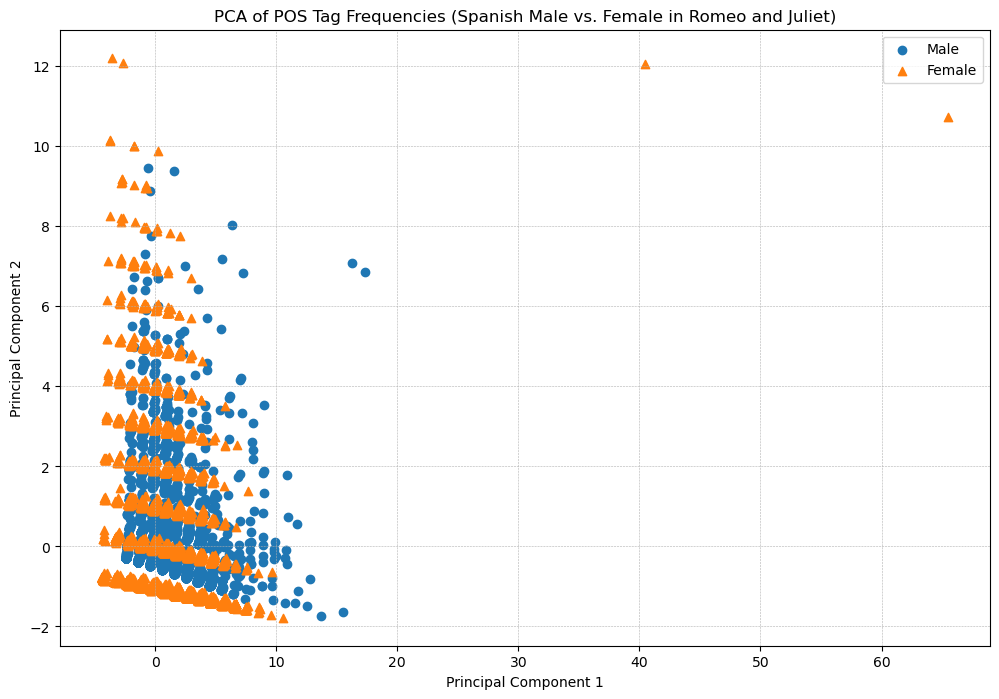

In [2]:

# File paths
files = {
    'Male': "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
    'Female': "/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt",
}

symbols = {
    'Male': 'o',
    'Female': '^',
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

plt.figure(figsize=(12, 8))

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean and tokenize the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]
    tokenized_corpus = [nltk.word_tokenize(sentence) for sentence in clean_corpus]

    # POS Tagging
    pos_tagged_corpus = [nltk.pos_tag(tokens) for tokens in tokenized_corpus]
    pos_tags = [[tag for word, tag in sent] for sent in pos_tagged_corpus]
    pos_tags_flat = [' '.join(tags) for tags in pos_tags]

    # Create a term-document matrix of POS tags using Scikit-learn
    vectorizer = CountVectorizer(tokenizer=lambda x: x.split())
    tdm = vectorizer.fit_transform(pos_tags_flat)

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm.toarray())

    # Visualize the PCA result with different symbols for each file
    plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of POS Tag Frequencies (Spanish Male vs. Female in Romeo and Juliet)')
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer dashed grid lines
plt.show()


# Syntactic features: syntactic tree shapes 

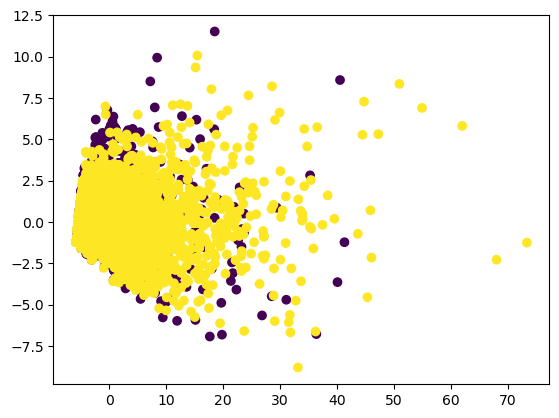

In [2]:
# File paths
files = {
    'Male': "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
    'Female': "/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt",
}

symbols = {
    'Male': 'o',
    'Female': '^',
}

# Initialize the spaCy parser
nlp = spacy.load('en_core_web_sm')

# Load your data (replace these with actual file paths)
male_text = open(files['Male'], 'r').read()
female_text = open(files['Female'], 'r').read()

# Perform parsing
male_doc = nlp(male_text)
female_doc = nlp(female_text)

# Function to get simplified syntactic tree shapes
def get_syntactic_shapes(doc):
    shapes = []
    for sent in doc.sents:
        shape = ' '.join([token.dep_ for token in sent])
        shapes.append(shape)
    return shapes

# Get syntactic tree shapes
male_shapes = get_syntactic_shapes(male_doc)
female_shapes = get_syntactic_shapes(female_doc)

# Combine and vectorize
all_shapes = male_shapes + female_shapes
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(all_shapes)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot
labels = [0]*len(male_shapes) + [1]*len(female_shapes)  # 0 for male, 1 for female
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.show()


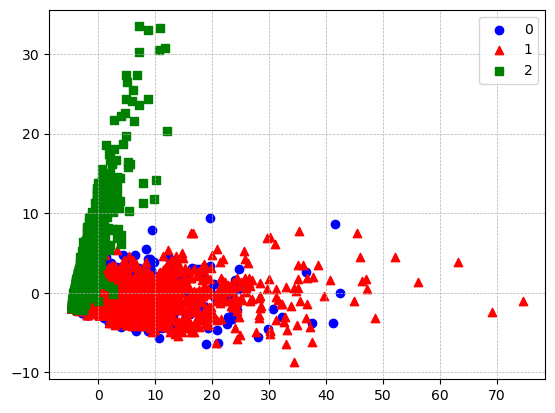

In [5]:
# File paths
files = {
    'Male': "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
    'Female': "/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt",
    'Shakespeare Male': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
}

symbols = {
    'Male': 'o',
    'Female': '^',
    'Shakespeare Male': 's',  # using square symbol for English
}

# Initialize the spaCy parser
nlp = spacy.load('en_core_web_sm')

# Load your data
male_text = open(files['Male'], 'r').read()
female_text = open(files['Female'], 'r').read()
english_text = open(files['Shakespeare Male'], 'r').read()

# Perform parsing
male_doc = nlp(male_text)
female_doc = nlp(female_text)
english_doc = nlp(english_text)

# Function to get simplified syntactic tree shapes
def get_syntactic_shapes(doc):
    shapes = []
    for sent in doc.sents:
        shape = ' '.join([token.dep_ for token in sent])
        shapes.append(shape)
    return shapes

# Get syntactic tree shapes
male_shapes = get_syntactic_shapes(male_doc)
female_shapes = get_syntactic_shapes(female_doc)
english_shapes = get_syntactic_shapes(english_doc)

# Combine and vectorize
all_shapes = male_shapes + female_shapes + english_shapes
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(all_shapes)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot
labels = [0]*len(male_shapes) + [1]*len(female_shapes) + [2]*len(english_shapes)  # 0 for male, 1 for female, 2 for English
colors = ['blue', 'red', 'green']  # blue for male, red for female, green for English

for label, color, marker in zip(set(labels), colors, symbols.values()):
    plt.scatter(X_pca[np.array(labels) == label, 0], X_pca[np.array(labels) == label, 1], c=color, marker=marker, label=label)

plt.grid(linestyle='--', linewidth=0.5)  # Add very thin, dashed grids
plt.legend()
plt.show()


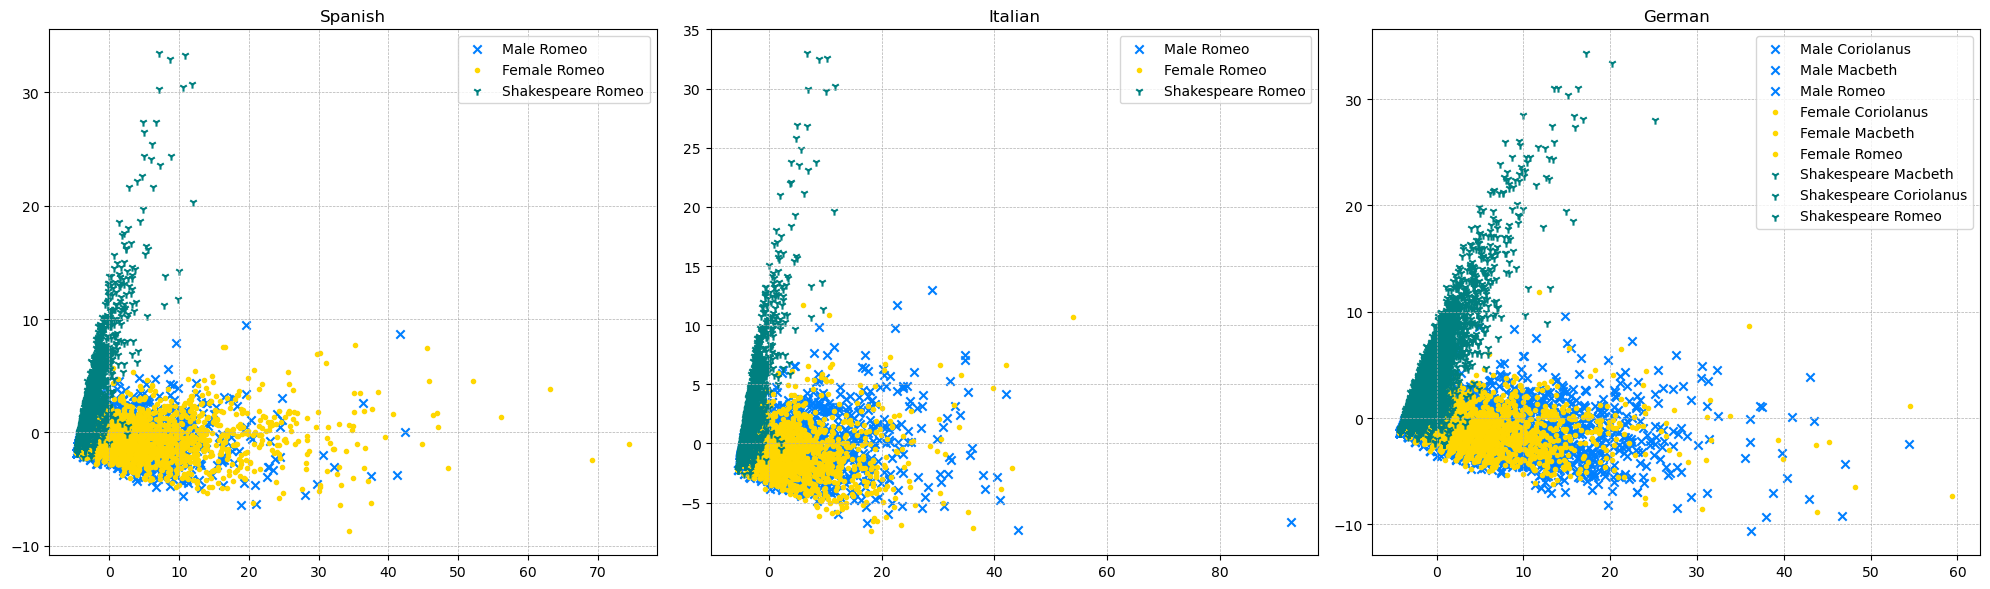

In [33]:
# List of datasets
datasets = [
    {
        'name': 'Spanish',
        'files': {
            'Male Romeo': "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
            'Female Romeo': "/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt",
            'Shakespeare Romeo': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
        }
    },
    {
        'name': 'Italian',
        'files': {
            'Male Romeo': "/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt",
            'Female Romeo': "/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt",
            'Shakespeare Romeo': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
        }
    },
    {
        'name': 'German',
        'files': {
            'Male Coriolanus': "/kaggle/input/gender-difference/German male Coriolanus.txt",
            'Male Macbeth': "/kaggle/input/gender-difference/German male Macbeth.txt",
            'Male Romeo': "/kaggle/input/gender-difference/German male Romeo and Juliet.txt",
            'Female Coriolanus': "/kaggle/input/gender-difference/German female Coriolanus.txt",
            'Female Macbeth': "/kaggle/input/gender-difference/German female Macbeth.txt",
            'Female Romeo': "/kaggle/input/gender-difference/German female Romeo and Juliet.txt",
            'Shakespeare Macbeth': "/kaggle/input/gender-difference/English male Macbeth.txt",
            'Shakespeare Coriolanus': "/kaggle/input/gender-difference/English male Coriolanus.txt",
            'Shakespeare Romeo': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
        }
    }
]

# Colors and symbols
colors = {
    'Male Coriolanus': '#007FFF',
    'Male Macbeth': '#007FFF',
    'Male Romeo': '#007FFF',
    'Female Coriolanus': '#FFD700',
    'Female Macbeth': '#FFD700',
    'Female Romeo': '#FFD700',
    'Shakespeare Macbeth': '#008080',
    'Shakespeare Coriolanus': '#008080',
    'Shakespeare Romeo': '#008080'
}
symbols = {
    'Male Coriolanus': 'x',
    'Male Macbeth': 'x',
    'Male Romeo': 'x',
    'Female Coriolanus': '.',
    'Female Macbeth': '.',
    'Female Romeo': '.',
    'Shakespeare Macbeth': '1',
    'Shakespeare Coriolanus': '1',
    'Shakespeare Romeo': '1'
}

# Initialize the spaCy parser
nlp = spacy.load('en_core_web_sm')

# Create 1x3 subplot
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

for i, dataset in enumerate(datasets):
    ax = axs[i]
    
    # Load, parse, and get syntactic shapes for all files
    docs = {}
    shapes = {}
    for label, path in dataset['files'].items():
        text = open(path, 'r').read()
        doc = nlp(text)
        docs[label] = doc
        shapes[label] = get_syntactic_shapes(doc)

    # Combine and vectorize
    all_shapes = []
    for shape_list in shapes.values():
        all_shapes.extend(shape_list)

    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(all_shapes)

    # Perform PCA for dimensionality reduction
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X.toarray())

    # Split the PCA results for each category
    split_indices = np.cumsum([len(shape_list) for shape_list in shapes.values()])[:-1]
    split_X_pca = np.split(X_pca, split_indices)

    # Plot
    labels = []
    for label, shape_list in shapes.items():
        labels.extend([label] * len(shape_list))

    for label, marker in symbols.items():
        if label in dataset['files']:
            ax.scatter(split_X_pca[list(dataset['files'].keys()).index(label)][:, 0], split_X_pca[list(dataset['files'].keys()).index(label)][:, 1], c=colors[label], marker=marker, label=label)

    ax.grid(linestyle='--', linewidth=0.5)  # Add very thin, dashed grids
    ax.legend()
    ax.set_title(dataset['name'])

plt.tight_layout()
plt.show()

In [ ]:
# List of datasets
datasets = [
    {
        'name': 'Spanish',
        'files': {
            'Male Romeo': "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
            'Female Romeo': "/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt",
            'Shakespeare Romeo': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
        }
    },
    {
        'name': 'Italian',
        'files': {
            'Male Romeo': "/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt",
            'Female Romeo': "/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt",
            'Shakespeare Romeo': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
        }
    },
    {
        'name': 'German',
        'files': {
            'Male Coriolanus': "/kaggle/input/gender-difference/German male Coriolanus.txt",
            'Male Macbeth': "/kaggle/input/gender-difference/German male Macbeth.txt",
            'Male Romeo': "/kaggle/input/gender-difference/German male Romeo and Juliet.txt",
            'Female Coriolanus': "/kaggle/input/gender-difference/German female Coriolanus.txt",
            'Female Macbeth': "/kaggle/input/gender-difference/German female Macbeth.txt",
            'Female Romeo': "/kaggle/input/gender-difference/German female Romeo and Juliet.txt",
            'Shakespeare Macbeth': "/kaggle/input/gender-difference/English male Macbeth.txt",
            'Shakespeare Coriolanus': "/kaggle/input/gender-difference/English male Coriolanus.txt",
            'Shakespeare Romeo': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
        }
    }
]

# Colors and symbols
colors = {
    'Male Coriolanus': '#007FFF',
    'Male Macbeth': '#007FFF',
    'Male Romeo': '#007FFF',
    'Female Coriolanus': '#FFD700',
    'Female Macbeth': '#FFD700',
    'Female Romeo': '#FFD700',
    'Shakespeare Macbeth': '#008080',
    'Shakespeare Coriolanus': '#008080',
    'Shakespeare Romeo': '#008080'
}
symbols = {
    'Male Coriolanus': 'x',
    'Male Macbeth': 'x',
    'Male Romeo': 'x',
    'Female Coriolanus': '.',
    'Female Macbeth': '.',
    'Female Romeo': '.',
    'Shakespeare Macbeth': '1',
    'Shakespeare Coriolanus': '1',
    'Shakespeare Romeo': '1'
}

# Initialize the spaCy parser
nlp = spacy.load('en_core_web_sm')

# Create 1x3 subplot
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

for i, dataset in enumerate(datasets):
    ax = axs[i]
for i, dataset in enumerate(datasets):
    ax = axs[i]
    
    # Load, parse, and get syntactic shapes for all files
    docs = {}
    shapes = {}
    for label, path in dataset['files'].items():
        text = open(path, 'r').read()
        doc = nlp(text)
        docs[label] = doc
        shapes[label] = get_syntactic_shapes(doc)

    # Combine and vectorize
    all_shapes = []
    for shape_list in shapes.values():
        all_shapes.extend(shape_list)

    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(all_shapes)

    # Perform PCA for dimensionality reduction
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X.toarray())

    # Split the PCA results for each category
    split_indices = np.cumsum([len(shape_list) for shape_list in shapes.values()])[:-1]
    split_X_pca = np.split(X_pca, split_indices)

    # Plot
    labels = []
    for label, shape_list in shapes.items():
        labels.extend([label] * len(shape_list))

    for label, marker in symbols.items():
        if label in dataset['files']:
            ax.scatter(split_X_pca[list(dataset['files'].keys()).index(label)][:, 0], split_X_pca[list(dataset['files'].keys()).index(label)][:, 1], c=colors[label], marker=marker, label=label)


    ax.grid(linestyle='--', linewidth=0.3)  # Add very thin, dashed grids
    ax.legend(fontsize=12)  # Increased font size for legend
    ax.set_title(dataset['name'], fontsize=16) 

plt.tight_layout()
plt.show()


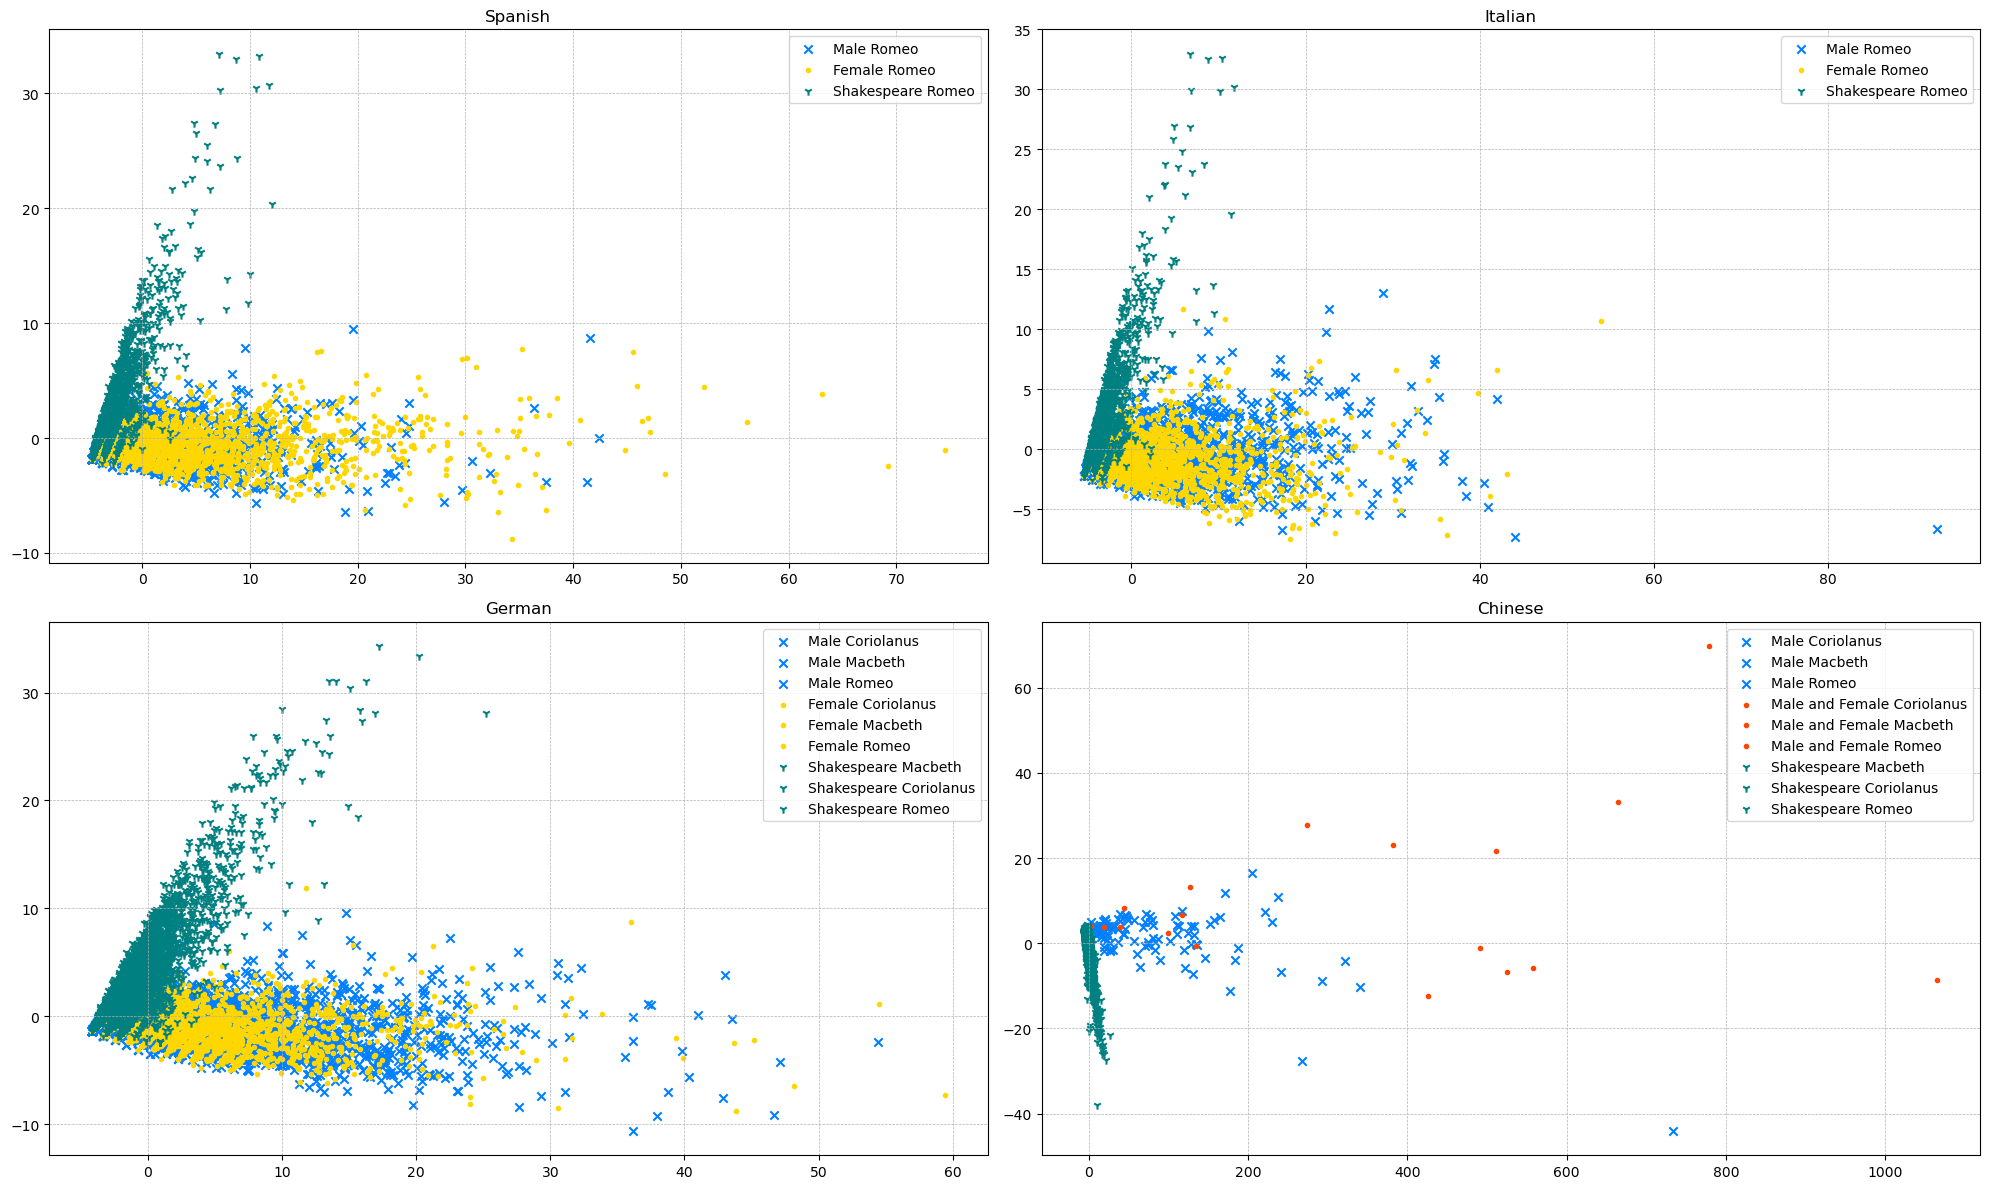

In [37]:
# List of datasets
datasets = [
    {
        'name': 'Spanish',
        'files': {
            'Male Romeo': "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
            'Female Romeo': "/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt",
            'Shakespeare Romeo': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
        }
    },
    {
        'name': 'Italian',
        'files': {
            'Male Romeo': "/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt",
            'Female Romeo': "/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt",
            'Shakespeare Romeo': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
        }
    },
        {
        'name': 'German',
        'files': {
            'Male Coriolanus': "/kaggle/input/gender-difference/German male Coriolanus.txt",
            'Male Macbeth': "/kaggle/input/gender-difference/German male Macbeth.txt",
            'Male Romeo': "/kaggle/input/gender-difference/German male Romeo and Juliet.txt",
            'Female Coriolanus': "/kaggle/input/gender-difference/German female Coriolanus.txt",
            'Female Macbeth': "/kaggle/input/gender-difference/German female Macbeth.txt",
            'Female Romeo': "/kaggle/input/gender-difference/German female Romeo and Juliet.txt",
            'Shakespeare Macbeth': "/kaggle/input/gender-difference/English male Macbeth.txt",
            'Shakespeare Coriolanus': "/kaggle/input/gender-difference/English male Coriolanus.txt",
            'Shakespeare Romeo': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
        }
    },
    {
        'name': 'Chinese',
        'files': {
            'Male Coriolanus': "/kaggle/input/gender-difference/Chinese male Coriolanus.txt",
            'Male Macbeth': "/kaggle/input/gender-difference/Chinese male Macbeth.txt",
            'Male Romeo': "/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt",
            'Male and Female Coriolanus': "/kaggle/input/gender-difference/Chinese male and female Coriolanus.txt",
            'Male and Female Macbeth': "/kaggle/input/gender-difference/Chinese male and female Macbeth.txt",
            'Male and Female Romeo': "/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt",
            'Shakespeare Macbeth': "/kaggle/input/gender-difference/English male Macbeth.txt",
            'Shakespeare Coriolanus': "/kaggle/input/gender-difference/English male Coriolanus.txt",
            'Shakespeare Romeo': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
        }
    }
]

# Colors and symbols
colors = {
    'Male Coriolanus': '#007FFF',
    'Male Macbeth': '#007FFF',
    'Male Romeo': '#007FFF',
    'Male and Female Coriolanus': '#FF4500',
    'Male and Female Macbeth': '#FF4500',
    'Male and Female Romeo': '#FF4500',
    'Female Coriolanus': '#FFD700',
    'Female Macbeth': '#FFD700',
    'Female Romeo': '#FFD700',
    'Shakespeare Macbeth': '#008080',
    'Shakespeare Coriolanus': '#008080',
    'Shakespeare Romeo': '#008080'
}
symbols = {
    'Male Coriolanus': 'x',
    'Male Macbeth': 'x',
    'Male Romeo': 'x',
    'Male and Female Coriolanus': '.',
    'Male and Female Macbeth': '.',
    'Male and Female Romeo': '.',
    'Female Coriolanus': '.',
    'Female Macbeth': '.',
    'Female Romeo': '.',
    'Shakespeare Macbeth': '1',
    'Shakespeare Coriolanus': '1',
    'Shakespeare Romeo': '1'
}

# Initialize the spaCy parser
nlp = spacy.load('en_core_web_sm')

# Create 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

for i, dataset in enumerate(datasets):
    ax = axs[i//2, i%2]
    
    # Load, parse, and get syntactic shapes for all files
    docs = {}
    shapes = {}
    for label, path in dataset['files'].items():
        text = open(path, 'r').read()
        doc = nlp(text)
        docs[label] = doc
        shapes[label] = get_syntactic_shapes(doc)

    # Combine and vectorize
    all_shapes = []
    for shape_list in shapes.values():
        all_shapes.extend(shape_list)

    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(all_shapes)

    # Perform PCA for dimensionality reduction
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X.toarray())

    # Split the PCA results for each category
    split_indices = np.cumsum([len(shape_list) for shape_list in shapes.values()])[:-1]
    split_X_pca = np.split(X_pca, split_indices)

    # Plot
    labels = []
    for label, shape_list in shapes.items():
        labels.extend([label] * len(shape_list))

    for label, marker in symbols.items():
        if label in dataset['files']:
            ax.scatter(split_X_pca[list(dataset['files'].keys()).index(label)][:, 0], split_X_pca[list(dataset['files'].keys()).index(label)][:, 1], c=colors[label], marker=marker, label=label)

    ax.grid(linestyle='--', linewidth=0.5)  # Add very thin, dashed grids
    ax.legend()
    ax.set_title(dataset['name'])

plt.tight_layout()
plt.show()


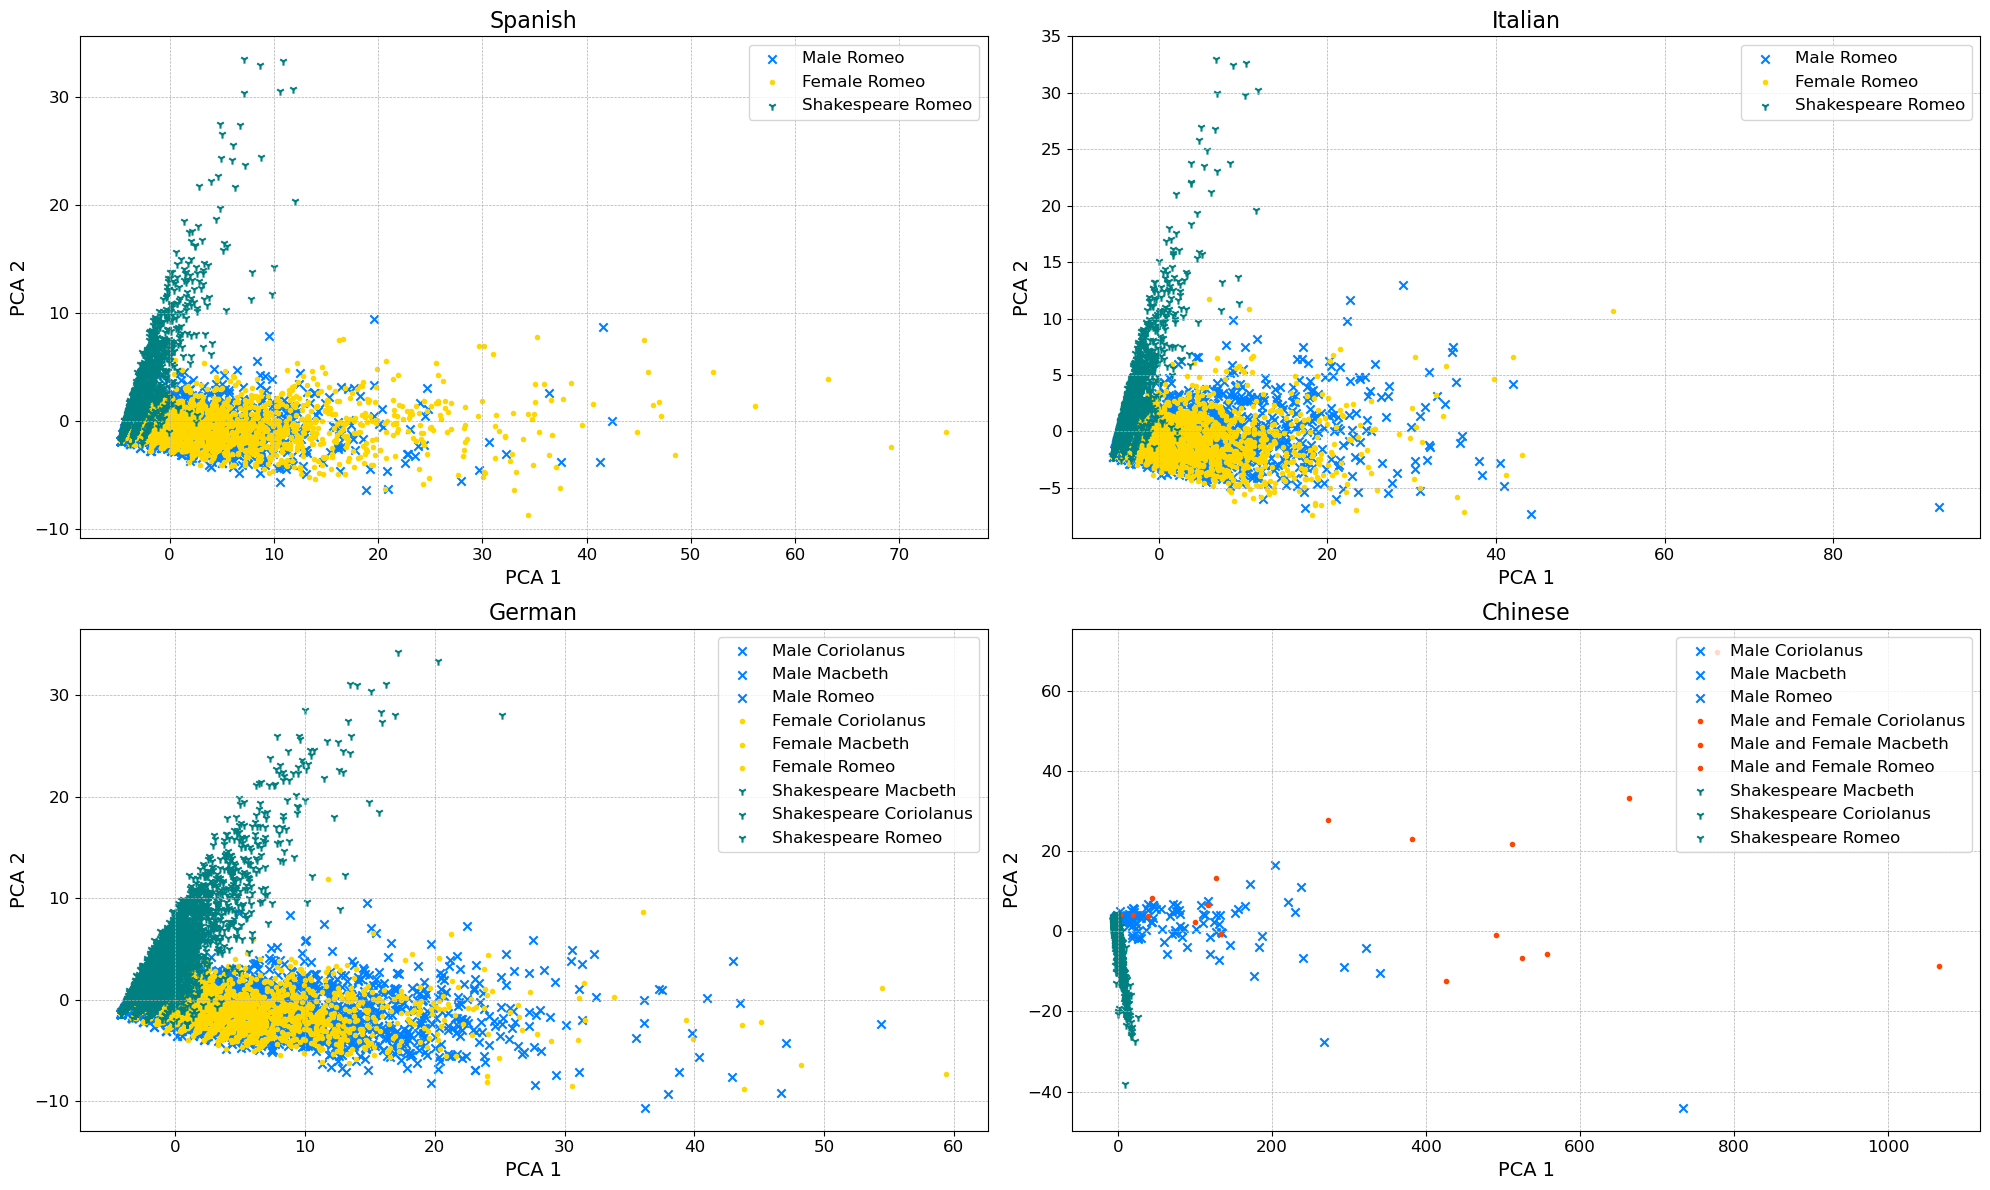

In [38]:
# Create 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

for i, dataset in enumerate(datasets):
    ax = axs[i//2, i%2]
    
    # Load, parse, and get syntactic shapes for all files
    docs = {}
    shapes = {}
    for label, path in dataset['files'].items():
        text = open(path, 'r').read()
        doc = nlp(text)
        docs[label] = doc
        shapes[label] = get_syntactic_shapes(doc)

    # Combine and vectorize
    all_shapes = []
    for shape_list in shapes.values():
        all_shapes.extend(shape_list)

    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(all_shapes)

    # Perform PCA for dimensionality reduction
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X.toarray())

    # Split the PCA results for each category
    split_indices = np.cumsum([len(shape_list) for shape_list in shapes.values()])[:-1]
    split_X_pca = np.split(X_pca, split_indices)

    # Plot
    labels = []
    for label, shape_list in shapes.items():
        labels.extend([label] * len(shape_list))

    for label, marker in symbols.items():
        if label in dataset['files']:
            ax.scatter(split_X_pca[list(dataset['files'].keys()).index(label)][:, 0], split_X_pca[list(dataset['files'].keys()).index(label)][:, 1], c=colors[label], marker=marker, label=label)

    ax.grid(linestyle='--', linewidth=0.5)  # Add very thin, dashed grids
    ax.legend(fontsize=12)  # Increase font size for legend
    ax.set_title(dataset['name'], fontsize=16)  # Increase font size for title
    ax.set_xlabel('PCA 1', fontsize=14)  # Increase font size for x-axis label
    ax.set_ylabel('PCA 2', fontsize=14)  # Increase font size for y-axis label
    ax.tick_params(axis='both', which='major', labelsize=12)  # Increase font size for tick labels

plt.tight_layout()
plt.show()


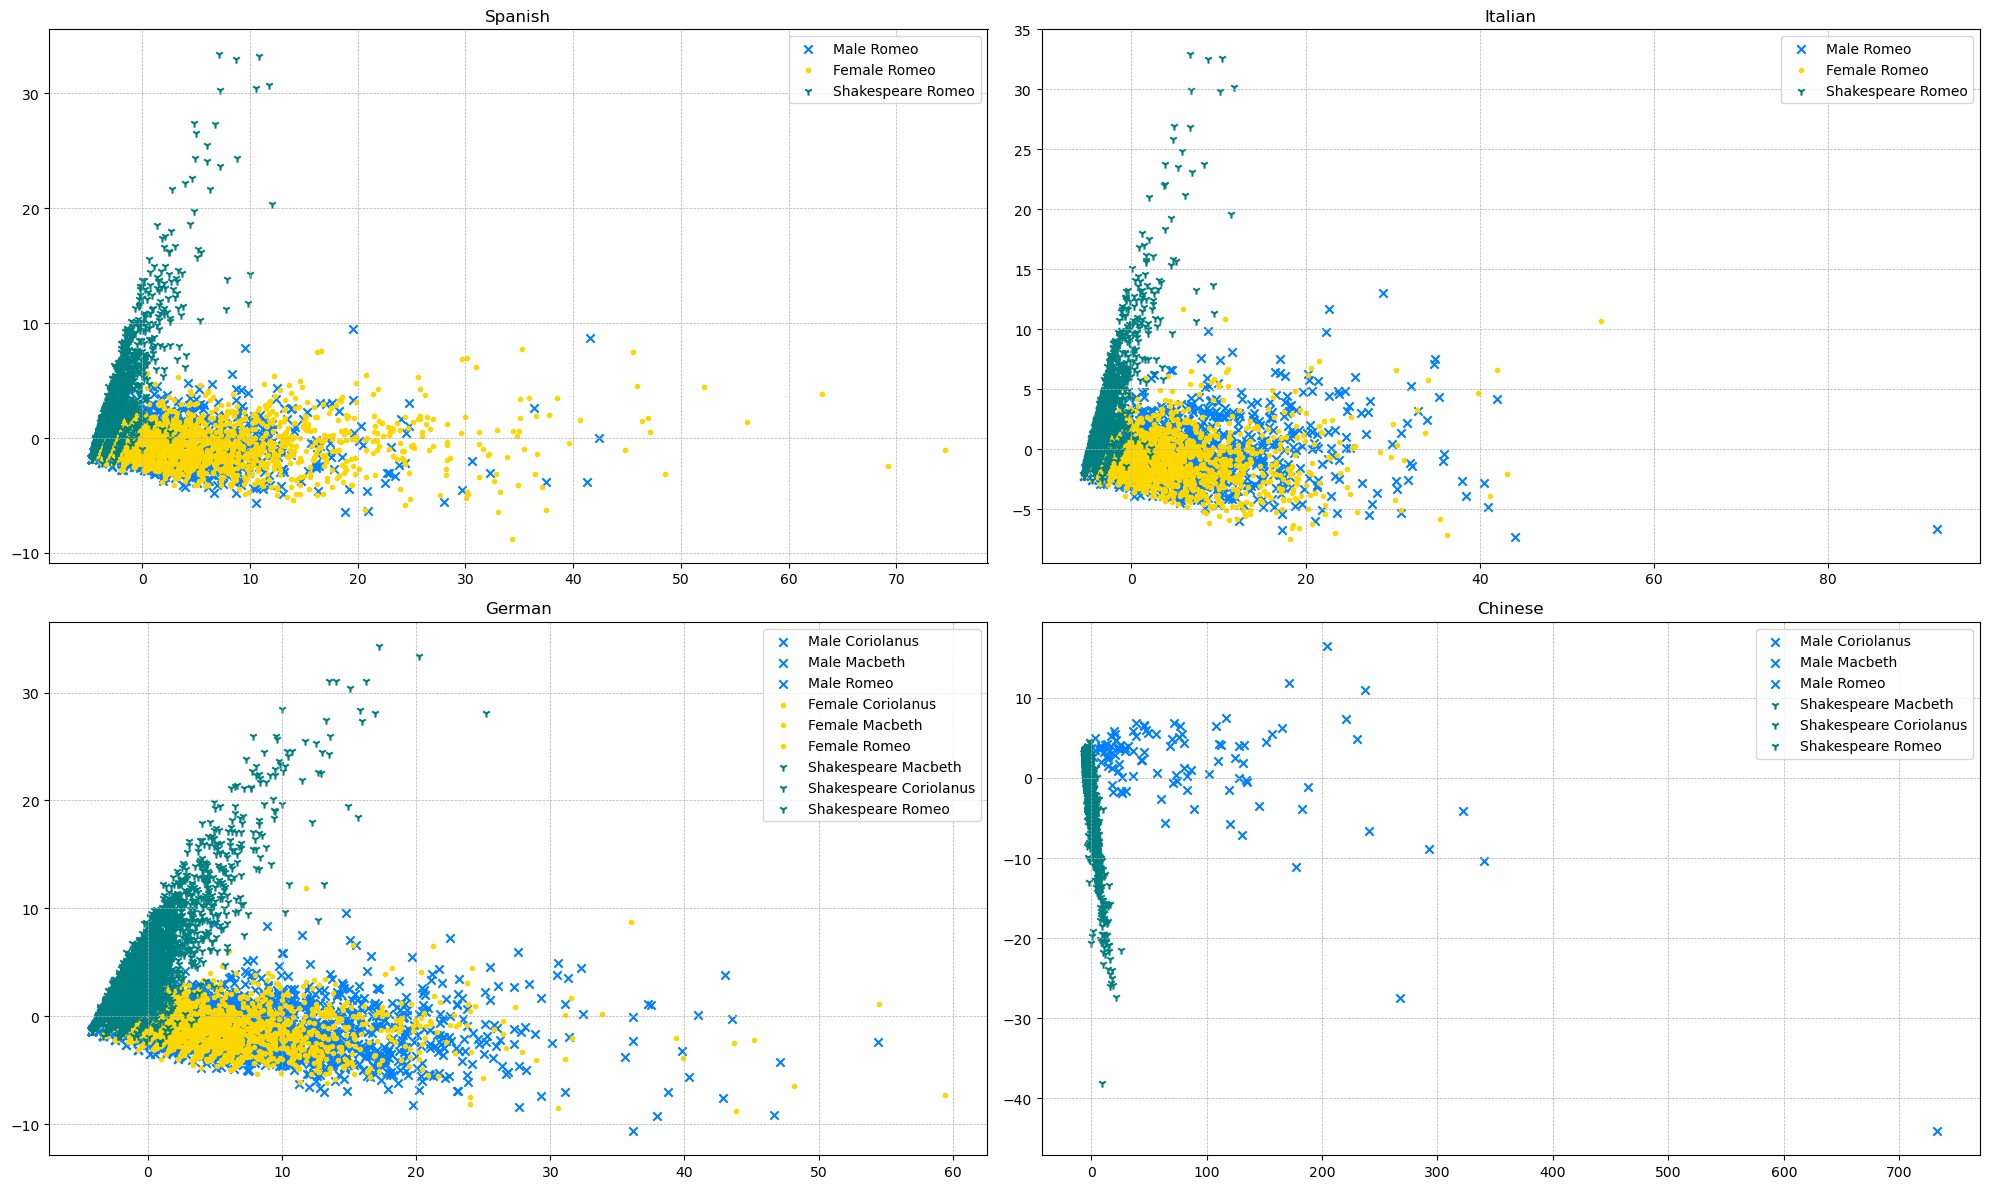

In [35]:
# List of datasets
datasets = [
    {
        'name': 'Spanish',
        'files': {
            'Male Romeo': "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
            'Female Romeo': "/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt",
            'Shakespeare Romeo': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
        }
    },
    {
        'name': 'Italian',
        'files': {
            'Male Romeo': "/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt",
            'Female Romeo': "/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt",
            'Shakespeare Romeo': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
        }
    },
    {
        'name': 'German',
        'files': {
            'Male Coriolanus': "/kaggle/input/gender-difference/German male Coriolanus.txt",
            'Male Macbeth': "/kaggle/input/gender-difference/German male Macbeth.txt",
            'Male Romeo': "/kaggle/input/gender-difference/German male Romeo and Juliet.txt",
            'Female Coriolanus': "/kaggle/input/gender-difference/German female Coriolanus.txt",
            'Female Macbeth': "/kaggle/input/gender-difference/German female Macbeth.txt",
            'Female Romeo': "/kaggle/input/gender-difference/German female Romeo and Juliet.txt",
            'Shakespeare Macbeth': "/kaggle/input/gender-difference/English male Macbeth.txt",
            'Shakespeare Coriolanus': "/kaggle/input/gender-difference/English male Coriolanus.txt",
            'Shakespeare Romeo': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
        }
    },
    
    {
        'name': 'Chinese',
        'files': {
            'Male Coriolanus': "/kaggle/input/gender-difference/Chinese male Coriolanus.txt",
            'Male Macbeth': "/kaggle/input/gender-difference/Chinese male Macbeth.txt",
            'Male Romeo': "/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt",
            'Male and Female Coriolanus': "/kaggle/input/gender-difference/Chinese male and female Coriolanus.txt",
            'Male and Female Macbeth': "/kaggle/input/gender-difference/Chinese male and female Macbeth.txt",
            'Male and Female Romeo': "/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt",
            'Shakespeare Macbeth': "/kaggle/input/gender-difference/English male Macbeth.txt",
            'Shakespeare Coriolanus': "/kaggle/input/gender-difference/English male Coriolanus.txt",
            'Shakespeare Romeo': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
        }
    }
    
    
]

# Colors and symbols
colors = {
    'Male Coriolanus': '#007FFF',
    'Male Macbeth': '#007FFF',
    'Male Romeo': '#007FFF',
    'Female Coriolanus': '#FFD700',
    'Female Macbeth': '#FFD700',
    'Female Romeo': '#FFD700',
    'Shakespeare Macbeth': '#008080',
    'Shakespeare Coriolanus': '#008080',
    'Shakespeare Romeo': '#008080'
}
symbols = {
    'Male Coriolanus': 'x',
    'Male Macbeth': 'x',
    'Male Romeo': 'x',
    'Female Coriolanus': '.',
    'Female Macbeth': '.',
    'Female Romeo': '.',
    'Shakespeare Macbeth': '1',
    'Shakespeare Coriolanus': '1',
    'Shakespeare Romeo': '1'
}

# Initialize the spaCy parser
nlp = spacy.load('en_core_web_sm')

# Create 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

for i, dataset in enumerate(datasets):
    ax = axs[i//2, i%2]
    
    # Load, parse, and get syntactic shapes for all files
    docs = {}
    shapes = {}
    for label, path in dataset['files'].items():
        text = open(path, 'r').read()
        doc = nlp(text)
        docs[label] = doc
        shapes[label] = get_syntactic_shapes(doc)

    # Combine and vectorize
    all_shapes = []
    for shape_list in shapes.values():
        all_shapes.extend(shape_list)

    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(all_shapes)

    # Perform PCA for dimensionality reduction
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X.toarray())

    # Split the PCA results for each category
    split_indices = np.cumsum([len(shape_list) for shape_list in shapes.values()])[:-1]
    split_X_pca = np.split(X_pca, split_indices)

    # Plot
    labels = []
    for label, shape_list in shapes.items():
        labels.extend([label] * len(shape_list))

    for label, marker in symbols.items():
        if label in dataset['files']:
            ax.scatter(split_X_pca[list(dataset['files'].keys()).index(label)][:, 0], split_X_pca[list(dataset['files'].keys()).index(label)][:, 1], c=colors[label], marker=marker, label=label)

    ax.grid(linestyle='--', linewidth=0.5)  # Add very thin, dashed grids
    ax.legend()
    ax.set_title(dataset['name'])

plt.tight_layout()
plt.show()

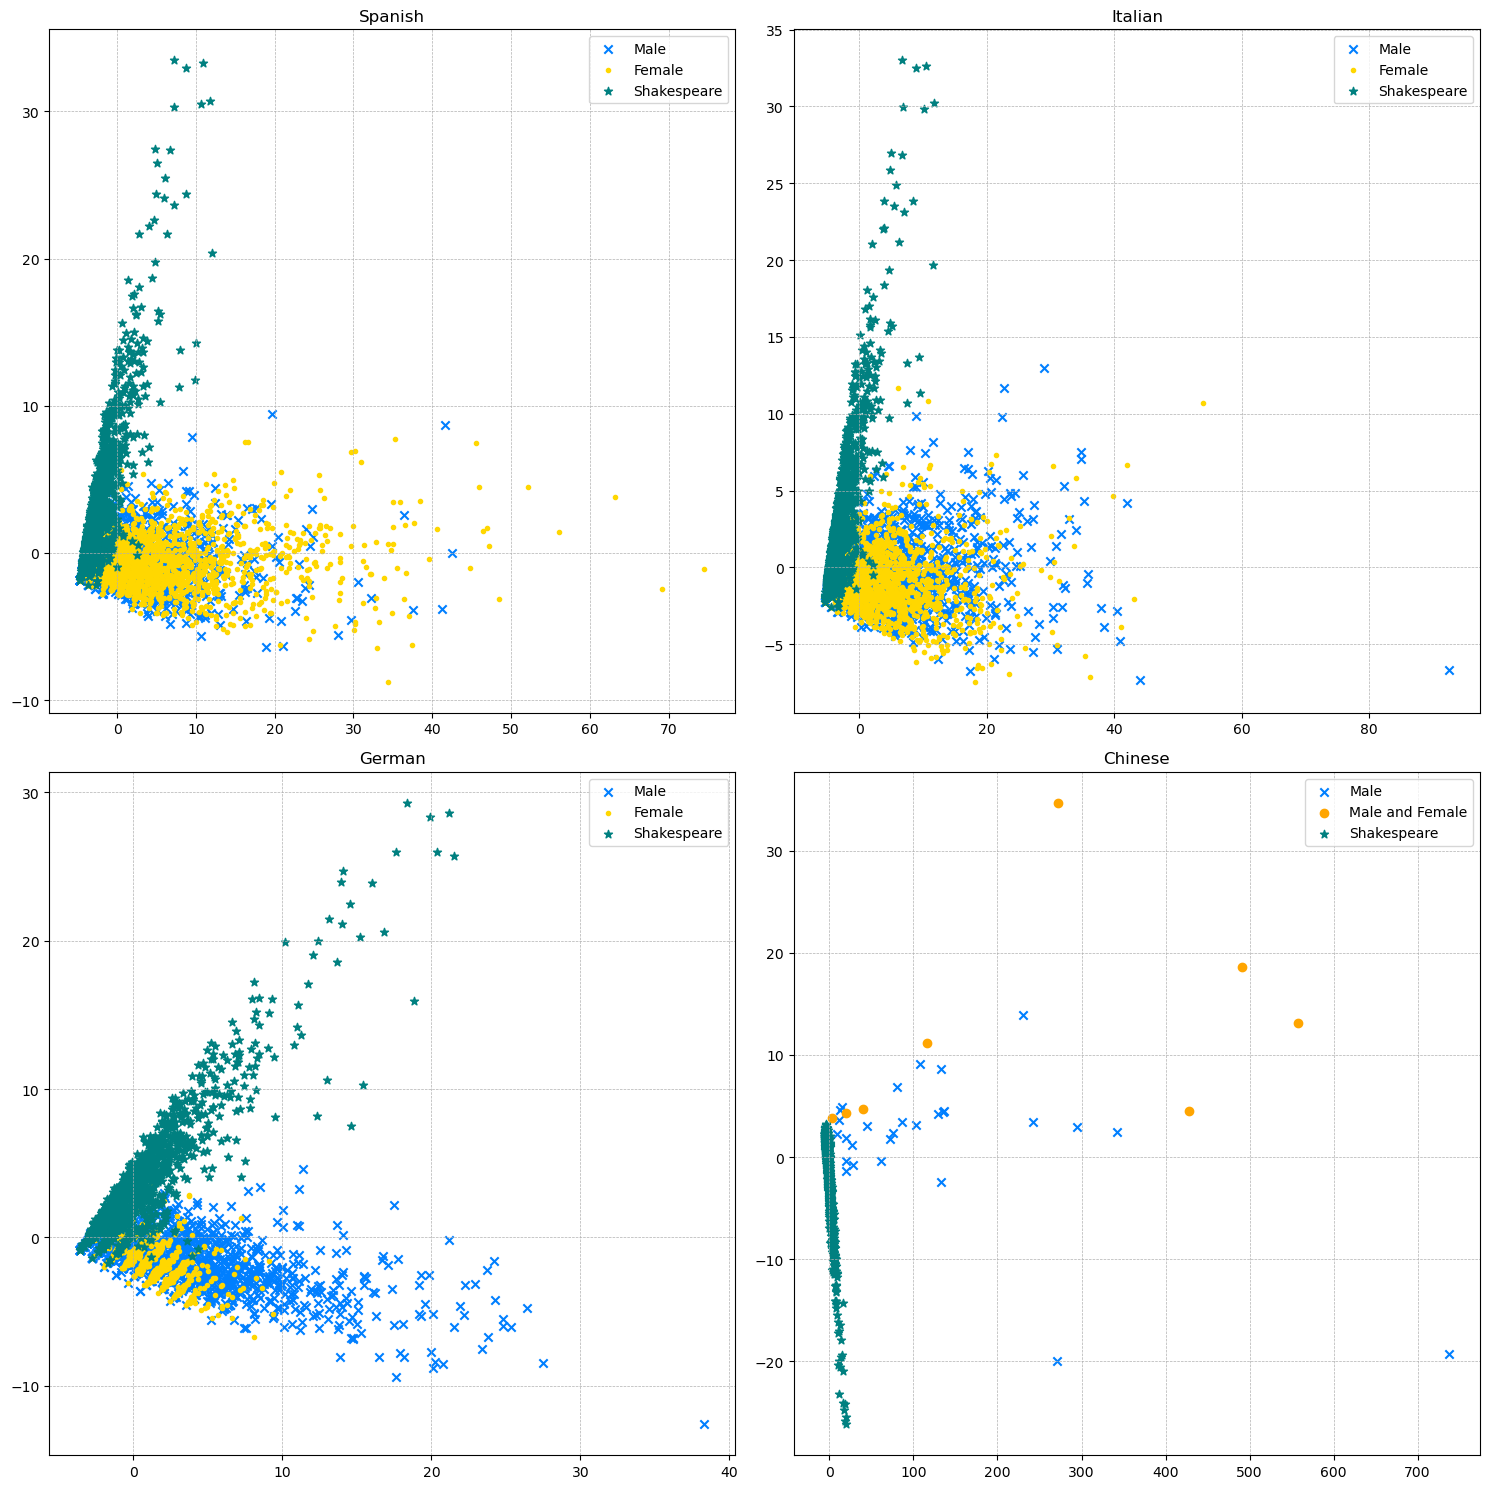

In [30]:
# List of datasets
datasets = [
    {
        'name': 'Spanish',
        'files': {
            'Male': "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
            'Female': "/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt",
            'Shakespeare': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
        }
    },
    {
        'name': 'Italian',
        'files': {
            'Male': "/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt",
            'Female': "/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt",
            'Shakespeare': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
        }
    },
    {
        'name': 'German',
        'files': {
            'Male': "/kaggle/input/gender-difference/German male Romeo and Juliet.txt",
            'Female': "/kaggle/input/gender-difference/German female Romeo and Juliet.txt",
            'Shakespeare': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
        }
    },
    {
        'name': 'Chinese',
        'files': {
            'Male': "/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt",
            'Male and Female': "/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt",
            'Shakespeare': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
        }
    }
]

# Colors and symbols
colors = {
    'Male': '#007FFF',
    'Female': '#FFD700',
    'Male and Female': '#FFA500',
    'Shakespeare': '#008080'
}
symbols = {
    'Male': 'x',
    'Female': '.',
    'Male and Female': 'o',
    'Shakespeare': '*'
}

# Initialize the spaCy parser
nlp = spacy.load('en_core_web_sm')

# Create 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

for i, dataset in enumerate(datasets):
    ax = axs[i//2, i%2]
    
    # Load, parse, and get syntactic shapes for all files
    docs = {}
    shapes = {}
    for label, path in dataset['files'].items():
        text = open(path, 'r').read()
        doc = nlp(text)
        docs[label] = doc
        shapes[label] = get_syntactic_shapes(doc)

    # Combine and vectorize
    all_shapes = []
    for shape_list in shapes.values():
        all_shapes.extend(shape_list)

    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(all_shapes)

    # Perform PCA for dimensionality reduction
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X.toarray())

    # Split the PCA results for each category
    split_indices = np.cumsum([len(shape_list) for shape_list in shapes.values()])[:-1]
    split_X_pca = np.split(X_pca, split_indices)

    # Plot
    labels = []
    for label, shape_list in shapes.items():
        labels.extend([label] * len(shape_list))

    for label, marker in symbols.items():
        if label in dataset['files']:
            ax.scatter(split_X_pca[list(dataset['files'].keys()).index(label)][:, 0], split_X_pca[list(dataset['files'].keys()).index(label)][:, 1], c=colors[label], marker=marker, label=label)

    ax.grid(linestyle='--', linewidth=0.5)  # Add very thin, dashed grids
    ax.legend()
    ax.set_title(dataset['name'])

plt.tight_layout()
plt.show()


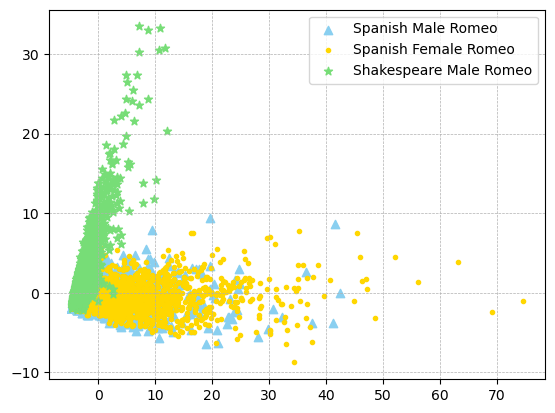

In [25]:
# File paths
files = {
    'Spanish Male Romeo': "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
    'Spanish Female Romeo': "/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt",
    'Shakespeare Male Romeo': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
}

symbols = {
    'Spanish Male Romeo': '^',
    'Spanish Female Romeo': '.',
    'Shakespeare Male Romeo': '*',  # using square symbol for English
}

# Initialize the spaCy parser
nlp = spacy.load('en_core_web_sm')

# Load your data
male_text = open(files['Spanish Male Romeo'], 'r').read()
female_text = open(files['Spanish Female Romeo'], 'r').read()
english_text = open(files['Shakespeare Male Romeo'], 'r').read()

# Perform parsing
male_doc = nlp(male_text)
female_doc = nlp(female_text)
english_doc = nlp(english_text)

# Function to get simplified syntactic tree shapes
def get_syntactic_shapes(doc):
    shapes = []
    for sent in doc.sents:
        shape = ' '.join([token.dep_ for token in sent])
        shapes.append(shape)
    return shapes

# Get syntactic tree shapes
male_shapes = get_syntactic_shapes(male_doc)
female_shapes = get_syntactic_shapes(female_doc)
english_shapes = get_syntactic_shapes(english_doc)

# Combine and vectorize
all_shapes = male_shapes + female_shapes + english_shapes
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(all_shapes)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot
labels = ['Spanish Male Romeo']*len(male_shapes) + ['Spanish Female Romeo']*len(female_shapes) + ['Shakespeare Male Romeo']*len(english_shapes)
colors = {
    'Spanish Male Romeo': '#89CFF0',       
    'Spanish Female Romeo': '#FFD700',    
    'Shakespeare Male Romeo': '#77DD77'   
}



for label, marker in symbols.items():
    plt.scatter(X_pca[np.array(labels) == label, 0], X_pca[np.array(labels) == label, 1], c=colors[label], marker=marker, label=label)

plt.grid(linestyle='--', linewidth=0.5)  # Add very thin, dashed grids
plt.legend()
plt.show()


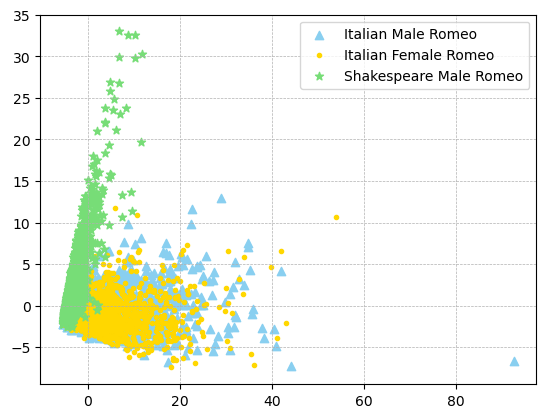

In [23]:
# File paths
files = {
    'Italian Male Romeo': "/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt",
    'Italian Female Romeo': "/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt",
    'Shakespeare Male Romeo': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
}
  
symbols = {
    'Italian Male Romeo': '^',
    'Italian Female Romeo': '.',
    'Shakespeare Male Romeo': '*',  # using square symbol for English
}

# Initialize the spaCy parser
nlp = spacy.load('en_core_web_sm')

# Load your data
male_text = open(files['Italian Male Romeo'], 'r').read()
female_text = open(files['Italian Female Romeo'], 'r').read()
english_text = open(files['Shakespeare Male Romeo'], 'r').read()

# Perform parsing
male_doc = nlp(male_text)
female_doc = nlp(female_text)
english_doc = nlp(english_text)

# Function to get simplified syntactic tree shapes
def get_syntactic_shapes(doc):
    shapes = []
    for sent in doc.sents:
        shape = ' '.join([token.dep_ for token in sent])
        shapes.append(shape)
    return shapes

# Get syntactic tree shapes
male_shapes = get_syntactic_shapes(male_doc)
female_shapes = get_syntactic_shapes(female_doc)
english_shapes = get_syntactic_shapes(english_doc)

# Combine and vectorize
all_shapes = male_shapes + female_shapes + english_shapes
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(all_shapes)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot
labels = ['Italian Male Romeo']*len(male_shapes) + ['Italian Female Romeo']*len(female_shapes) + ['Shakespeare Male Romeo']*len(english_shapes)
colors = {
    'Italian Male Romeo': '#89CFF0',       
    'Italian Female Romeo': '#FFD700',    
    'Shakespeare Male Romeo': '#77DD77'   
}



for label, marker in symbols.items():
    plt.scatter(X_pca[np.array(labels) == label, 0], X_pca[np.array(labels) == label, 1], c=colors[label], marker=marker, label=label)

plt.grid(linestyle='--', linewidth=0.5)  # Add very thin, dashed grids
plt.legend()
plt.show()


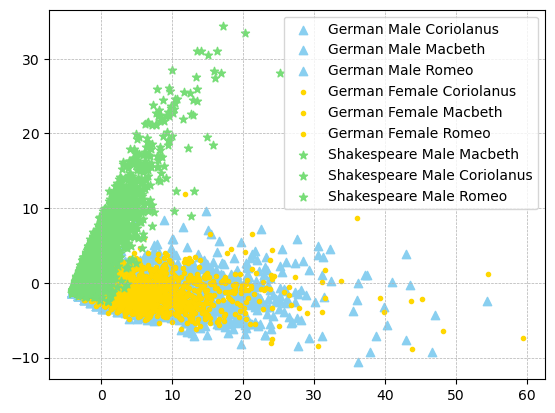

In [21]:
# File paths
files = {
    'German Male Coriolanus': "/kaggle/input/gender-difference/German male Coriolanus.txt",
    'German Male Macbeth': "/kaggle/input/gender-difference/German male Macbeth.txt",
    'German Male Romeo': "/kaggle/input/gender-difference/German male Romeo and Juliet.txt",
    'German Female Coriolanus': "/kaggle/input/gender-difference/German female Coriolanus.txt",
    'German Female Macbeth': "/kaggle/input/gender-difference/German female Macbeth.txt",
    'German Female Romeo': "/kaggle/input/gender-difference/German female Romeo and Juliet.txt",
    'Shakespeare Male Macbeth': "/kaggle/input/gender-difference/English male Macbeth.txt",
    'Shakespeare Male Coriolanus': "/kaggle/input/gender-difference/English male Coriolanus.txt",
    'Shakespeare Male Romeo': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
}

symbols = {
    'German Male Coriolanus': '^',
    'German Male Macbeth': '^',
    'German Male Romeo': '^',
    'German Female Coriolanus': '.',
    'German Female Macbeth': '.',
    'German Female Romeo': '.',
    'Shakespeare Male Macbeth': '*',
    'Shakespeare Male Coriolanus': '*',
    'Shakespeare Male Romeo': '*'
}

# Initialize the spaCy parser
nlp = spacy.load('en_core_web_sm')

# Load, parse, and get syntactic shapes for all files
docs = {}
shapes = {}
for label, path in files.items():
    text = open(path, 'r').read()
    doc = nlp(text)
    docs[label] = doc
    shapes[label] = get_syntactic_shapes(doc)

# Combine and vectorize
all_shapes = []
for shape_list in shapes.values():
    all_shapes.extend(shape_list)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(all_shapes)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Split the PCA results for each category
split_indices = np.cumsum([len(shape_list) for shape_list in shapes.values()])[:-1]
split_X_pca = np.split(X_pca, split_indices)

# Plot
colors = {
    'German Male Coriolanus': '#89CFF0',
    'German Male Macbeth': '#89CFF0',
    'German Male Romeo': '#89CFF0',
    'German Female Coriolanus': '#FFD700',
    'German Female Macbeth': '#FFD700',
    'German Female Romeo': '#FFD700',
    'Shakespeare Male Macbeth': '#77DD77',
    'Shakespeare Male Coriolanus': '#77DD77',
    'Shakespeare Male Romeo': '#77DD77'
}

for label, marker in symbols.items():
    plt.scatter(split_X_pca[list(files.keys()).index(label)][:, 0], split_X_pca[list(files.keys()).index(label)][:, 1], c=colors[label], marker=marker, label=label)

plt.grid(linestyle='--', linewidth=0.5)  # Add very thin, dashed grids
plt.legend()
plt.show()


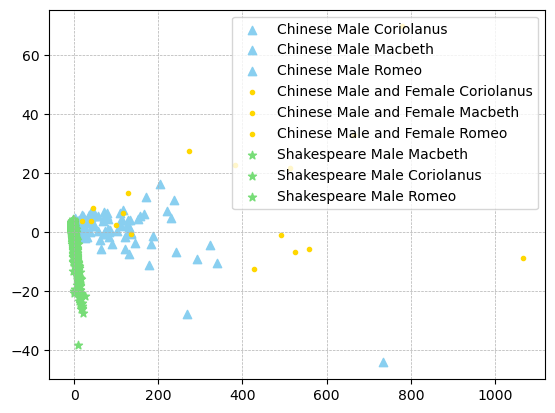

In [24]:
# File paths
files = {
    'Chinese Male Coriolanus': "/kaggle/input/gender-difference/Chinese male Coriolanus.txt",
    'Chinese Male Macbeth': "/kaggle/input/gender-difference/Chinese male Macbeth.txt",
    'Chinese Male Romeo': "/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt",
    'Chinese Male and Female Coriolanus': "/kaggle/input/gender-difference/Chinese male and female Coriolanus.txt",
    'Chinese Male and Female Macbeth': "/kaggle/input/gender-difference/Chinese male and female Macbeth.txt",
    'Chinese Male and Female Romeo': "/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt",
    'Shakespeare Male Macbeth': "/kaggle/input/gender-difference/English male Macbeth.txt",
    'Shakespeare Male Coriolanus': "/kaggle/input/gender-difference/English male Coriolanus.txt",
    'Shakespeare Male Romeo': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt"
}

symbols = {
    'Chinese Male Coriolanus': '^',
    'Chinese Male Macbeth': '^',
    'Chinese Male Romeo': '^',
    'Chinese Male and Female Coriolanus': '.',
    'Chinese Male and Female Macbeth': '.',
    'Chinese Male and Female Romeo': '.',
    'Shakespeare Male Macbeth': '*',
    'Shakespeare Male Coriolanus': '*',
    'Shakespeare Male Romeo': '*',
}

colors = {
    'Chinese Male Coriolanus': '#89CFF0',
    'Chinese Male Macbeth': '#89CFF0',
    'Chinese Male Romeo': '#89CFF0',
    'Chinese Male and Female Coriolanus': '#FFD700',
    'Chinese Male and Female Macbeth': '#FFD700',
    'Chinese Male and Female Romeo': '#FFD700',
    'Shakespeare Male Macbeth': '#77DD77',
    'Shakespeare Male Coriolanus': '#77DD77',
    'Shakespeare Male Romeo': '#77DD77'
}

# Initialize the spaCy parser
nlp = spacy.load('en_core_web_sm')

# Load, parse, and get syntactic shapes for all files
docs = {}
shapes = {}
for label, path in files.items():
    text = open(path, 'r').read()
    doc = nlp(text)
    docs[label] = doc
    shapes[label] = get_syntactic_shapes(doc)

# Combine and vectorize
all_shapes = []
for shape_list in shapes.values():
    all_shapes.extend(shape_list)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(all_shapes)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Split the PCA results for each category
split_indices = np.cumsum([len(shape_list) for shape_list in shapes.values()])[:-1]
split_X_pca = np.split(X_pca, split_indices)

# Plot
labels = []
for label, shape_list in shapes.items():
    labels.extend([label] * len(shape_list))

for label, marker in symbols.items():
    plt.scatter(X_pca[np.array(labels) == label, 0], X_pca[np.array(labels) == label, 1], c=colors[label], marker=marker, label=label)

plt.grid(linestyle='--', linewidth=0.5)  # Add very thin, dashed grids
plt.legend()
plt.show()


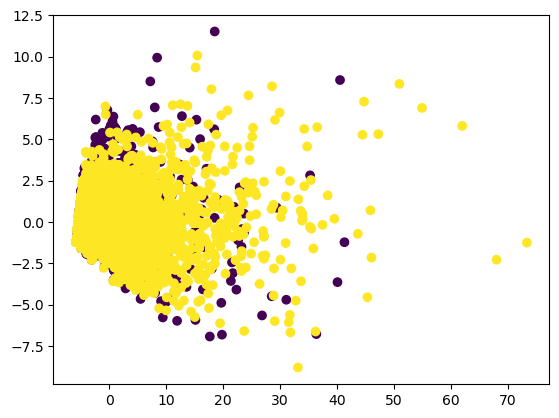

In [6]:
# Initialize the spaCy parser
nlp = spacy.load('en_core_web_sm')

# Load your data (replace these with actual file paths)
male_text = open(files['Male'], 'r').read()
female_text = open(files['Female'], 'r').read()

# Perform parsing
male_doc = nlp(male_text)
female_doc = nlp(female_text)

# Function to get simplified syntactic tree shapes
def get_syntactic_shapes(doc):
    shapes = []
    for sent in doc.sents:
        shape = ' '.join([token.dep_ for token in sent])
        shapes.append(shape)
    return shapes

# Get syntactic tree shapes
male_shapes = get_syntactic_shapes(male_doc)
female_shapes = get_syntactic_shapes(female_doc)

# Combine and vectorize
all_shapes = male_shapes + female_shapes
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(all_shapes)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot
labels = [0]*len(male_shapes) + [1]*len(female_shapes)  # 0 for male, 1 for female
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.show()

# Calculate pairwise Euclidean distances

# Chinese

In [ ]:
# Update the file paths to point to the Chinese male and mixed-gender text files
files = {
    'Male': "/kaggle/input/gender-difference/Chinese male Macbeth.txt",
    'Female': "/kaggle/input/gender-difference/Chinese male and female Macbeth.txt",
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

# Tokenization function for Chinese using jieba
def tokenize_jieba(text):
    return ' '.join(jieba.cut(text))

all_points = []  # To store all points for distance calculation
labels = []  # To store labels corresponding to each point

plt.figure(figsize=(12, 8))

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean and tokenize the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]
    tokenized_corpus = [tokenize_jieba(line) for line in clean_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(tokenized_corpus)

    # Get the indices of the 5 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_5_indices = np.argsort(freqs)[-5:]

    # Get the 5-MFW frequency matrix
    tdm_5mfw = tdm[:, top_5_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_5mfw.toarray())

    all_points.extend(tdm_reduced)
    labels.extend([label] * tdm_reduced.shape[0])

# Calculate pairwise Euclidean distances
distances = euclidean_distances(all_points)

# Save distances to a file
with open("/kaggle/working/pairwise_distances.txt", "w") as f:
    for i in range(len(all_points)):
        for j in range(i+1, len(all_points)):
            label_i, label_j = labels[i], labels[j]
            # Calculate and save the distance
            distance = distances[i, j]
            f.write(f"Distance between {label_i} point {i} and {label_j} point {j}: {distance:.2f}\n")


In [ ]:
# Update the file paths to point to the Chinese male and mixed-gender text files
files = {
    'Male': "/kaggle/input/gender-difference/Chinese male Macbeth.txt",
    'Female': "/kaggle/input/gender-difference/Chinese male and female Macbeth.txt",
}
# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

# Tokenization function for Chinese using jieba
def tokenize_jieba(text):
    return ' '.join(jieba.cut(text))

all_points = []  # To store all points for distance calculation
labels = []  # To store labels corresponding to each point

plt.figure(figsize=(12, 8))

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean and tokenize the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]
    tokenized_corpus = [tokenize_jieba(line) for line in clean_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(tokenized_corpus)

    # Get the indices of the 100 most frequent words (Changed from 5 to 100)
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_100_indices = np.argsort(freqs)[-100:]

    # Get the 100-MFW frequency matrix (Changed from tdm_5mfw to tdm_100mfw)
    tdm_100mfw = tdm[:, top_100_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_100mfw.toarray())

    all_points.extend(tdm_reduced)
    labels.extend([label] * tdm_reduced.shape[0])

# Calculate pairwise Euclidean distances
distances = euclidean_distances(all_points)

# Save distances to a file
with open("/kaggle/working/pairwise_distances.txt", "w") as f:
    for i in range(len(all_points)):
        for j in range(i+1, len(all_points)):
            label_i, label_j = labels[i], labels[j]
            # Calculate and save the distance
            distance = distances[i, j]
            f.write(f"Distance between {label_i} point {i} and {label_j} point {j}: {distance:.2f}\n")


In [ ]:
# Read the text file into a DataFrame
with open('/kaggle/working/pairwise_distances.txt', 'r') as f:
    lines = f.readlines()

# Initialize lists to store male points, female points, and distances
male_points = []
female_points = []
distances = []

# Parse each line to extract the relevant information
for line in lines:
    parts = line.split(": ")
    distance = float(parts[1].strip())
    points_info = parts[0].split(" and ")
    male_point = int(points_info[0].split(" ")[-1])
    female_point = int(points_info[1].split(" ")[-1])
    
    male_points.append(male_point)
    female_points.append(female_point)
    distances.append(distance)

# Create a DataFrame
df = pd.DataFrame({
    'Male_Point': male_points,
    'Female_Point': female_points,
    'Distance': distances
})

# Perform some basic statistical analyses
mean_distance = df['Distance'].mean()
min_distance = df['Distance'].min()
max_distance = df['Distance'].max()
std_distance = df['Distance'].std()  # Calculate standard deviation

print(f"Mean Distance: {mean_distance}")
print(f"Min Distance: {min_distance}")
print(f"Max Distance: {max_distance}")
print(f"Standard Deviation of Distance: {std_distance}")  # Print standard deviation


# German

In [ ]:
# Update the file paths to point to the German male and female text files
files = {
    'Male': "/kaggle/input/gender-difference/German male Romeo and Juliet.txt",
    'Female': "/kaggle/input/gender-difference/German female Romeo and Juliet.txt",
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

all_points = []  # To store all points for distance calculation
labels = []  # To store labels corresponding to each point

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 5 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_5_indices = np.argsort(freqs)[-5:]

    # Get the 5-MFW frequency matrix
    tdm_5mfw = tdm[:, top_5_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_5mfw.toarray())

    all_points.extend(tdm_reduced)
    labels.extend([label] * tdm_reduced.shape[0])

# Calculate pairwise Euclidean distances
distances = euclidean_distances(all_points)

# Save distances to a file
with open("/kaggle/working/pairwise_distances.txt", "w") as f:
    for i in range(len(all_points)):
        for j in range(i+1, len(all_points)):
            label_i, label_j = labels[i], labels[j]
            # Only calculate and save the distance if one point is 'Male' and the other is 'Female'
            if label_i != label_j:
                distance = distances[i, j]
                f.write(f"Distance between {label_i} point {i} and {label_j} point {j}: {distance:.2f}\n")


In [ ]:
# Update the file paths to point to the German male and female text files
files = {
    'Male': "/kaggle/input/gender-difference/German male Romeo and Juliet.txt",
    'Female': "/kaggle/input/gender-difference/German female Romeo and Juliet.txt",
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

all_points = []  # To store all points for distance calculation
labels = []  # To store labels corresponding to each point

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 100 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_100_indices = np.argsort(freqs)[-100:]  # Changed from -5 to -100

    # Get the 100-MFW frequency matrix
    tdm_100mfw = tdm[:, top_100_indices]  # Changed from tdm_5mfw to tdm_100mfw

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_100mfw.toarray())  # Changed from tdm_5mfw to tdm_100mfw

    all_points.extend(tdm_reduced)
    labels.extend([label] * tdm_reduced.shape[0])

# Calculate pairwise Euclidean distances
distances = euclidean_distances(all_points)

# Save distances to a file
with open("/kaggle/working/pairwise_distances.txt", "w") as f:
    for i in range(len(all_points)):
        for j in range(i+1, len(all_points)):
            label_i, label_j = labels[i], labels[j]
            # Only calculate and save the distance if one point is 'Male' and the other is 'Female'
            if label_i != label_j:
                distance = distances[i, j]
                f.write(f"Distance between {label_i} point {i} and {label_j} point {j}: {distance:.2f}\n")


In [ ]:
# Read the text file into a DataFrame
with open('/kaggle/working/pairwise_distances.txt', 'r') as f:
    lines = f.readlines()

# Initialize lists to store male points, female points, and distances
male_points = []
female_points = []
distances = []

# Parse each line to extract the relevant information
for line in lines:
    parts = line.split(": ")
    distance = float(parts[1].strip())
    points_info = parts[0].split(" and ")
    male_point = int(points_info[0].split(" ")[-1])
    female_point = int(points_info[1].split(" ")[-1])
    
    male_points.append(male_point)
    female_points.append(female_point)
    distances.append(distance)

# Create a DataFrame
df = pd.DataFrame({
    'Male_Point': male_points,
    'Female_Point': female_points,
    'Distance': distances
})

# Perform some basic statistical analyses
mean_distance = df['Distance'].mean()
min_distance = df['Distance'].min()
max_distance = df['Distance'].max()
std_distance = df['Distance'].std()  # Calculate standard deviation

print(f"Mean Distance: {mean_distance}")
print(f"Min Distance: {min_distance}")
print(f"Max Distance: {max_distance}")
print(f"Standard Deviation of Distance: {std_distance}")  # Print standard deviation


# Spanish

In [ ]:
# Update the file paths to point to the Spanish male and female text files
files = {
    'Male': "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
    'Female': "/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt",
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

all_points = []  # To store all points for distance calculation
labels = []  # To store labels corresponding to each point

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 100 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_100_indices = np.argsort(freqs)[-100:]

    # Get the 100-MFW frequency matrix
    tdm_100mfw = tdm[:, top_100_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_100mfw.toarray())

    all_points.extend(tdm_reduced)
    labels.extend([label] * tdm_reduced.shape[0])

# Calculate pairwise Euclidean distances
distances = euclidean_distances(all_points)

# Save distances to a file
with open("/kaggle/working/pairwise_distances.txt", "w") as f:
    for i in range(len(all_points)):
        for j in range(i+1, len(all_points)):
            label_i, label_j = labels[i], labels[j]
            # Only calculate and save the distance if one point is 'Male' and the other is 'Female'
            if label_i != label_j:
                distance = distances[i, j]
                f.write(f"Distance between {label_i} point {i} and {label_j} point {j}: {distance:.2f}\n")


In [ ]:
# Update the file paths to point to the Spanish male and female text files
files = {
    'Male': "/kaggle/input/gender-difference/Spanish male Romeo and Juliet.txt",
    'Female': "/kaggle/input/gender-difference/Spanish female Romeo and Juliet.txt",
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

all_points = []  # To store all points for distance calculation
labels = []  # To store labels corresponding to each point

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 5 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_5_indices = np.argsort(freqs)[-5:]  # Changed from -100 to -5

    # Get the 5-MFW frequency matrix
    tdm_5mfw = tdm[:, top_5_indices]  # Changed from tdm_100mfw to tdm_5mfw

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_5mfw.toarray())  # Changed from tdm_100mfw to tdm_5mfw

    all_points.extend(tdm_reduced)
    labels.extend([label] * tdm_reduced.shape[0])

# Calculate pairwise Euclidean distances
distances = euclidean_distances(all_points)

# Save distances to a file
with open("/kaggle/working/pairwise_distances.txt", "w") as f:
    for i in range(len(all_points)):
        for j in range(i+1, len(all_points)):
            label_i, label_j = labels[i], labels[j]
            # Only calculate and save the distance if one point is 'Male' and the other is 'Female'
            if label_i != label_j:
                distance = distances[i, j]
                f.write(f"Distance between {label_i} point {i} and {label_j} point {j}: {distance:.2f}\n")


In [ ]:
# Read the text file into a DataFrame
with open('/kaggle/working/pairwise_distances.txt', 'r') as f:
    lines = f.readlines()

# Initialize lists to store male points, female points, and distances
male_points = []
female_points = []
distances = []

# Parse each line to extract the relevant information
for line in lines:
    parts = line.split(": ")
    distance = float(parts[1].strip())
    points_info = parts[0].split(" and ")
    male_point = int(points_info[0].split(" ")[-1])
    female_point = int(points_info[1].split(" ")[-1])
    
    male_points.append(male_point)
    female_points.append(female_point)
    distances.append(distance)

# Create a DataFrame
df = pd.DataFrame({
    'Male_Point': male_points,
    'Female_Point': female_points,
    'Distance': distances
})

# Perform some basic statistical analyses
mean_distance = df['Distance'].mean()
min_distance = df['Distance'].min()
max_distance = df['Distance'].max()
std_distance = df['Distance'].std()  # Calculate standard deviation

print(f"Mean Distance: {mean_distance}")
print(f"Min Distance: {min_distance}")
print(f"Max Distance: {max_distance}")
print(f"Standard Deviation of Distance: {std_distance}")  # Print standard deviation


# Italian

In [ ]:
# File paths
files = {
    'Male': "/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt",
    'Female': "/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt",
}

symbols = {
    'Male': 'o',
    'Female': '^',
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

plt.figure(figsize=(12, 8))

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 5 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_5_indices = np.argsort(freqs)[-5:]

    # Get the 5-MFW frequency matrix
    tdm_5mfw = tdm[:, top_5_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_5mfw.toarray())

    # Visualize the PCA result with different symbols for each file
    plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 5-MFW (Italian Male vs. Female in Romeo and Juliet)') # Updated the title
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer dashed grid lines
plt.show()


In [ ]:
# File paths
files = {
    'Male': "/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt",
    'Female': "/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt",
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

all_points = []  # To store all points for distance calculation
labels = []  # To store labels corresponding to each point

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 100 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_100_indices = np.argsort(freqs)[-100:]  # Changed from -5 to -100

    # Get the 100-MFW frequency matrix
    tdm_100mfw = tdm[:, top_100_indices]  # Changed from tdm_5mfw to tdm_100mfw

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_100mfw.toarray())  # Changed from tdm_5mfw to tdm_100mfw

    all_points.extend(tdm_reduced)
    labels.extend([label] * tdm_reduced.shape[0])

# Calculate pairwise Euclidean distances
distances = euclidean_distances(all_points)

# Save distances to a file
with open("/kaggle/working/pairwise_distances.txt", "w") as f:
    for i in range(len(all_points)):
        for j in range(i+1, len(all_points)):
            label_i, label_j = labels[i], labels[j]
            # Only calculate and save the distance if one point is 'Male' and the other is 'Female'
            if label_i != label_j:
                distance = distances[i, j]
                f.write(f"Distance between {label_i} point {i} and {label_j} point {j}: {distance:.2f}\n")


In [ ]:
# File paths
files = {
    'Male': "/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt",
    'Female': "/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt",
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

all_points = []  # To store all points for distance calculation
labels = []  # To store labels corresponding to each point

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 5 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_5_indices = np.argsort(freqs)[-5:]

    # Get the 5-MFW frequency matrix
    tdm_5mfw = tdm[:, top_5_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_5mfw.toarray())

    all_points.extend(tdm_reduced)
    labels.extend([label] * tdm_reduced.shape[0])

# Calculate pairwise Euclidean distances
distances = euclidean_distances(all_points)

# Save distances to a file
with open("/kaggle/working/pairwise_distances.txt", "w") as f:
    for i in range(len(all_points)):
        for j in range(i+1, len(all_points)):
            label_i, label_j = labels[i], labels[j]
            # Only calculate and save the distance if one point is 'Male' and the other is 'Female'
            if label_i != label_j:
                distance = distances[i, j]
                f.write(f"Distance between {label_i} point {i} and {label_j} point {j}: {distance:.2f}\n")


In [ ]:
# Read the text file into a DataFrame
with open('/kaggle/working/pairwise_distances.txt', 'r') as f:
    lines = f.readlines()

# Initialize lists to store male points, female points, and distances
male_points = []
female_points = []
distances = []

# Parse each line to extract the relevant information
for line in lines:
    parts = line.split(": ")
    distance = float(parts[1].strip())
    points_info = parts[0].split(" and ")
    male_point = int(points_info[0].split(" ")[-1])
    female_point = int(points_info[1].split(" ")[-1])
    
    male_points.append(male_point)
    female_points.append(female_point)
    distances.append(distance)

# Create a DataFrame
df = pd.DataFrame({
    'Male_Point': male_points,
    'Female_Point': female_points,
    'Distance': distances
})

# Perform some basic statistical analyses
mean_distance = df['Distance'].mean()
min_distance = df['Distance'].min()
max_distance = df['Distance'].max()
std_distance = df['Distance'].std()  # Calculate standard deviation

print(f"Mean Distance: {mean_distance}")
print(f"Min Distance: {min_distance}")
print(f"Max Distance: {max_distance}")
print(f"Standard Deviation of Distance: {std_distance}")  # Print standard deviation


In [ ]:
# Read the text file into a DataFrame
with open('/kaggle/working/pairwise_distances.txt', 'r') as f:
    lines = f.readlines()

# Initialize lists to store male points, female points, and distances
male_points = []
female_points = []
distances = []

# Parse each line to extract the relevant information
for line in lines:
    parts = line.split(": ")
    distance = float(parts[1].strip())
    points_info = parts[0].split(" and ")
    male_point = int(points_info[0].split(" ")[-1])
    female_point = int(points_info[1].split(" ")[-1])
    
    male_points.append(male_point)
    female_points.append(female_point)
    distances.append(distance)

# Create a DataFrame
df = pd.DataFrame({
    'Male_Point': male_points,
    'Female_Point': female_points,
    'Distance': distances
})

# Perform some basic statistical analyses
mean_distance = df['Distance'].mean()
min_distance = df['Distance'].min()
max_distance = df['Distance'].max()

print(f"Mean Distance: {mean_distance}")
print(f"Min Distance: {min_distance}")
print(f"Max Distance: {max_distance}")

# Advanced Analyses and Visualizations

# 1. Histogram of Distances
plt.figure(figsize=(10, 6))
sns.histplot(df['Distance'], bins=30, kde=True)
plt.title('Histogram of Pairwise Distances(Italian Male vs. Female in Romeo and Juliet)')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

# 2. Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Distance'])
plt.title('Boxplot of Pairwise Distances(Italian Male vs. Female in Romeo and Juliet)')
plt.xlabel('Distance')
plt.show()

# 3. Correlation Analysis
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# 4. Heatmap of Distances (limited to first 50 points for better visualization)
subset_distances = df.pivot(index='Male_Point', columns='Female_Point', values='Distance').iloc[:50, :50]
plt.figure(figsize=(12, 10))
sns.heatmap(subset_distances, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap of Pairwise Distances (Italian Male vs. Female in Romeo and Juliet)')
plt.xlabel('Female Point')
plt.ylabel('Male Point')
plt.show()


In [ ]:
# Sample data
data = {
    'Play': ['Macbeth', 'Macbeth', 'Macbeth', 'Macbeth', 'Macbeth', 'Coriolanus', 'Coriolanus', 'Coriolanus', 'Coriolanus', 'Coriolanus', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet'],
    'Gender': ['M', 'M&F', 'M', 'F', 'M', 'M', 'M&F', 'M', 'F', 'M', 'M', 'M&F', 'M', 'F', 'M', 'F', 'M', 'F', 'M'],
    'Language': ['Chinese', 'Chinese', 'English', 'German', 'German', 'Chinese', 'Chinese', 'English', 'German', 'German', 'Chinese', 'Chinese', 'English', 'German', 'German', 'Italian', 'Italian', 'Spanish', 'Spanish'],
    'TTR': [0.20326451456506808, 0.1771313704623389, 0.16889390519187358, 0.21497111980622322, 0.1967325811799911, 0.17179850393896468, 0.13456632653061223, 0.13101423085611022, 0.16744344662953278, 0.15504453084070918, 0.15837421163279608, 0.14782028211528414, 0.12617178345441762, 0.1777917881629758, 0.17564159152531686, 0.17563746932678972, 0.17629163108454313, 0.17841064787629674, 0.1748074517806596]
}

df = pd.DataFrame(data)

plt.figure(figsize=(15, 6))
sns.barplot(x='Play', y='TTR', hue='Gender', data=df[df['Gender'].isin(['M', 'F'])])
plt.title('Comparison of TTR for Male and Female Characters')
plt.ylabel('Type-Token Ratio (TTR)')
plt.show()


In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Play', y='TTR', hue='Gender', data=df[df['Gender'].isin(['M', 'F'])])
plt.title('Distribution of TTR for Male and Female Characters')
plt.ylabel('Type-Token Ratio (TTR)')
plt.show()


In [ ]:
plt.figure(figsize=(15, 6))
sns.violinplot(x='Play', y='TTR', hue='Gender', data=df[df['Gender'].isin(['M', 'F'])], split=True)
plt.title('Distribution of TTR for Male and Female Characters')
plt.ylabel('Type-Token Ratio (TTR)')
plt.show()


In [ ]:
# Sample data
data = {
    'Play': ['Macbeth', 'Macbeth', 'Coriolanus', 'Coriolanus', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet',
             'Macbeth', 'Macbeth', 'Coriolanus', 'Coriolanus', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet', 'Romeo and Juliet'],
    'Gender Interaction': ['M vs. F', 'M vs. M&F', 'M vs. F', 'M vs. M&F', 'M vs. F', 'M vs. F', 'M vs. F', 'M vs. M&F',
                           'M vs. F', 'M vs. M&F', 'M vs. F', 'M vs. M&F', 'M vs. F', 'M vs. F', 'M vs. F', 'M vs. M&F'],
    'Language': ['German', 'Chinese', 'German', 'Chinese', 'German', 'Italian', 'Spanish', 'Chinese',
                 'German', 'Chinese', 'German', 'Chinese', 'German', 'Italian', 'Spanish', 'Chinese'],
    'Mean Distance': [0.63, 0.50, 0.53, 0.80, 0.62, 0.62, 0.85, 0.38, 0.69, 0.56, 0.57, 0.84, 0.66, 0.63, 0.87, 0.43],
    'Set': ['5-MFW'] * 8 + ['100-MFW'] * 8
}

df = pd.DataFrame(data)

plt.figure(figsize=(15, 6))
sns.barplot(x='Play', y='Mean Distance', hue='Set', data=df)
plt.title('Comparison of Mean Distance for Gender Interactions Across Plays')
plt.ylabel('Mean Distance')
plt.show()


In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Play', y='Mean Distance', hue='Set', data=df)
plt.title('Distribution of Mean Distance for Gender Interactions Across Plays')
plt.ylabel('Mean Distance')
plt.show()


In [ ]:
# Define a custom light color palette
custom_palette = ["skyblue", "lightgrey"]

plt.figure(figsize=(15, 6))
sns.boxplot(x='Play', y='Mean Distance', hue='Set', data=df, palette=custom_palette)

# Add very thin dashed grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.3)

plt.title('Distribution of Mean Distance for Gender Interactions Across Plays')
plt.ylabel('Mean Distance')
plt.show()


In [ ]:
plt.figure(figsize=(15, 6))
sns.pointplot(x='Play', y='Mean Distance', hue='Set', data=df, markers=["o", "s"], linestyles=["-", "--"])
plt.title('Comparison of Mean Distance for Gender Interactions Across Plays')
plt.ylabel('Mean Distance')
plt.show()


In [ ]:
plt.figure(figsize=(15, 6))
sns.pointplot(x='Play', y='Mean Distance', hue='Set', data=df, markers=["o", "s"], linestyles=["-", "--"])

# Add very very thin dashed grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.3)

plt.title('Comparison of Mean Distance for Gender Interactions Across Plays')
plt.ylabel('Mean Distance')
plt.show()


In [ ]:
plt.figure(figsize=(15, 6))
sns.violinplot(x='Play', y='Mean Distance', hue='Set', data=df, split=True)
plt.title('Distribution of Mean Distance for Gender Interactions Across Plays')
plt.ylabel('Mean Distance')
plt.show()


In [ ]:
# File paths
files = {
    'Male': "/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt",
    'Female': "/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt",
}

symbols = {
    'Male': 'o',
    'Female': '^',
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

plt.figure(figsize=(12, 8))

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 100 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_100_indices = np.argsort(freqs)[-100:]  # Modified this line for 100-MFW

    # Get the 100-MFW frequency matrix
    tdm_100mfw = tdm[:, top_100_indices]  # Modified this line for 100-MFW

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_100mfw.toarray())  # Modified this line for 100-MFW

    # Visualize the PCA result with different symbols for each file
    plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 100-MFW (Italian Male vs. Female in Romeo and Juliet)') # Updated the title
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer dashed grid lines
plt.show()


In [ ]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

files = {
    'Male': "/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt",
    'Female': "/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt",
}

symbols = {
    'Male': 'o',
    'Female': '^',
}

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

# Loop through for both 5-MFW and 100-MFW
for idx, num_words in enumerate([5, 100]):
    ax = axes[idx]
    
    for label, file_path in files.items():
        with open(file_path, 'r', encoding='utf-8') as f:
            raw_corpus = f.readlines()

        clean_corpus = [clean_text(line) for line in raw_corpus]

        vectorizer = CountVectorizer()
        tdm = vectorizer.fit_transform(clean_corpus)

        freqs = np.array(tdm.sum(axis=0)).ravel()
        top_indices = np.argsort(freqs)[-num_words:]

        tdm_mfw = tdm[:, top_indices]

        pca = PCA(n_components=2)
        tdm_reduced = pca.fit_transform(tdm_mfw.toarray())

        ax.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label])

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(f'PCA of {num_words}-MFW (Italian Male vs. Female in Romeo and Juliet)')
    ax.legend()
    ax.grid(True, linewidth=0.4, linestyle='--')

plt.show()


In [ ]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

files = {
    'Male': "/kaggle/input/gender-difference/Italian male Romeo and Juliet.txt",
    'Female': "/kaggle/input/gender-difference/Italian female Romeo and Juliet.txt",
    'Shakespeare Male Romeo and Juliet': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt",
}

symbols = {
    'Male': 'o',
    'Female': '^',
    'Shakespeare Male Romeo and Juliet': 'x',
}

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

# Loop through for both 5-MFW and 100-MFW
for idx, num_words in enumerate([5, 100]):
    ax = axes[idx]
    
    for label, file_path in files.items():
        with open(file_path, 'r', encoding='utf-8') as f:
            raw_corpus = f.readlines()

        clean_corpus = [clean_text(line) for line in raw_corpus]

        vectorizer = CountVectorizer()
        tdm = vectorizer.fit_transform(clean_corpus)

        freqs = np.array(tdm.sum(axis=0)).ravel()
        top_indices = np.argsort(freqs)[-num_words:]

        tdm_mfw = tdm[:, top_indices]

        pca = PCA(n_components=2)
        tdm_reduced = pca.fit_transform(tdm_mfw.toarray())

        ax.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label])

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(f'PCA of {num_words}-MFW (Italian Male vs. Female in Romeo and Juliet)')
    ax.legend()
    ax.grid(True, linewidth=0.4, linestyle='--')

plt.show()

# German

In [ ]:
# File paths
files = {
    'Male Macbeth': "/kaggle/input/gender-difference/German male Macbeth.txt",
    'Female Macbeth': "/kaggle/input/gender-difference/German female Macbeth.txt",
    'Male Coriolanus': "/kaggle/input/gender-difference/German male Coriolanus.txt",
    'Male Romeo and Juliet': "/kaggle/input/gender-difference/German male Romeo and Juliet.txt",
    'Female Coriolanus': "/kaggle/input/gender-difference/German female Coriolanus.txt",
    'Female Romeo and Juliet': "/kaggle/input/gender-difference/German female Romeo and Juliet.txt",
}

symbols = {
    'Male Macbeth': 'o',
    'Female Macbeth': '^',
    'Male Coriolanus': 's',
    'Male Romeo and Juliet': 'x',
    'Female Coriolanus': 'p',
    'Female Romeo and Juliet': 'd',
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

plt.figure(figsize=(12, 8))

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 5 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_5_indices = np.argsort(freqs)[-5:]

    # Get the 5-MFW frequency matrix
    tdm_5mfw = tdm[:, top_5_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_5mfw.toarray())

    # Visualize the PCA result with different symbols for each file
    plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 5-MFW (German Male vs. Female in Macbeth, Coriolanus, and Romeo and Juliet)') # Updated title
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer dashed grid lines
plt.show()


In [ ]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

files = {
    'Male Macbeth': "/kaggle/input/gender-difference/German male Macbeth.txt",
    'Female Macbeth': "/kaggle/input/gender-difference/German female Macbeth.txt",
    'Male Coriolanus': "/kaggle/input/gender-difference/German male Coriolanus.txt",
    'Male Romeo and Juliet': "/kaggle/input/gender-difference/German male Romeo and Juliet.txt",
    'Female Coriolanus': "/kaggle/input/gender-difference/German female Coriolanus.txt",
    'Female Romeo and Juliet': "/kaggle/input/gender-difference/German female Romeo and Juliet.txt",
}

symbols = {
    'Male Macbeth': 'o',
    'Female Macbeth': '^',
    'Male Coriolanus': 's',
    'Female Coriolanus': 'p',
    'Male Romeo and Juliet': 'h',
    'Female Romeo and Juliet': '*',
}

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

# Loop through for both 5-MFW and 100-MFW
for idx, num_words in enumerate([5, 100]):
    ax = axes[idx]
    
    for label, file_path in files.items():
        with open(file_path, 'r', encoding='utf-8') as f:
            raw_corpus = f.readlines()

        clean_corpus = [clean_text(line) for line in raw_corpus]

        vectorizer = CountVectorizer()
        tdm = vectorizer.fit_transform(clean_corpus)

        freqs = np.array(tdm.sum(axis=0)).ravel()
        top_indices = np.argsort(freqs)[-num_words:]

        tdm_mfw = tdm[:, top_indices]

        pca = PCA(n_components=2)
        tdm_reduced = pca.fit_transform(tdm_mfw.toarray())

        ax.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label])

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(f'PCA of {num_words}-MFW (German)')
    ax.legend()
    ax.grid(True, linewidth=0.4, linestyle='--')

plt.show()


In [ ]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

files = {
    'Male Macbeth': "/kaggle/input/gender-difference/German male Macbeth.txt",
    'Female Macbeth': "/kaggle/input/gender-difference/German female Macbeth.txt",
}

symbols = {
    'Male Macbeth': 'o',
    'Female Macbeth': '^',
}

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

# Loop through for both 5-MFW and 100-MFW
for idx, num_words in enumerate([5, 100]):
    ax = axes[idx]
    
    for label, file_path in files.items():
        with open(file_path, 'r', encoding='utf-8') as f:
            raw_corpus = f.readlines()

        clean_corpus = [clean_text(line) for line in raw_corpus]

        vectorizer = CountVectorizer()
        tdm = vectorizer.fit_transform(clean_corpus)

        freqs = np.array(tdm.sum(axis=0)).ravel()
        top_indices = np.argsort(freqs)[-num_words:]

        tdm_mfw = tdm[:, top_indices]

        pca = PCA(n_components=2)
        tdm_reduced = pca.fit_transform(tdm_mfw.toarray())

        ax.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label])

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(f'PCA of {num_words}-MFW (German)')
    ax.legend()
    ax.grid(True, linewidth=0.4, linestyle='--')

plt.show()


In [ ]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

files = {
    'Male Romeo and Juliet': "/kaggle/input/gender-difference/German male Romeo and Juliet.txt",
    'Female Romeo and Juliet': "/kaggle/input/gender-difference/German female Romeo and Juliet.txt",

}

symbols = {
    'Male Romeo and Juliet': 'h',
    'Female Romeo and Juliet': '*',
}

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

# Loop through for both 5-MFW and 100-MFW
for idx, num_words in enumerate([5, 100]):
    ax = axes[idx]
    
    for label, file_path in files.items():
        with open(file_path, 'r', encoding='utf-8') as f:
            raw_corpus = f.readlines()

        clean_corpus = [clean_text(line) for line in raw_corpus]

        vectorizer = CountVectorizer()
        tdm = vectorizer.fit_transform(clean_corpus)

        freqs = np.array(tdm.sum(axis=0)).ravel()
        top_indices = np.argsort(freqs)[-num_words:]

        tdm_mfw = tdm[:, top_indices]

        pca = PCA(n_components=2)
        tdm_reduced = pca.fit_transform(tdm_mfw.toarray())

        ax.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label])

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(f'PCA of {num_words}-MFW (German Male vs. Female in Romeo and Juliet)')
    ax.legend()
    ax.grid(True, linewidth=0.4, linestyle='--')

plt.show()


In [ ]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

files = {
    'German Male Romeo and Juliet': "/kaggle/input/gender-difference/German male Romeo and Juliet.txt",
    'German Female Romeo and Juliet': "/kaggle/input/gender-difference/German female Romeo and Juliet.txt",
    'Shakespeare Male Romeo and Juliet': "/kaggle/input/gender-difference/English male Romeo and Juliet.txt",
}

symbols = {
    'German Male Romeo and Juliet': 'h',
    'German Female Romeo and Juliet': '*',
    'Shakespeare Male Romeo and Juliet': 'o'
}

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

# Loop through for both 5-MFW and 100-MFW
for idx, num_words in enumerate([5, 100]):
    ax = axes[idx]
    
    for label, file_path in files.items():
        with open(file_path, 'r', encoding='utf-8') as f:
            raw_corpus = f.readlines()

        clean_corpus = [clean_text(line) for line in raw_corpus]

        vectorizer = CountVectorizer()
        tdm = vectorizer.fit_transform(clean_corpus)

        freqs = np.array(tdm.sum(axis=0)).ravel()
        top_indices = np.argsort(freqs)[-num_words:]

        tdm_mfw = tdm[:, top_indices]

        pca = PCA(n_components=2)
        tdm_reduced = pca.fit_transform(tdm_mfw.toarray())

        ax.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label])

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(f'PCA of {num_words}-MFW (German vs. Shakespeare in Romeo and Juliet)')
    ax.legend()
    ax.grid(True, linewidth=0.4, linestyle='--')

plt.show()


In [ ]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

files = {
    'Male Coriolanus': "/kaggle/input/gender-difference/German male Coriolanus.txt",
    'Female Coriolanus': "/kaggle/input/gender-difference/German female Coriolanus.txt",
}

symbols = {
    'Male Coriolanus': 's',
    'Female Coriolanus': 'p',
}

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

# Loop through for both 5-MFW and 100-MFW
for idx, num_words in enumerate([5, 100]):
    ax = axes[idx]
    
    for label, file_path in files.items():
        with open(file_path, 'r', encoding='utf-8') as f:
            raw_corpus = f.readlines()

        clean_corpus = [clean_text(line) for line in raw_corpus]

        vectorizer = CountVectorizer()
        tdm = vectorizer.fit_transform(clean_corpus)

        freqs = np.array(tdm.sum(axis=0)).ravel()
        top_indices = np.argsort(freqs)[-num_words:]

        tdm_mfw = tdm[:, top_indices]

        pca = PCA(n_components=2)
        tdm_reduced = pca.fit_transform(tdm_mfw.toarray())

        ax.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label])

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(f'PCA of {num_words}-MFW (German)')
    ax.legend()
    ax.grid(True, linewidth=0.4, linestyle='--')

plt.show()


In [ ]:
# File paths
files = {
    'Male Macbeth': "/kaggle/input/gender-difference/German male Macbeth.txt",
    'Female Macbeth': "/kaggle/input/gender-difference/German female Macbeth.txt",
    'Male Coriolanus': "/kaggle/input/gender-difference/German male Coriolanus.txt",
    'Male Romeo and Juliet': "/kaggle/input/gender-difference/German male Romeo and Juliet.txt",
    'Female Coriolanus': "/kaggle/input/gender-difference/German female Coriolanus.txt",
    'Female Romeo and Juliet': "/kaggle/input/gender-difference/German female Romeo and Juliet.txt",
}

symbols = {
    'Male': 'o',
    'Female': '^',
}

colors = {
    'Male': 'blue',
    'Female': 'red',
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

plt.figure(figsize=(12, 8))

# Set to track legend handles
legend_handles = []

for label, file_path in files.items():
    # Determine gender from the label
    gender = 'Male' if 'Male' in label else 'Female'

    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 5 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_5_indices = np.argsort(freqs)[-5:]

    # Get the 5-MFW frequency matrix
    tdm_5mfw = tdm[:, top_5_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_5mfw.toarray())

    # Visualize the PCA result with different symbols and colors for each gender
    scatter = plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=gender, marker=symbols[gender], color=colors[gender])

    # If the handle is not yet in legend handles, add it
    if scatter not in legend_handles:
        legend_handles.append(scatter)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 5-MFW (German Male vs. Female in Macbeth, Coriolanus, and Romeo and Juliet)') # Updated title
plt.legend(handles=legend_handles) # Using the handles for legend
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer dashed grid lines
plt.show()


In [ ]:
# File paths
files = {
    'Male Macbeth': "/kaggle/input/gender-difference/German male Macbeth.txt",
    'Female Macbeth': "/kaggle/input/gender-difference/German female Macbeth.txt",
    'Male Coriolanus': "/kaggle/input/gender-difference/German male Coriolanus.txt",
    'Male Romeo and Juliet': "/kaggle/input/gender-difference/German male Romeo and Juliet.txt",
    'Female Coriolanus': "/kaggle/input/gender-difference/German female Coriolanus.txt",
    'Female Romeo and Juliet': "/kaggle/input/gender-difference/German female Romeo and Juliet.txt",
}

symbols = {
    'Male Macbeth': 'o',
    'Female Macbeth': '^',
    'Male Coriolanus': 's',
    'Male Romeo and Juliet': 'x',
    'Female Coriolanus': 'p',
    'Female Romeo and Juliet': 'd',
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

plt.figure(figsize=(12, 8))

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 100 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_100_indices = np.argsort(freqs)[-100:]

    # Get the 100-MFW frequency matrix
    tdm_100mfw = tdm[:, top_100_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_100mfw.toarray())

    # Visualize the PCA result with different symbols for each file
    plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 100-MFW (German Male vs. Female in Macbeth, Coriolanus, and Romeo and Juliet)') # Updated title
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer dashed grid lines
plt.show()


# 5-MFW PCA

In [ ]:
# File paths
files = {
    'Male': "/kaggle/input/gender-difference/German male Macbeth.txt",
    'Female': "/kaggle/input/gender-difference/German female Macbeth.txt",
}

symbols = {
    'Male': 'o',
    'Female': '^',
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

plt.figure(figsize=(12, 8))

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 5 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_5_indices = np.argsort(freqs)[-5:]

    # Get the 5-MFW frequency matrix
    tdm_5mfw = tdm[:, top_5_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_5mfw.toarray())

    # Visualize the PCA result with different symbols for each file
    plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 5-MFW (German Male vs. Female in Macbeth)')
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer dashed grid lines
plt.show()


In [ ]:
# File paths
files = {
    'Male': "/kaggle/input/gender-difference/German male Coriolanus.txt",
    'Female': "/kaggle/input/gender-difference/German female Coriolanus.txt",
}

symbols = {
    'Male': 'o',
    'Female': '^',
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

plt.figure(figsize=(12, 8))

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 5 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_5_indices = np.argsort(freqs)[-5:]

    # Get the 5-MFW frequency matrix
    tdm_5mfw = tdm[:, top_5_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_5mfw.toarray())

    # Visualize the PCA result with different symbols for each file
    plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 5-MFW (German Male vs. Female in Macbeth)')
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer dashed grid lines
plt.show()


In [ ]:
# File paths
files = {
    'Male': "/kaggle/input/gender-difference/German male Romeo and Juliet.txt",
    'Female': "/kaggle/input/gender-difference/German female Romeo and Juliet.txt",
}

symbols = {
    'Male': 'o',
    'Female': '^',
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

plt.figure(figsize=(12, 8))

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 5 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_5_indices = np.argsort(freqs)[-5:]

    # Get the 5-MFW frequency matrix
    tdm_5mfw = tdm[:, top_5_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_5mfw.toarray())

    # Visualize the PCA result with different symbols for each file
    plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 5-MFW (German Male vs. Female in Macbeth)')
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer dashed grid lines
plt.show()


In [ ]:
# File paths
files = {
    'German Male': "/kaggle/input/gender-difference/German male Macbeth.txt",
    'German Female': "/kaggle/input/gender-difference/German female Macbeth.txt",
    'English Male': "/kaggle/input/gender-difference/English male Macbeth.txt",
}

symbols = {
    'German Male': 'o',
    'German Female': '^',
    'English Male': 's',
}

colors = {
    'German Male': 'r',
    'German Female': 'g',
    'English Male': 'b',
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

plt.figure(figsize=(12, 8))

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 5 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_5_indices = np.argsort(freqs)[-5:]

    # Get the 5-MFW frequency matrix
    tdm_5mfw = tdm[:, top_5_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_5mfw.toarray())

    # Visualize the PCA result with different symbols and colors for each file
    plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label], color=colors[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 5-MFW (German Male vs. German Female vs. English Male in Macbeth)')
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer dashed grid lines
plt.show()


In [ ]:
# File paths
files = {
    'German Male': "/kaggle/input/gender-difference/German male Macbeth.txt",
    'English Male': "/kaggle/input/gender-difference/English male Macbeth.txt",
}

symbols = {
    'German Male': 'o',
    'English Male': 's',
}

colors = {
    'German Male': 'r',
    'English Male': 'b',
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

plt.figure(figsize=(12, 8))

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 5 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_5_indices = np.argsort(freqs)[-5:]

    # Get the 5-MFW frequency matrix
    tdm_5mfw = tdm[:, top_5_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_5mfw.toarray())

    # Visualize the PCA result with different symbols and colors for each file
    plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label], color=colors[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 5-MFW (German Male vs. English Male in Macbeth)')
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer dashed grid lines
plt.show()


In [ ]:
# File paths
files = {
    'German Male': "/kaggle/input/gender-difference/German male Macbeth.txt",
    'German Female': "/kaggle/input/gender-difference/German female Macbeth.txt",
}

symbols = {
    'German Male': 'o',
    'German Female': '^',
}

colors = {
    'German Male': 'r',
    'German Female': 'g',
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

plt.figure(figsize=(12, 8))

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 5 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_5_indices = np.argsort(freqs)[-5:]

    # Get the 5-MFW frequency matrix
    tdm_5mfw = tdm[:, top_5_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_5mfw.toarray())

    # Visualize the PCA result with different symbols and colors for each file
    plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label], color=colors[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 5-MFW (German Female vs. English Male in Macbeth)')
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer dashed grid lines
plt.show()


In [ ]:
# File path
file_path = "/kaggle/input/gender-difference/English male Macbeth.txt"

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

plt.figure(figsize=(12, 8))

# Load the text file
with open(file_path, 'r', encoding='utf-8') as f:
    raw_corpus = f.readlines()

# Clean the corpus
clean_corpus = [clean_text(line) for line in raw_corpus]

# Create a term-document matrix using Scikit-learn
vectorizer = CountVectorizer()
tdm = vectorizer.fit_transform(clean_corpus)

# Get the indices of the 5 most frequent words
freqs = np.array(tdm.sum(axis=0)).ravel()
top_5_indices = np.argsort(freqs)[-5:]

# Get the 5-MFW frequency matrix
tdm_5mfw = tdm[:, top_5_indices]

# Perform PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
tdm_reduced = pca.fit_transform(tdm_5mfw.toarray())

# Visualize the PCA result
plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label='English Male', marker='s', color='b')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('English Male in Macbeth')  # Fixed the title
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer dashed grid lines
plt.show()


# 100-MFW PCA

In [ ]:
# File paths
files = {
    'Male': "/kaggle/input/gender-difference/German male Macbeth.txt",
    'Female': "/kaggle/input/gender-difference/German female Macbeth.txt",
}

symbols = {
    'Male': 'o',
    'Female': '^',
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

plt.figure(figsize=(12, 8))

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 100 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_100_indices = np.argsort(freqs)[-100:]

    # Get the 100-MFW frequency matrix
    tdm_100mfw = tdm[:, top_100_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_100mfw.toarray())

    # Visualize the PCA result with different symbols for each file
    plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 100-MFW (German Male vs. Female in Macbeth)')
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer dashed grid lines
plt.show()


In [ ]:
# File paths
files = {
    'Male': "/kaggle/input/gender-difference/German male Coriolanus.txt",
    'Female': "/kaggle/input/gender-difference/German female Coriolanus.txt",
}

symbols = {
    'Male': 'o',
    'Female': '^',
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

plt.figure(figsize=(12, 8))

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 100 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_100_indices = np.argsort(freqs)[-100:]

    # Get the 100-MFW frequency matrix
    tdm_100mfw = tdm[:, top_100_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_100mfw.toarray())

    # Visualize the PCA result with different symbols for each file
    plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 100-MFW (German Male vs. Female in Macbeth)')
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer dashed grid lines
plt.show()


In [ ]:
# File paths
files = {
    'Male': "/kaggle/input/gender-difference/German male Romeo and Juliet.txt",
    'Female': "/kaggle/input/gender-difference/German female Romeo and Juliet.txt",
}

symbols = {
    'Male': 'o',
    'Female': '^',
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

plt.figure(figsize=(12, 8))

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(clean_corpus)

    # Get the indices of the 100 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_100_indices = np.argsort(freqs)[-100:]

    # Get the 100-MFW frequency matrix
    tdm_100mfw = tdm[:, top_100_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_100mfw.toarray())

    # Visualize the PCA result with different symbols for each file
    plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 100-MFW (German Male vs. Female in Macbeth)')
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer dashed grid lines
plt.show()

# Chinese

In [ ]:
# File paths
files = {
    'Male Romeo and Juliet': "/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt",
    'Male and Female Romeo and Juliet': "/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt",
    'Male Coriolanus': "/kaggle/input/gender-difference/Chinese male Coriolanus.txt",
    'Male Macbeth': "/kaggle/input/gender-difference/Chinese male Macbeth.txt",
    'Male and Female Coriolanus': "/kaggle/input/gender-difference/Chinese male and female Coriolanus.txt",
    'Male and Female Macbeth': "/kaggle/input/gender-difference/Chinese male and female Macbeth.txt",
}

symbols = {
    'Male Romeo and Juliet': 'o',
    'Male and Female Romeo and Juliet': '^',
    'Male Coriolanus': 's',
    'Male Macbeth': 'x',
    'Male and Female Coriolanus': 'p',
    'Male and Female Macbeth': 'd',
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

# Tokenization function for Chinese using jieba
def tokenize_jieba(text):
    return ' '.join(jieba.cut(text))

plt.figure(figsize=(12, 8))

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean and tokenize the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]
    tokenized_corpus = [tokenize_jieba(line) for line in clean_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(tokenized_corpus)

    # Get the indices of the 5 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_5_indices = np.argsort(freqs)[-5:]

    # Get the 5-MFW frequency matrix
    tdm_5mfw = tdm[:, top_5_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_5mfw.toarray())

    # Visualize the PCA result with different symbols for each file
    plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 5-MFW (Chinese Male vs. Male and Female in Romeo and Juliet, Coriolanus, and Macbeth)')
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer dashed grid lines
plt.show()


In [ ]:
# File paths
files = {
    'Male': [
        "/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt",
        "/kaggle/input/gender-difference/Chinese male Coriolanus.txt",
        "/kaggle/input/gender-difference/Chinese male Macbeth.txt"
    ],
    'Male and Female': [
        "/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt",
        "/kaggle/input/gender-difference/Chinese male and female Coriolanus.txt",
        "/kaggle/input/gender-difference/Chinese male and female Macbeth.txt"
    ]
}

symbols = {
    'Male': 'o',
    'Male and Female': '^',
}

colors = {
    'Male': 'blue',
    'Male and Female': 'orange',
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

# Tokenization function for Chinese using jieba
def tokenize_jieba(text):
    return ' '.join(jieba.cut(text))

plt.figure(figsize=(12, 8))

for label, file_paths in files.items():
    for file_path in file_paths:
        # Load the text file
        with open(file_path, 'r', encoding='utf-8') as f:
            raw_corpus = f.readlines()

        # Clean and tokenize the corpus
        clean_corpus = [clean_text(line) for line in raw_corpus]
        tokenized_corpus = [tokenize_jieba(line) for line in clean_corpus]

        # Create a term-document matrix using Scikit-learn
        vectorizer = CountVectorizer()
        tdm = vectorizer.fit_transform(tokenized_corpus)

        # Get the indices of the 5 most frequent words
        freqs = np.array(tdm.sum(axis=0)).ravel()
        top_5_indices = np.argsort(freqs)[-5:]

        # Get the 5-MFW frequency matrix
        tdm_5mfw = tdm[:, top_5_indices]

        # Perform PCA to reduce dimensions
        pca = PCA(n_components=2)  # Reduce to 2 components for visualization
        tdm_reduced = pca.fit_transform(tdm_5mfw.toarray())

        # Visualize the PCA result with different symbols for each file
        plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label], color=colors[label], alpha=0.5)

# Remove duplicate legends
handles, labels = plt.gca().get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
plt.legend(*zip(*unique))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 5-MFW (Chinese Male vs. Male and Female in Romeo and Juliet, Coriolanus, and Macbeth)')
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer dashed grid lines
plt.show()


In [ ]:
# File paths
files = {
    'Male': [
        "/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt",
        "/kaggle/input/gender-difference/Chinese male Coriolanus.txt",
        "/kaggle/input/gender-difference/Chinese male Macbeth.txt"
    ],
    'Male and Female': [
        "/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt",
        "/kaggle/input/gender-difference/Chinese male and female Coriolanus.txt",
        "/kaggle/input/gender-difference/Chinese male and female Macbeth.txt"
    ]
}

symbols = {
    'Male': 'o',
    'Male and Female': '^',
}

colors = {
    'Male': 'blue',
    'Male and Female': 'orange',
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

# Tokenization function for Chinese using jieba
def tokenize_jieba(text):
    return ' '.join(jieba.cut(text))

plt.figure(figsize=(12, 8))

for label, file_paths in files.items():
    for file_path in file_paths:
        # Load the text file
        with open(file_path, 'r', encoding='utf-8') as f:
            raw_corpus = f.readlines()

        # Clean and tokenize the corpus
        clean_corpus = [clean_text(line) for line in raw_corpus]
        tokenized_corpus = [tokenize_jieba(line) for line in clean_corpus]

        # Create a term-document matrix using Scikit-learn
        vectorizer = CountVectorizer()
        tdm = vectorizer.fit_transform(tokenized_corpus)

        # Get the indices of the 100 most frequent words
        freqs = np.array(tdm.sum(axis=0)).ravel()
        top_100_indices = np.argsort(freqs)[-100:]  # Updated this line for 100-MFW

        # Get the 100-MFW frequency matrix
        tdm_100mfw = tdm[:, top_100_indices]  # Updated this line for 100-MFW

        # Perform PCA to reduce dimensions
        pca = PCA(n_components=2)  # Reduce to 2 components for visualization
        tdm_reduced = pca.fit_transform(tdm_100mfw.toarray())  # Updated this line for 100-MFW

        # Visualize the PCA result with different symbols for each file
        plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label], color=colors[label], alpha=0.5)

# Remove duplicate legends
handles, labels = plt.gca().get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
plt.legend(*zip(*unique))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 100-MFW (Chinese Male vs. Male and Female in Romeo and Juliet, Coriolanus, and Macbeth)')
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer dashed grid lines
plt.show()


In [ ]:
# File paths
files = {
    'Male': "/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt",
    'Male and Female': "/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt",
}

symbols = {
    'Male': 'o',
    'Male and Female': '^',
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

# Tokenization function for Chinese using jieba
def tokenize_jieba(text):
    return ' '.join(jieba.cut(text))

plt.figure(figsize=(12, 8))

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean and tokenize the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]
    tokenized_corpus = [tokenize_jieba(line) for line in clean_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(tokenized_corpus)

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm.toarray())

    # Visualize the PCA result with different symbols for each file
    plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Text Data (Male vs. Male and Female)')
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer dashed grid lines
plt.show()


In [ ]:
# File paths
files = {
    'Male': "/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt",
    'Male and Female': "/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt",
}

symbols = {
    'Male': 'o',
    'Male and Female': '^',
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

# Tokenization function for Chinese using jieba
def tokenize_jieba(text):
    return ' '.join(jieba.cut(text))

plt.figure(figsize=(12, 8))

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean and tokenize the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]
    tokenized_corpus = [tokenize_jieba(line) for line in clean_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(tokenized_corpus)

    # Get the indices of the 5 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_5_indices = np.argsort(freqs)[-5:]

    # Get the 5-MFW frequency matrix
    tdm_5mfw = tdm[:, top_5_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_5mfw.toarray())

    # Visualize the PCA result with different symbols for each file
    plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 5-MFW (Male vs. Male and Female)')
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer dashed grid lines
plt.show()


In [ ]:
# File paths
files = {
    'Male': "/kaggle/input/gender-difference/Chinese male Coriolanus.txt",
    'Male and Female': "/kaggle/input/gender-difference/Chinese male and female Coriolanus.txt",
}

symbols = {
    'Male': 'o',
    'Male and Female': '^',
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

# Tokenization function for Chinese using jieba
def tokenize_jieba(text):
    return ' '.join(jieba.cut(text))

plt.figure(figsize=(12, 8))

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean and tokenize the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]
    tokenized_corpus = [tokenize_jieba(line) for line in clean_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(tokenized_corpus)

    # Get the indices of the 5 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_5_indices = np.argsort(freqs)[-5:]

    # Get the 5-MFW frequency matrix
    tdm_5mfw = tdm[:, top_5_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_5mfw.toarray())

    # Visualize the PCA result with different symbols for each file
    plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 5-MFW (Male vs. Male and Female)')
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer dashed grid lines
plt.show()


In [ ]:
# File paths
files = {
    'Male': "/kaggle/input/gender-difference/Chinese male Macbeth.txt",
    'Male and Female': "/kaggle/input/gender-difference/Chinese male and female Macbeth.txt",
}

symbols = {
    'Male': 'o',
    'Male and Female': '^',
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

# Tokenization function for Chinese using jieba
def tokenize_jieba(text):
    return ' '.join(jieba.cut(text))

plt.figure(figsize=(12, 8))

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean and tokenize the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]
    tokenized_corpus = [tokenize_jieba(line) for line in clean_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(tokenized_corpus)

    # Get the indices of the 5 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_5_indices = np.argsort(freqs)[-5:]

    # Get the 5-MFW frequency matrix
    tdm_5mfw = tdm[:, top_5_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_5mfw.toarray())

    # Visualize the PCA result with different symbols for each file
    plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 5-MFW (Male vs. Male and Female)')
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer dashed grid lines
plt.show()


In [ ]:
# File paths
files = {
    'Male': "/kaggle/input/gender-difference/Chinese male Romeo and Juliet.txt",
    'Male and Female': "/kaggle/input/gender-difference/Chinese male and female Romeo and Juliet.txt",
}

symbols = {
    'Male': 'o',
    'Male and Female': '^',
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

# Tokenization function for Chinese using jieba
def tokenize_jieba(text):
    return ' '.join(jieba.cut(text))

plt.figure(figsize=(12, 8))

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean and tokenize the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]
    tokenized_corpus = [tokenize_jieba(line) for line in clean_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(tokenized_corpus)

    # Get the indices of the 100 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_100_indices = np.argsort(freqs)[-100:]

    # Get the 100-MFW frequency matrix
    tdm_100mfw = tdm[:, top_100_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_100mfw.toarray())

    # Visualize the PCA result with different symbols for each file
    plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 100-MFW (Male vs. Male and Female)')
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer dashed grid lines
plt.show()


In [ ]:
# File paths
files = {
    'Male': "/kaggle/input/gender-difference/Chinese male Coriolanus.txt",
    'Male and Female': "/kaggle/input/gender-difference/Chinese male and female Coriolanus.txt",
}

symbols = {
    'Male': 'o',
    'Male and Female': '^',
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

# Tokenization function for Chinese using jieba
def tokenize_jieba(text):
    return ' '.join(jieba.cut(text))

plt.figure(figsize=(12, 8))

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean and tokenize the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]
    tokenized_corpus = [tokenize_jieba(line) for line in clean_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(tokenized_corpus)

    # Get the indices of the 100 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_100_indices = np.argsort(freqs)[-100:]

    # Get the 100-MFW frequency matrix
    tdm_100mfw = tdm[:, top_100_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_100mfw.toarray())

    # Visualize the PCA result with different symbols for each file
    plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 100-MFW (Male vs. Male and Female)')
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer dashed grid lines
plt.show()


In [ ]:
# File paths
files = {
    'Male': "/kaggle/input/gender-difference/Chinese male Macbeth.txt",
    'Male and Female': "/kaggle/input/gender-difference/Chinese male and female Macbeth.txt",
}

symbols = {
    'Male': 'o',
    'Male and Female': '^',
}

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

# Tokenization function for Chinese using jieba
def tokenize_jieba(text):
    return ' '.join(jieba.cut(text))

plt.figure(figsize=(12, 8))

for label, file_path in files.items():
    # Load the text file
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()

    # Clean and tokenize the corpus
    clean_corpus = [clean_text(line) for line in raw_corpus]
    tokenized_corpus = [tokenize_jieba(line) for line in clean_corpus]

    # Create a term-document matrix using Scikit-learn
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(tokenized_corpus)

    # Get the indices of the 100 most frequent words
    freqs = np.array(tdm.sum(axis=0)).ravel()
    top_100_indices = np.argsort(freqs)[-100:]

    # Get the 100-MFW frequency matrix
    tdm_100mfw = tdm[:, top_100_indices]

    # Perform PCA to reduce dimensions
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    tdm_reduced = pca.fit_transform(tdm_100mfw.toarray())

    # Visualize the PCA result with different symbols for each file
    plt.scatter(tdm_reduced[:, 0], tdm_reduced[:, 1], label=label, marker=symbols[label])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 100-MFW (Male vs. Male and Female)')
plt.legend()
plt.grid(True, linewidth=0.4, linestyle='--')  # Thinner and slimmer dashed grid lines
plt.show()


In [ ]:
corpus_dir = "/kaggle/input/gender-difference/"
files = [
    "Chinese male Coriolanus.txt",
    "Chinese male Macbeth.txt",
    "Chinese male Romeo and Juliet.txt",
    "Chinese male and female Coriolanus.txt",
    "Chinese male and female Macbeth.txt",
    "Chinese male and female Romeo and Juliet.txt"
]

# Function to clean text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

# Tokenization function for Chinese using jieba
def tokenize_jieba(text):
    return ' '.join(jieba.cut(text))

# Initialize variables to store tokenized corpus and labels
tokenized_corpus = []
labels = []

# Load, clean, and tokenize each file
for file in files:
    with open(corpus_dir + file, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()
    clean_corpus = [clean_text(line) for line in raw_corpus]
    tokenized_corpus += [tokenize_jieba(line) for line in clean_corpus]
    labels += [file] * len(clean_corpus)  # Add labels for visualization

# Create a term-document matrix
vectorizer = CountVectorizer()
tdm = vectorizer.fit_transform(tokenized_corpus)

# Perform PCA
pca = PCA(n_components=2)
tdm_reduced = pca.fit_transform(tdm.toarray())

# Visualize the PCA result
for i, label in enumerate(set(labels)):
    plt.scatter(tdm_reduced[labels.index(label):labels.count(label)+labels.index(label), 0],
                tdm_reduced[labels.index(label):labels.count(label)+labels.index(label), 1], label=label)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Text Data')
plt.legend()
plt.show()


In [ ]:
corpus_dir = "/kaggle/input/gender-difference/"
files = [
    "Chinese male Coriolanus.txt",
    "Chinese male Macbeth.txt",
    "Chinese male Romeo and Juliet.txt",
    "Chinese male and female Coriolanus.txt",
    "Chinese male and female Macbeth.txt",
    "Chinese male and female Romeo and Juliet.txt"
]

# Function to clean text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

# Tokenization function for Chinese using jieba
def tokenize_jieba(text):
    return ' '.join(jieba.cut(text))

# Initialize variables to store tokenized corpus and labels
tokenized_corpus = []
labels = []

# Load, clean, and tokenize each file
for file in files:
    with open(corpus_dir + file, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()
    clean_corpus = [clean_text(line) for line in raw_corpus]
    tokenized_corpus += [tokenize_jieba(line) for line in clean_corpus]
    labels += [file] * len(clean_corpus)

# Create a term-document matrix
vectorizer = CountVectorizer()
tdm = vectorizer.fit_transform(tokenized_corpus)

# Perform PCA with 3 components for 3D visualization
pca = PCA(n_components=3)
tdm_reduced = pca.fit_transform(tdm.toarray())

# Visualize the PCA result in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i, label in enumerate(set(labels)):
    ix = [idx for idx, l in enumerate(labels) if l == label]
    ax.scatter(tdm_reduced[ix, 0], tdm_reduced[ix, 1], tdm_reduced[ix, 2], label=label)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Text Data')
plt.legend()
plt.show()


In [ ]:
corpus_dir = "/kaggle/input/gender-difference/"
files = [
    "Chinese male Coriolanus.txt",
    "Chinese male and female Coriolanus.txt",
]

# Function to clean text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

# Tokenization function for Chinese using jieba
def tokenize_jieba(text):
    return ' '.join(jieba.cut(text))

# Initialize variables to store tokenized corpus and labels
tokenized_corpus = []
labels = []

# Load, clean, and tokenize each file
for file in files:
    with open(corpus_dir + file, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()
    clean_corpus = [clean_text(line) for line in raw_corpus]
    tokenized_corpus += [tokenize_jieba(line) for line in clean_corpus]
    labels += [file] * len(clean_corpus)  # Add labels for visualization

# Create a term-document matrix
vectorizer = CountVectorizer()
tdm = vectorizer.fit_transform(tokenized_corpus)

# Perform PCA
pca = PCA(n_components=2)
tdm_reduced = pca.fit_transform(tdm.toarray())

# Visualize the PCA result
for i, label in enumerate(set(labels)):
    plt.scatter(tdm_reduced[labels.index(label):labels.count(label)+labels.index(label), 0],
                tdm_reduced[labels.index(label):labels.count(label)+labels.index(label), 1], label=label)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Text Data')
plt.legend()
plt.show()


In [ ]:
# Order labels to ensure "Chinese male and female Coriolanus.txt" comes first
ordered_labels = ["Chinese male and female Coriolanus.txt", "Chinese male Coriolanus.txt"]

# Visualize the PCA result
for label in ordered_labels:
    plt.scatter(tdm_reduced[labels.index(label):labels.count(label)+labels.index(label), 0],
                tdm_reduced[labels.index(label):labels.count(label)+labels.index(label), 1], label=label)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Text Data')
plt.legend()
plt.show()


# German

In [ ]:
# Download necessary NLTK data
nltk.download('punkt')

# Define the corpus directory and file name
corpus_dir = "/kaggle/input/gender-difference/"
file = "German female Coriolanus.txt"

# Load the text file
with open(corpus_dir + file, 'r', encoding='utf-8') as f:
    raw_corpus = f.readlines()

# Define a function to clean and preprocess the text
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()                  # Convert to lowercase
    tokens = word_tokenize(text, language='german')  # Tokenize
    stemmer = SnowballStemmer('german')  # Stemming
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Clean and preprocess the corpus
preprocessed_corpus = [preprocess_text(line) for line in raw_corpus]

# Create a term-document matrix using Scikit-learn
vectorizer = CountVectorizer()
tdm = vectorizer.fit_transform(preprocessed_corpus)

# tdm is now a sparse matrix representing the term-document matrix


In [ ]:
# Number of components to keep (for example, 2 for 2D visualization)
n_components = 2

# Apply PCA to the term-document matrix
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(tdm.toarray())

# Plot the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1])

# Adding labels, title, and grid for better visualization
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of German Female Coriolanus Text')
plt.grid(True)
plt.show()


In [ ]:
# Download necessary NLTK data
nltk.download('punkt')

# Define the corpus directory and file name
corpus_dir = "/kaggle/input/gender-difference/"
file = "German female Coriolanus.txt"

# Load the text file
with open(corpus_dir + file, 'r', encoding='utf-8') as f:
    raw_corpus = f.readlines()

# Define a function to clean and preprocess the text
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()                  # Convert to lowercase
    tokens = word_tokenize(text, language='german')  # Tokenize
    stemmer = SnowballStemmer('german')  # Stemming
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Clean and preprocess the corpus
preprocessed_corpus = [preprocess_text(line) for line in raw_corpus]

# Create a term-document matrix using Scikit-learn
vectorizer = CountVectorizer()
tdm = vectorizer.fit_transform(preprocessed_corpus)

# tdm is now a sparse matrix representing the term-document matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Number of components to keep (for example, 2 for 2D visualization)
n_components = 2

# Apply PCA to the term-document matrix
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(tdm.toarray())

# Plot the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1])

# Adding labels, title, and grid for better visualization
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of German Female Coriolanus Text')
plt.grid(True)
plt.show()


In [ ]:
# Download necessary NLTK data
nltk.download('punkt')

# Define the corpus directory and file name
corpus_dir = "/kaggle/input/gender-difference/"
file = "German female Coriolanus.txt"


# Load the text file
with open(corpus_dir + file, 'r', encoding='utf-8') as f:
    raw_corpus = f.readlines()

# Define a function to clean and preprocess the text
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()                  # Convert to lowercase
    tokens = word_tokenize(text, language='german')  # Tokenize
    stemmer = SnowballStemmer('german')  # Stemming
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Clean and preprocess the corpus
preprocessed_corpus = [preprocess_text(line) for line in raw_corpus]

# Create a term-document matrix using Scikit-learn
vectorizer = CountVectorizer()
tdm = vectorizer.fit_transform(preprocessed_corpus)

# tdm is now a sparse matrix representing the term-document matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Number of components to keep (for example, 2 for 2D visualization)
n_components = 2

# Apply PCA to the term-document matrix
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(tdm.toarray())

# Plot the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1])

# Adding labels, title, and grid for better visualization
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of German Female Coriolanus Text')
plt.grid(True)
plt.show()

In [ ]:
# Download necessary NLTK data
nltk.download('punkt')

# Define the corpus directory and file names
corpus_dir = "/kaggle/input/gender-difference/"
female_file = "German female Coriolanus.txt"
male_file = "German male Coriolanus.txt"

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()                  # Convert to lowercase
    tokens = word_tokenize(text, language='german')  # Tokenize
    stemmer = SnowballStemmer('german')  # Stemming
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Load, preprocess, and vectorize the texts
preprocessed_corpus = []
for file in [female_file, male_file]:
    with open(corpus_dir + file, 'r', encoding='utf-8') as f:
        raw_corpus = f.readlines()
        preprocessed_corpus += [preprocess_text(line) for line in raw_corpus]

vectorizer = CountVectorizer()
tdm = vectorizer.fit_transform(preprocessed_corpus)

# Apply PCA to the term-document matrix
n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(tdm.toarray())

# Separate the principal components for female and male texts
female_components = principal_components[:len(preprocessed_corpus)//2]
male_components = principal_components[len(preprocessed_corpus)//2:]

# Plot the principal components for female and male texts
plt.figure(figsize=(10, 8))
plt.scatter(female_components[:, 0], female_components[:, 1], label="Female Coriolanus", marker='o')
plt.scatter(male_components[:, 0], male_components[:, 1], label="Male Coriolanus", marker='^')

# Adding labels, title, and grid for better visualization
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of German Coriolanus Text (Female and Male)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Number of components to keep for 3D visualization
n_components = 3

# Apply PCA to the term-document matrix
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(tdm.toarray())

# Plot the first three principal components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2])

# Adding labels, title, and grid for better visualization
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of German Female Coriolanus Text')
plt.grid(True)
plt.show()


# English

In [ ]:
# Download necessary NLTK data
nltk.download('punkt')

# Define the corpus directory and file name
corpus_dir = "/kaggle/input/gender-difference/"
file = "English male Coriolanus.txt"

# Load the text file
with open(corpus_dir + file, 'r', encoding='utf-8') as f:
    raw_corpus = f.readlines()

# Define a function to clean and preprocess the text
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()                  # Convert to lowercase
    tokens = word_tokenize(text, language='english')  # Tokenize using English language
    stemmer = SnowballStemmer('english')  # Stemming using English language
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Clean and preprocess the corpus
preprocessed_corpus = [preprocess_text(line) for line in raw_corpus]

# Create a term-document matrix using Scikit-learn
vectorizer = CountVectorizer()
tdm = vectorizer.fit_transform(preprocessed_corpus)

# tdm is now a sparse matrix representing the term-document matrix


In [ ]:
# Number of components to keep (for example, 2 for 2D visualization)
n_components = 2

# Apply PCA to the term-document matrix
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(tdm.toarray())

# Plot the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1])

# Adding labels, title, and grid for better visualization
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of English Male Coriolanus Text')  # Updated title
plt.grid(True)
plt.show()


# Italian

In [ ]:
# Download necessary NLTK data
nltk.download('punkt')

# Define the corpus directory and file name
corpus_dir = "/kaggle/input/gender-difference/"
file = "Italian female Romeo and Juliet.txt"

# Load the text file
with open(corpus_dir + file, 'r', encoding='utf-8') as f:
    raw_corpus = f.readlines()

# Define a function to clean and preprocess the text
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()                  # Convert to lowercase
    tokens = word_tokenize(text, language='italian')  # Tokenize using Italian
    stemmer = SnowballStemmer('italian')  # Use Italian stemming
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Clean and preprocess the corpus
preprocessed_corpus = [preprocess_text(line) for line in raw_corpus]

# Create a term-document matrix using Scikit-learn
vectorizer = CountVectorizer()
tdm = vectorizer.fit_transform(preprocessed_corpus)

# tdm is now a sparse matrix representing the term-document matrix


In [ ]:
# Number of components to keep for 3D visualization
n_components = 3

# Apply PCA to the term-document matrix
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(tdm.toarray())

# Plot the principal components in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2])

# Adding labels, title, and grid for better visualization
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA of Italian Female Romeo and Juliet Text')
plt.grid(True)
plt.show()


In [ ]:
# Number of components to keep for 2D visualization
n_components = 2

# Apply PCA to the term-document matrix
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(tdm.toarray())

# Plot the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1])

# Adding labels, title, and grid for better visualization
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Italian Female Romeo and Juliet Text')
plt.grid(True)
plt.show()


# Spanish

In [ ]:
# Download necessary NLTK data
nltk.download('punkt')

# Define the corpus directory and file name
corpus_dir = "/kaggle/input/gender-difference/"
file = "Spanish female Romeo and Juliet.txt"

# Load the text file
with open(corpus_dir + file, 'r', encoding='utf-8') as f:
    raw_corpus = f.readlines()

# Define a function to clean and preprocess the text
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()                  # Convert to lowercase
    tokens = word_tokenize(text, language='spanish')  # Tokenize in Spanish
    stemmer = SnowballStemmer('spanish')  # Stemming for Spanish
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Clean and preprocess the corpus
preprocessed_corpus = [preprocess_text(line) for line in raw_corpus]

# Create a term-document matrix using Scikit-learn
vectorizer = CountVectorizer()
tdm = vectorizer.fit_transform(preprocessed_corpus)

# tdm is now a sparse matrix representing the term-document matrix


In [ ]:
# Number of components to keep (for example, 2 for 2D visualization)
n_components = 2

# Apply PCA to the term-document matrix
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(tdm.toarray())

# Plot the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1])

# Adding labels, title, and grid for better visualization
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Spanish Female Romeo and Juliet Txt')  # Updated title
plt.grid(True)
plt.show()


# Spanish preprocess and save the txt file

In [ ]:
# Download necessary NLTK data
nltk.download('punkt')

# Define the corpus directory and file name
corpus_dir = "/kaggle/input/gender-difference/"
file = "Spanish male Romeo and Juliet.txt"
output_file = "/kaggle/working/preprocessed_spanish_male_romeo_and_juliet.txt"

# Load the text file
with open(corpus_dir + file, 'r', encoding='utf-8') as f:
    raw_corpus = f.readlines()

# Define a function to clean and preprocess the text
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()                  # Convert to lowercase
    tokens = word_tokenize(text, language='spanish')  # Tokenize in Spanish
    stemmer = SnowballStemmer('spanish')  # Stemming for Spanish
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Clean and preprocess the corpus
preprocessed_corpus = [preprocess_text(line) for line in raw_corpus]

# Save the preprocessed corpus to a file
with open(output_file, 'w', encoding='utf-8') as f:
    for line in preprocessed_corpus:
        f.write(line + '\n')

# Create a term-document matrix using Scikit-learn
vectorizer = CountVectorizer()
tdm = vectorizer.fit_transform(preprocessed_corpus)

# tdm is now a sparse matrix representing the term-document matrix
print("Preprocessing and Term-Document Matrix creation completed. Preprocessed file saved to:", output_file)


# Italian preprocess and save the txt file

In [ ]:
# Download necessary NLTK data
nltk.download('punkt')

# Define the corpus directory and file name
corpus_dir = "/kaggle/input/gender-difference/"
input_file = "Italian male Romeo and Juliet.txt"
output_file = "/kaggle/working/preprocessed_italian_male_romeo_and_juliet.txt"

# Load the text file
with open(corpus_dir + input_file, 'r', encoding='utf-8') as f:
    raw_corpus = f.readlines()

# Define a function to clean and preprocess the text
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()                  # Convert to lowercase
    tokens = word_tokenize(text, language='italian')  # Tokenize using Italian
    stemmer = SnowballStemmer('italian')  # Use Italian stemming
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Clean and preprocess the corpus
preprocessed_corpus = [preprocess_text(line) for line in raw_corpus]

# Save the preprocessed corpus to a file
with open(output_file, 'w', encoding='utf-8') as f:
    for line in preprocessed_corpus:
        f.write(line + '\n')

# Create a term-document matrix using Scikit-learn
vectorizer = CountVectorizer()
tdm = vectorizer.fit_transform(preprocessed_corpus)

# tdm is now a sparse matrix representing the term-document matrix
print("Preprocessing and Term-Document Matrix creation for Italian text completed. Preprocessed file saved to:", output_file)


# English preprocess and save the txt file

In [ ]:
# Download necessary NLTK data
nltk.download('punkt')

# Define the corpus directory and file name
corpus_dir = "/kaggle/input/gender-difference/"
input_file = "English male Romeo and Juliet.txt"
output_file = "/kaggle/working/preprocessed_english_male_romeo and juliet.txt"

# Load the text file
with open(corpus_dir + input_file, 'r', encoding='utf-8') as f:
    raw_corpus = f.readlines() 

# Define a function to clean and preprocess the text
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()                  # Convert to lowercase
    tokens = word_tokenize(text, language='english')  # Tokenize using English language
    stemmer = SnowballStemmer('english')  # Stemming using English language
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Clean and preprocess the corpus
preprocessed_corpus = [preprocess_text(line) for line in raw_corpus]

# Save the preprocessed corpus to a file
with open(output_file, 'w', encoding='utf-8') as f:
    for line in preprocessed_corpus:
        f.write(line + '\n')

# Create a term-document matrix using Scikit-learn
vectorizer = CountVectorizer()
tdm = vectorizer.fit_transform(preprocessed_corpus)

# tdm is now a sparse matrix representing the term-document matrix
print("Preprocessing and Term-Document Matrix creation for English text completed. Preprocessed file saved to:", output_file)


# German preprocess and save the txt file

In [ ]:
# Download necessary NLTK data
nltk.download('punkt')

# Define the corpus directory and file name
corpus_dir = "/kaggle/input/gender-difference/"
input_file = "German male Romeo and Juliet.txt"
output_file = "/kaggle/working/preprocessed_german_male_romeo and juliet.txt"

# Load the text file
with open(corpus_dir + input_file, 'r', encoding='utf-8') as f:
    raw_corpus = f.readlines()

# Define a function to clean and preprocess the text
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()                  # Convert to lowercase
    tokens = word_tokenize(text, language='german')  # Tokenize using German language
    stemmer = SnowballStemmer('german')  # Stemming using German language
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Clean and preprocess the corpus
preprocessed_corpus = [preprocess_text(line) for line in raw_corpus]

# Save the preprocessed corpus to a file
with open(output_file, 'w', encoding='utf-8') as f:
    for line in preprocessed_corpus:
        f.write(line + '\n')

# Create a term-document matrix using Scikit-learn
vectorizer = CountVectorizer()
tdm = vectorizer.fit_transform(preprocessed_corpus)

# tdm is now a sparse matrix representing the term-document matrix
print("Preprocessing and Term-Document Matrix creation for German text completed. Preprocessed file saved to:", output_file)


# Chinese preprocess and save the txt file

In [ ]:
# Define the corpus directory and file name
corpus_dir = "/kaggle/input/gender-difference/"
input_file = "Chinese male Macbeth.txt"
output_file = "/kaggle/working/preprocessed_chinese_male_macbeth.txt"

# Load the text file
with open(corpus_dir + input_file, 'r', encoding='utf-8') as f:
    raw_corpus = f.readlines()

# Define a function to clean the text: remove non-alphabetic characters and extra spaces
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)     # Remove extra spaces
    return text

# Clean the corpus
clean_corpus = [clean_text(line) for line in raw_corpus]

# Tokenization function for Chinese using jieba
def tokenize_jieba(text):
    return ' '.join(jieba.cut(text))

# Apply tokenization to clean_corpus
tokenized_corpus = [tokenize_jieba(line) for line in clean_corpus]

# Save the tokenized corpus to a file
with open(output_file, 'w', encoding='utf-8') as f:
    for line in tokenized_corpus:
        f.write(line + '\n') 

# Create a term-document matrix using Scikit-learn
vectorizer = CountVectorizer()
tdm = vectorizer.fit_transform(tokenized_corpus)

# tdm is now a sparse matrix representing the term-document matrix
print("Preprocessing and Term-Document Matrix creation for Chinese text completed. Preprocessed file saved to:", output_file)
